### Bulk-data processing:
- Start date: 03/07/23
- End date  : 05/07/23

Input: 
- Time-series generated from 1 observation.

Overall data is stored on Setonix:
- Location: /scratch/director2183/msok/data/eda2/2023_06_01_eda2_10min_ch294/processing/cpu_all/flipped_as_on_laptop/20230601_100213_100ms_ch294/fits_images/dynamic_spectra
- Time series are inside these specific files: **cd 0050_0050**
- Dynamic Spectra stored as: **0050_0050.fits**
- Time series are stored as: **0050_0050_series.fits**
where X_Y.fits: X,Y coordinates in the image

**Data processed here is taken from my personal desktop!**

### Importing required libraries

In [288]:
import numpy as np
import matplotlib.pyplot as plt
import math
import json
import time as ptime
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
# import io_fits
import time
import sys
import pandas as pd
# Importing fits library for viewing the images 
from astropy.io import fits

# For visualisations and creating graphs
import seaborn as sns

# In order to plot the curves
from scipy.stats import norm

# In order to create animations from these histograms
import matplotlib.animation as animation

# In order to iterate through the different files in the sub-directories
import os

# For the legend on bar-plots
from matplotlib.patches import Patch

# For the box around statistics on the KDEs
import matplotlib.patches as patches


from matplotlib.patches import Circle

In [289]:
# Start time
start_time = time.time()

### How to search de-dispersed time series images for FRB-like (or dispersed in general) signals?

In [290]:
# Set the directory path where the files and sub-directories are located
directory_path = '/data/gayatri/Part_C/20230601_100213_100ms_ch294'

# Initialize the DataFrame to store the candidates
df = pd.DataFrame(columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR'])


# Number of directories processed
overall_count = 1

# Iterate over the files and sub-directories in the directory
for root, dirs, files in os.walk(directory_path):
    
    for dir in dirs:
        # Get the directory name and extract the Pixel_X and Pixel_Y values
        directory_name = dir
        Pixel_X, Pixel_Y = directory_name.split('_')

        # Get the file path based on the directory name
        file_name = f"{directory_name}_series.fits"
        file_path = os.path.join(root, dir, file_name)
        
        # Printing which file is getting processed
        print("Count:", overall_count,"Processing files from:", directory_name)
        overall_count += 1

        # Process the file
        if os.path.isfile(file_path):
            
            # Load the data from the file
            # data = np.loadtxt(file_path)  # Assuming the data is stored in a text format
            
            DS_0XXX_0YYY_series_fits = fits.open(file_path)
            data = DS_0XXX_0YYY_series_fits[0].data

            # Number of potential candidates
            candidate_count = 0
            candidate_row_count = 0

            # Candidate list
            candidate_list = []

            # Number of potential candidates in that row
            candidates_row_list = []

            row_number = 0
            # Iterate through every row/DM of the data
            for row in data:
                # Number of candidates corresponding to that row
                candidate_row_count = 0

                # Step 1: Computing the threshold
                mean_value = np.mean(row)
                std_deviation_value = np.std(row)
                threshold = mean_value + (10 * std_deviation_value)

                # Step 2: Compute median and rms
                median = np.median(row)
                q1 = np.percentile(row, 25)
                q3 = np.percentile(row, 75)
                iqr = q3 - q1
                rms = iqr / 1.35

                # Step 2a: Alternate method for rms calculation
                squared_values = np.square(row)
                mean_squared = np.mean(squared_values)
                rms_2 = np.sqrt(mean_squared)

                # Step 3: Iterate through all intensity values corresponding to that row/DM
                value_count = 0
                for value in row:
                    # Step 3A: Calculate SNR
                    snr = (value - median) / rms

                    # Step 3B: Calculate if SNR >= 10/7/5
                    if snr >= 10:
                        potential = [Pixel_X, Pixel_Y, row_number, value_count, round(snr, 2)]
                        candidate_list.append(potential)
                        candidate_count += 1
                        candidate_row_count += 1

                    # Moving to the next value
                    value_count += 1

                # Adding number of candidates corresponding to that row
                row_candidate_count = [row_number, candidate_row_count]
                candidates_row_list.append(row_candidate_count)

                # Moving to the next row
                row_number += 1

            # Append the candidate_list to the DataFrame
            df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Print the DataFrame
print(df)

Count: 1 Processing files from: 0058_0129
Count: 2 Processing files from: 0122_0115
Count: 3 Processing files from: 0120_0101
Count: 4 Processing files from: 0070_0126
Count: 5 Processing files from: 0144_0146
Count: 6 Processing files from: 0089_0139
Count: 7 Processing files from: 0092_0120
Count: 8 Processing files from: 0137_0077
Count: 9 Processing files from: 0059_0149
Count: 10 Processing files from: 0100_0122
Count: 11 Processing files from: 0100_0111
Count: 12 Processing files from: 0118_0070
Count: 13 Processing files from: 0141_0082
Count: 14 Processing files from: 0051_0069
Count: 15 Processing files from: 0119_0127
Count: 16 Processing files from: 0084_0137
Count: 17 Processing files from: 0051_0050
Count: 18 Processing files from: 0084_0110
Count: 19 Processing files from: 0054_0062
Count: 20 Processing files from: 0061_0138
Count: 21 Processing files from: 0146_0102
Count: 22 Processing files from: 0057_0135
Count: 23 Processing files from: 0058_0141
Count: 24 Processing

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 53 Processing files from: 0103_0064
Count: 54 Processing files from: 0147_0083
Count: 55 Processing files from: 0085_0067
Count: 56 Processing files from: 0066_0115
Count: 57 Processing files from: 0148_0111
Count: 58 Processing files from: 0126_0068
Count: 59 Processing files from: 0105_0060
Count: 60 Processing files from: 0150_0137
Count: 61 Processing files from: 0094_0145
Count: 62 Processing files from: 0087_0089
Count: 63 Processing files from: 0119_0061
Count: 64 Processing files from: 0129_0138
Count: 65 Processing files from: 0079_0100
Count: 66 Processing files from: 0127_0056
Count: 67 Processing files from: 0140_0121
Count: 68 Processing files from: 0134_0124
Count: 69 Processing files from: 0089_0063
Count: 70 Processing files from: 0059_0061
Count: 71 Processing files from: 0149_0055
Count: 72 Processing files from: 0129_0113
Count: 73 Processing files from: 0099_0138
Count: 74 Processing files from: 0117_0101
Count: 75 Processing files from: 0077_0073
Count: 76 P

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 102 Processing files from: 0118_0138
Count: 103 Processing files from: 0079_0128
Count: 104 Processing files from: 0136_0068
Count: 105 Processing files from: 0122_0076
Count: 106 Processing files from: 0141_0115
Count: 107 Processing files from: 0109_0120
Count: 108 Processing files from: 0055_0062
Count: 109 Processing files from: 0144_0137
Count: 110 Processing files from: 0111_0075
Count: 111 Processing files from: 0113_0098
Count: 112 Processing files from: 0066_0081
Count: 113 Processing files from: 0088_0077
Count: 114 Processing files from: 0077_0059
Count: 115 Processing files from: 0067_0051
Count: 116 Processing files from: 0075_0133
Count: 117 Processing files from: 0137_0133
Count: 118 Processing files from: 0056_0080
Count: 119 Processing files from: 0129_0116
Count: 120 Processing files from: 0055_0103
Count: 121 Processing files from: 0110_0067
Count: 122 Processing files from: 0133_0126
Count: 123 Processing files from: 0071_0147
Count: 124 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 153 Processing files from: 0061_0108
Count: 154 Processing files from: 0103_0059
Count: 155 Processing files from: 0085_0130
Count: 156 Processing files from: 0145_0065
Count: 157 Processing files from: 0094_0082
Count: 158 Processing files from: 0118_0094
Count: 159 Processing files from: 0120_0064
Count: 160 Processing files from: 0050_0069
Count: 161 Processing files from: 0056_0077
Count: 162 Processing files from: 0062_0068
Count: 163 Processing files from: 0143_0052
Count: 164 Processing files from: 0127_0083
Count: 165 Processing files from: 0108_0107
Count: 166 Processing files from: 0067_0071
Count: 167 Processing files from: 0087_0070
Count: 168 Processing files from: 0142_0065
Count: 169 Processing files from: 0073_0052
Count: 170 Processing files from: 0150_0109
Count: 171 Processing files from: 0149_0100
Count: 172 Processing files from: 0149_0080
Count: 173 Processing files from: 0117_0063
Count: 174 Processing files from: 0051_0110
Count: 175 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 204 Processing files from: 0069_0097
Count: 205 Processing files from: 0107_0066
Count: 206 Processing files from: 0066_0144
Count: 207 Processing files from: 0100_0068
Count: 208 Processing files from: 0120_0055
Count: 209 Processing files from: 0118_0058
Count: 210 Processing files from: 0127_0119
Count: 211 Processing files from: 0054_0107
Count: 212 Processing files from: 0068_0088
Count: 213 Processing files from: 0051_0088
Count: 214 Processing files from: 0112_0135
Count: 215 Processing files from: 0093_0110
Count: 216 Processing files from: 0097_0081
Count: 217 Processing files from: 0103_0109
Count: 218 Processing files from: 0114_0073
Count: 219 Processing files from: 0059_0123
Count: 220 Processing files from: 0098_0129
Count: 221 Processing files from: 0129_0060
Count: 222 Processing files from: 0147_0121
Count: 223 Processing files from: 0088_0117
Count: 224 Processing files from: 0070_0119
Count: 225 Processing files from: 0105_0106
Count: 226 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 257 Processing files from: 0077_0080
Count: 258 Processing files from: 0060_0063
Count: 259 Processing files from: 0087_0074
Count: 260 Processing files from: 0118_0110
Count: 261 Processing files from: 0073_0120
Count: 262 Processing files from: 0137_0050
Count: 263 Processing files from: 0116_0139
Count: 264 Processing files from: 0091_0114
Count: 265 Processing files from: 0145_0137
Count: 266 Processing files from: 0080_0147
Count: 267 Processing files from: 0052_0108
Count: 268 Processing files from: 0137_0116
Count: 269 Processing files from: 0092_0098
Count: 270 Processing files from: 0125_0091
Count: 271 Processing files from: 0065_0114
Count: 272 Processing files from: 0113_0140
Count: 273 Processing files from: 0096_0109
Count: 274 Processing files from: 0138_0053
Count: 275 Processing files from: 0063_0053
Count: 276 Processing files from: 0131_0073
Count: 277 Processing files from: 0073_0061
Count: 278 Processing files from: 0116_0088
Count: 279 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 309 Processing files from: 0088_0135
Count: 310 Processing files from: 0099_0122
Count: 311 Processing files from: 0059_0069
Count: 312 Processing files from: 0125_0056
Count: 313 Processing files from: 0110_0085
Count: 314 Processing files from: 0073_0128
Count: 315 Processing files from: 0098_0139
Count: 316 Processing files from: 0091_0089
Count: 317 Processing files from: 0086_0108
Count: 318 Processing files from: 0084_0059
Count: 319 Processing files from: 0124_0053
Count: 320 Processing files from: 0105_0079
Count: 321 Processing files from: 0104_0058
Count: 322 Processing files from: 0146_0101
Count: 323 Processing files from: 0099_0112
Count: 324 Processing files from: 0142_0122
Count: 325 Processing files from: 0089_0134
Count: 326 Processing files from: 0093_0083
Count: 327 Processing files from: 0130_0123
Count: 328 Processing files from: 0142_0072
Count: 329 Processing files from: 0092_0073
Count: 330 Processing files from: 0090_0063
Count: 331 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 362 Processing files from: 0063_0070
Count: 363 Processing files from: 0145_0101
Count: 364 Processing files from: 0059_0131
Count: 365 Processing files from: 0060_0139
Count: 366 Processing files from: 0116_0127
Count: 367 Processing files from: 0101_0149
Count: 368 Processing files from: 0118_0145
Count: 369 Processing files from: 0116_0063
Count: 370 Processing files from: 0065_0086
Count: 371 Processing files from: 0067_0057
Count: 372 Processing files from: 0098_0058
Count: 373 Processing files from: 0116_0125
Count: 374 Processing files from: 0098_0064
Count: 375 Processing files from: 0083_0107
Count: 376 Processing files from: 0115_0074
Count: 377 Processing files from: 0098_0105
Count: 378 Processing files from: 0058_0093
Count: 379 Processing files from: 0051_0062
Count: 380 Processing files from: 0104_0099
Count: 381 Processing files from: 0081_0091
Count: 382 Processing files from: 0092_0138
Count: 383 Processing files from: 0134_0074
Count: 384 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 414 Processing files from: 0096_0096
Count: 415 Processing files from: 0071_0113
Count: 416 Processing files from: 0095_0067
Count: 417 Processing files from: 0054_0128
Count: 418 Processing files from: 0057_0056
Count: 419 Processing files from: 0132_0091
Count: 420 Processing files from: 0143_0129
Count: 421 Processing files from: 0101_0078
Count: 422 Processing files from: 0069_0121
Count: 423 Processing files from: 0134_0071
Count: 424 Processing files from: 0131_0076
Count: 425 Processing files from: 0090_0145
Count: 426 Processing files from: 0078_0144
Count: 427 Processing files from: 0107_0145
Count: 428 Processing files from: 0106_0123
Count: 429 Processing files from: 0138_0116
Count: 430 Processing files from: 0074_0080
Count: 431 Processing files from: 0100_0128
Count: 432 Processing files from: 0130_0119
Count: 433 Processing files from: 0075_0065
Count: 434 Processing files from: 0053_0075
Count: 435 Processing files from: 0052_0149
Count: 436 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 466 Processing files from: 0078_0119
Count: 467 Processing files from: 0050_0093
Count: 468 Processing files from: 0133_0133
Count: 469 Processing files from: 0105_0131
Count: 470 Processing files from: 0058_0145
Count: 471 Processing files from: 0073_0082
Count: 472 Processing files from: 0107_0121
Count: 473 Processing files from: 0077_0127
Count: 474 Processing files from: 0146_0115
Count: 475 Processing files from: 0080_0057
Count: 476 Processing files from: 0093_0068
Count: 477 Processing files from: 0140_0143
Count: 478 Processing files from: 0128_0140
Count: 479 Processing files from: 0100_0103
Count: 480 Processing files from: 0077_0116
Count: 481 Processing files from: 0096_0078
Count: 482 Processing files from: 0059_0093
Count: 483 Processing files from: 0077_0142
Count: 484 Processing files from: 0105_0065
Count: 485 Processing files from: 0086_0131
Count: 486 Processing files from: 0064_0095
Count: 487 Processing files from: 0135_0125
Count: 488 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 516 Processing files from: 0057_0129
Count: 517 Processing files from: 0123_0136
Count: 518 Processing files from: 0079_0091
Count: 519 Processing files from: 0088_0095
Count: 520 Processing files from: 0063_0141
Count: 521 Processing files from: 0061_0076
Count: 522 Processing files from: 0078_0087
Count: 523 Processing files from: 0143_0092
Count: 524 Processing files from: 0078_0143
Count: 525 Processing files from: 0150_0065
Count: 526 Processing files from: 0113_0085
Count: 527 Processing files from: 0112_0099
Count: 528 Processing files from: 0099_0054
Count: 529 Processing files from: 0096_0113
Count: 530 Processing files from: 0124_0065
Count: 531 Processing files from: 0051_0078
Count: 532 Processing files from: 0110_0053
Count: 533 Processing files from: 0140_0064
Count: 534 Processing files from: 0051_0138
Count: 535 Processing files from: 0093_0096
Count: 536 Processing files from: 0131_0059
Count: 537 Processing files from: 0086_0148
Count: 538 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 568 Processing files from: 0122_0116
Count: 569 Processing files from: 0102_0107
Count: 570 Processing files from: 0116_0109
Count: 571 Processing files from: 0112_0098
Count: 572 Processing files from: 0070_0057
Count: 573 Processing files from: 0107_0133
Count: 574 Processing files from: 0130_0057
Count: 575 Processing files from: 0116_0094
Count: 576 Processing files from: 0112_0069
Count: 577 Processing files from: 0097_0060
Count: 578 Processing files from: 0128_0146
Count: 579 Processing files from: 0058_0124
Count: 580 Processing files from: 0138_0147
Count: 581 Processing files from: 0054_0134
Count: 582 Processing files from: 0081_0100
Count: 583 Processing files from: 0135_0132
Count: 584 Processing files from: 0092_0058
Count: 585 Processing files from: 0139_0077
Count: 586 Processing files from: 0093_0079
Count: 587 Processing files from: 0065_0130
Count: 588 Processing files from: 0094_0144
Count: 589 Processing files from: 0128_0081
Count: 590 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 619 Processing files from: 0126_0104
Count: 620 Processing files from: 0140_0093
Count: 621 Processing files from: 0053_0093
Count: 622 Processing files from: 0105_0150
Count: 623 Processing files from: 0137_0083
Count: 624 Processing files from: 0108_0109
Count: 625 Processing files from: 0129_0118
Count: 626 Processing files from: 0070_0110
Count: 627 Processing files from: 0070_0137
Count: 628 Processing files from: 0089_0058
Count: 629 Processing files from: 0144_0113
Count: 630 Processing files from: 0129_0087
Count: 631 Processing files from: 0136_0140
Count: 632 Processing files from: 0080_0134
Count: 633 Processing files from: 0112_0114
Count: 634 Processing files from: 0112_0127
Count: 635 Processing files from: 0116_0142
Count: 636 Processing files from: 0126_0079
Count: 637 Processing files from: 0079_0111
Count: 638 Processing files from: 0150_0127
Count: 639 Processing files from: 0100_0108
Count: 640 Processing files from: 0126_0084
Count: 641 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 668 Processing files from: 0091_0057
Count: 669 Processing files from: 0147_0098
Count: 670 Processing files from: 0088_0131
Count: 671 Processing files from: 0129_0146
Count: 672 Processing files from: 0122_0103
Count: 673 Processing files from: 0125_0093
Count: 674 Processing files from: 0114_0125
Count: 675 Processing files from: 0068_0054
Count: 676 Processing files from: 0062_0116
Count: 677 Processing files from: 0104_0060
Count: 678 Processing files from: 0148_0089
Count: 679 Processing files from: 0147_0137
Count: 680 Processing files from: 0148_0093
Count: 681 Processing files from: 0115_0079
Count: 682 Processing files from: 0077_0065
Count: 683 Processing files from: 0092_0090
Count: 684 Processing files from: 0086_0125
Count: 685 Processing files from: 0063_0144
Count: 686 Processing files from: 0147_0103
Count: 687 Processing files from: 0116_0054
Count: 688 Processing files from: 0057_0067
Count: 689 Processing files from: 0106_0062
Count: 690 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 719 Processing files from: 0115_0138
Count: 720 Processing files from: 0059_0051
Count: 721 Processing files from: 0053_0061
Count: 722 Processing files from: 0060_0137
Count: 723 Processing files from: 0086_0113
Count: 724 Processing files from: 0127_0097
Count: 725 Processing files from: 0105_0104
Count: 726 Processing files from: 0134_0081
Count: 727 Processing files from: 0126_0150
Count: 728 Processing files from: 0083_0143
Count: 729 Processing files from: 0078_0105
Count: 730 Processing files from: 0077_0084
Count: 731 Processing files from: 0059_0106
Count: 732 Processing files from: 0111_0063
Count: 733 Processing files from: 0129_0142
Count: 734 Processing files from: 0116_0089
Count: 735 Processing files from: 0132_0101
Count: 736 Processing files from: 0101_0144
Count: 737 Processing files from: 0050_0100
Count: 738 Processing files from: 0051_0150
Count: 739 Processing files from: 0109_0142
Count: 740 Processing files from: 0147_0106
Count: 741 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 771 Processing files from: 0105_0124
Count: 772 Processing files from: 0125_0050
Count: 773 Processing files from: 0092_0082
Count: 774 Processing files from: 0117_0072
Count: 775 Processing files from: 0133_0079
Count: 776 Processing files from: 0141_0104
Count: 777 Processing files from: 0148_0123
Count: 778 Processing files from: 0053_0149
Count: 779 Processing files from: 0115_0119
Count: 780 Processing files from: 0078_0054
Count: 781 Processing files from: 0121_0054
Count: 782 Processing files from: 0077_0146
Count: 783 Processing files from: 0073_0088
Count: 784 Processing files from: 0121_0096
Count: 785 Processing files from: 0075_0056
Count: 786 Processing files from: 0089_0119
Count: 787 Processing files from: 0076_0136
Count: 788 Processing files from: 0118_0130
Count: 789 Processing files from: 0067_0091
Count: 790 Processing files from: 0067_0100
Count: 791 Processing files from: 0130_0062
Count: 792 Processing files from: 0148_0126
Count: 793 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 822 Processing files from: 0108_0111
Count: 823 Processing files from: 0132_0137
Count: 824 Processing files from: 0088_0088
Count: 825 Processing files from: 0059_0117
Count: 826 Processing files from: 0148_0062
Count: 827 Processing files from: 0072_0071
Count: 828 Processing files from: 0076_0073
Count: 829 Processing files from: 0135_0108
Count: 830 Processing files from: 0106_0118
Count: 831 Processing files from: 0089_0072
Count: 832 Processing files from: 0132_0150
Count: 833 Processing files from: 0079_0081
Count: 834 Processing files from: 0064_0132
Count: 835 Processing files from: 0063_0077
Count: 836 Processing files from: 0108_0096
Count: 837 Processing files from: 0105_0083
Count: 838 Processing files from: 0078_0104
Count: 839 Processing files from: 0106_0085
Count: 840 Processing files from: 0132_0115
Count: 841 Processing files from: 0060_0054
Count: 842 Processing files from: 0082_0088
Count: 843 Processing files from: 0068_0078
Count: 844 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 872 Processing files from: 0113_0130
Count: 873 Processing files from: 0135_0131
Count: 874 Processing files from: 0094_0095
Count: 875 Processing files from: 0115_0065
Count: 876 Processing files from: 0080_0086
Count: 877 Processing files from: 0120_0124
Count: 878 Processing files from: 0071_0100
Count: 879 Processing files from: 0054_0050
Count: 880 Processing files from: 0068_0053
Count: 881 Processing files from: 0125_0101
Count: 882 Processing files from: 0111_0102
Count: 883 Processing files from: 0050_0104
Count: 884 Processing files from: 0050_0065
Count: 885 Processing files from: 0085_0102
Count: 886 Processing files from: 0066_0060
Count: 887 Processing files from: 0131_0122
Count: 888 Processing files from: 0050_0101
Count: 889 Processing files from: 0150_0112
Count: 890 Processing files from: 0109_0138
Count: 891 Processing files from: 0115_0070
Count: 892 Processing files from: 0149_0112
Count: 893 Processing files from: 0114_0061
Count: 894 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 919 Processing files from: 0098_0059
Count: 920 Processing files from: 0050_0098
Count: 921 Processing files from: 0138_0148
Count: 922 Processing files from: 0134_0068
Count: 923 Processing files from: 0058_0058
Count: 924 Processing files from: 0124_0124
Count: 925 Processing files from: 0142_0068
Count: 926 Processing files from: 0075_0126
Count: 927 Processing files from: 0065_0072
Count: 928 Processing files from: 0091_0051
Count: 929 Processing files from: 0122_0138
Count: 930 Processing files from: 0106_0108
Count: 931 Processing files from: 0065_0145
Count: 932 Processing files from: 0091_0060
Count: 933 Processing files from: 0074_0133
Count: 934 Processing files from: 0101_0064
Count: 935 Processing files from: 0142_0092
Count: 936 Processing files from: 0150_0138
Count: 937 Processing files from: 0096_0104
Count: 938 Processing files from: 0125_0109
Count: 939 Processing files from: 0065_0134
Count: 940 Processing files from: 0147_0144
Count: 941 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 967 Processing files from: 0114_0070
Count: 968 Processing files from: 0116_0122
Count: 969 Processing files from: 0053_0124
Count: 970 Processing files from: 0060_0075
Count: 971 Processing files from: 0128_0128
Count: 972 Processing files from: 0057_0149
Count: 973 Processing files from: 0086_0052
Count: 974 Processing files from: 0125_0092
Count: 975 Processing files from: 0110_0114
Count: 976 Processing files from: 0098_0109
Count: 977 Processing files from: 0124_0052
Count: 978 Processing files from: 0132_0094
Count: 979 Processing files from: 0096_0116
Count: 980 Processing files from: 0069_0098
Count: 981 Processing files from: 0070_0100
Count: 982 Processing files from: 0066_0102
Count: 983 Processing files from: 0130_0073
Count: 984 Processing files from: 0147_0117
Count: 985 Processing files from: 0055_0131
Count: 986 Processing files from: 0101_0105
Count: 987 Processing files from: 0139_0061
Count: 988 Processing files from: 0122_0131
Count: 989 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1013 Processing files from: 0107_0141
Count: 1014 Processing files from: 0057_0065
Count: 1015 Processing files from: 0134_0056
Count: 1016 Processing files from: 0137_0090
Count: 1017 Processing files from: 0092_0129
Count: 1018 Processing files from: 0087_0102
Count: 1019 Processing files from: 0080_0061
Count: 1020 Processing files from: 0106_0121
Count: 1021 Processing files from: 0084_0099
Count: 1022 Processing files from: 0100_0080
Count: 1023 Processing files from: 0108_0104
Count: 1024 Processing files from: 0134_0079
Count: 1025 Processing files from: 0148_0073
Count: 1026 Processing files from: 0078_0118
Count: 1027 Processing files from: 0127_0066
Count: 1028 Processing files from: 0141_0051
Count: 1029 Processing files from: 0093_0148
Count: 1030 Processing files from: 0096_0080
Count: 1031 Processing files from: 0115_0063
Count: 1032 Processing files from: 0077_0137
Count: 1033 Processing files from: 0111_0133
Count: 1034 Processing files from: 0112_0138
Count: 103

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1063 Processing files from: 0119_0109
Count: 1064 Processing files from: 0107_0063
Count: 1065 Processing files from: 0097_0055
Count: 1066 Processing files from: 0062_0110
Count: 1067 Processing files from: 0083_0098
Count: 1068 Processing files from: 0061_0147
Count: 1069 Processing files from: 0091_0149
Count: 1070 Processing files from: 0078_0149
Count: 1071 Processing files from: 0092_0059
Count: 1072 Processing files from: 0126_0097
Count: 1073 Processing files from: 0082_0121
Count: 1074 Processing files from: 0118_0133
Count: 1075 Processing files from: 0055_0133
Count: 1076 Processing files from: 0105_0090
Count: 1077 Processing files from: 0138_0129
Count: 1078 Processing files from: 0109_0119
Count: 1079 Processing files from: 0105_0149
Count: 1080 Processing files from: 0132_0143
Count: 1081 Processing files from: 0104_0074
Count: 1082 Processing files from: 0051_0066
Count: 1083 Processing files from: 0091_0148
Count: 1084 Processing files from: 0075_0136
Count: 108

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1110 Processing files from: 0052_0100
Count: 1111 Processing files from: 0078_0097
Count: 1112 Processing files from: 0079_0068
Count: 1113 Processing files from: 0111_0120
Count: 1114 Processing files from: 0136_0103
Count: 1115 Processing files from: 0125_0124
Count: 1116 Processing files from: 0081_0094
Count: 1117 Processing files from: 0051_0114
Count: 1118 Processing files from: 0126_0092
Count: 1119 Processing files from: 0068_0143
Count: 1120 Processing files from: 0097_0113
Count: 1121 Processing files from: 0103_0086
Count: 1122 Processing files from: 0107_0120
Count: 1123 Processing files from: 0109_0108
Count: 1124 Processing files from: 0127_0101
Count: 1125 Processing files from: 0076_0098
Count: 1126 Processing files from: 0098_0118
Count: 1127 Processing files from: 0071_0102
Count: 1128 Processing files from: 0118_0097
Count: 1129 Processing files from: 0115_0147
Count: 1130 Processing files from: 0091_0147
Count: 1131 Processing files from: 0128_0137
Count: 113

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1161 Processing files from: 0053_0063
Count: 1162 Processing files from: 0119_0104
Count: 1163 Processing files from: 0089_0126
Count: 1164 Processing files from: 0108_0073
Count: 1165 Processing files from: 0056_0052
Count: 1166 Processing files from: 0107_0090
Count: 1167 Processing files from: 0105_0125
Count: 1168 Processing files from: 0086_0118
Count: 1169 Processing files from: 0070_0063
Count: 1170 Processing files from: 0122_0059
Count: 1171 Processing files from: 0068_0059
Count: 1172 Processing files from: 0061_0051
Count: 1173 Processing files from: 0096_0085
Count: 1174 Processing files from: 0103_0124
Count: 1175 Processing files from: 0136_0146
Count: 1176 Processing files from: 0118_0086
Count: 1177 Processing files from: 0064_0091
Count: 1178 Processing files from: 0095_0119
Count: 1179 Processing files from: 0088_0097
Count: 1180 Processing files from: 0138_0101
Count: 1181 Processing files from: 0071_0073
Count: 1182 Processing files from: 0148_0135
Count: 118

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1213 Processing files from: 0139_0055
Count: 1214 Processing files from: 0117_0140
Count: 1215 Processing files from: 0129_0077
Count: 1216 Processing files from: 0093_0059
Count: 1217 Processing files from: 0066_0059
Count: 1218 Processing files from: 0105_0062
Count: 1219 Processing files from: 0140_0091
Count: 1220 Processing files from: 0128_0143
Count: 1221 Processing files from: 0076_0054
Count: 1222 Processing files from: 0124_0139
Count: 1223 Processing files from: 0128_0100
Count: 1224 Processing files from: 0083_0063
Count: 1225 Processing files from: 0072_0119
Count: 1226 Processing files from: 0134_0105
Count: 1227 Processing files from: 0127_0134
Count: 1228 Processing files from: 0112_0079
Count: 1229 Processing files from: 0077_0128
Count: 1230 Processing files from: 0124_0100
Count: 1231 Processing files from: 0132_0100
Count: 1232 Processing files from: 0097_0137
Count: 1233 Processing files from: 0103_0147
Count: 1234 Processing files from: 0063_0110
Count: 123

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1265 Processing files from: 0130_0143
Count: 1266 Processing files from: 0129_0076
Count: 1267 Processing files from: 0052_0133
Count: 1268 Processing files from: 0072_0092
Count: 1269 Processing files from: 0087_0092
Count: 1270 Processing files from: 0146_0139
Count: 1271 Processing files from: 0084_0095
Count: 1272 Processing files from: 0063_0137
Count: 1273 Processing files from: 0080_0144
Count: 1274 Processing files from: 0102_0087
Count: 1275 Processing files from: 0106_0073
Count: 1276 Processing files from: 0126_0059
Count: 1277 Processing files from: 0111_0080
Count: 1278 Processing files from: 0051_0135
Count: 1279 Processing files from: 0070_0130
Count: 1280 Processing files from: 0082_0104
Count: 1281 Processing files from: 0051_0122
Count: 1282 Processing files from: 0109_0055
Count: 1283 Processing files from: 0112_0109
Count: 1284 Processing files from: 0090_0134
Count: 1285 Processing files from: 0074_0069
Count: 1286 Processing files from: 0141_0088
Count: 128

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1313 Processing files from: 0105_0081
Count: 1314 Processing files from: 0067_0124
Count: 1315 Processing files from: 0072_0123
Count: 1316 Processing files from: 0073_0098
Count: 1317 Processing files from: 0140_0058
Count: 1318 Processing files from: 0070_0107
Count: 1319 Processing files from: 0063_0118
Count: 1320 Processing files from: 0069_0146
Count: 1321 Processing files from: 0097_0139
Count: 1322 Processing files from: 0104_0064
Count: 1323 Processing files from: 0086_0133
Count: 1324 Processing files from: 0071_0050
Count: 1325 Processing files from: 0089_0116
Count: 1326 Processing files from: 0098_0119
Count: 1327 Processing files from: 0069_0123
Count: 1328 Processing files from: 0081_0078
Count: 1329 Processing files from: 0095_0103
Count: 1330 Processing files from: 0055_0113
Count: 1331 Processing files from: 0125_0138
Count: 1332 Processing files from: 0143_0060
Count: 1333 Processing files from: 0061_0134
Count: 1334 Processing files from: 0109_0053
Count: 133

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1361 Processing files from: 0072_0143
Count: 1362 Processing files from: 0055_0058
Count: 1363 Processing files from: 0059_0138
Count: 1364 Processing files from: 0060_0103
Count: 1365 Processing files from: 0057_0062
Count: 1366 Processing files from: 0071_0120
Count: 1367 Processing files from: 0112_0103
Count: 1368 Processing files from: 0106_0053
Count: 1369 Processing files from: 0097_0131
Count: 1370 Processing files from: 0058_0144
Count: 1371 Processing files from: 0086_0077
Count: 1372 Processing files from: 0081_0122
Count: 1373 Processing files from: 0056_0128
Count: 1374 Processing files from: 0071_0103
Count: 1375 Processing files from: 0135_0091
Count: 1376 Processing files from: 0050_0129
Count: 1377 Processing files from: 0127_0058
Count: 1378 Processing files from: 0125_0147
Count: 1379 Processing files from: 0146_0133
Count: 1380 Processing files from: 0075_0112
Count: 1381 Processing files from: 0113_0109
Count: 1382 Processing files from: 0060_0122
Count: 138

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1412 Processing files from: 0095_0055
Count: 1413 Processing files from: 0082_0105
Count: 1414 Processing files from: 0126_0072
Count: 1415 Processing files from: 0050_0070
Count: 1416 Processing files from: 0084_0149
Count: 1417 Processing files from: 0067_0141
Count: 1418 Processing files from: 0107_0111
Count: 1419 Processing files from: 0101_0093
Count: 1420 Processing files from: 0131_0090
Count: 1421 Processing files from: 0083_0054
Count: 1422 Processing files from: 0112_0074
Count: 1423 Processing files from: 0099_0097
Count: 1424 Processing files from: 0079_0115
Count: 1425 Processing files from: 0131_0089
Count: 1426 Processing files from: 0090_0127
Count: 1427 Processing files from: 0138_0140
Count: 1428 Processing files from: 0139_0065
Count: 1429 Processing files from: 0081_0081
Count: 1430 Processing files from: 0118_0082
Count: 1431 Processing files from: 0133_0082
Count: 1432 Processing files from: 0083_0122
Count: 1433 Processing files from: 0096_0101
Count: 143

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1459 Processing files from: 0149_0061
Count: 1460 Processing files from: 0118_0074
Count: 1461 Processing files from: 0087_0064
Count: 1462 Processing files from: 0052_0077
Count: 1463 Processing files from: 0142_0071
Count: 1464 Processing files from: 0069_0105
Count: 1465 Processing files from: 0052_0067
Count: 1466 Processing files from: 0109_0080
Count: 1467 Processing files from: 0125_0145
Count: 1468 Processing files from: 0052_0094
Count: 1469 Processing files from: 0092_0114
Count: 1470 Processing files from: 0146_0063
Count: 1471 Processing files from: 0087_0117
Count: 1472 Processing files from: 0080_0139
Count: 1473 Processing files from: 0145_0142
Count: 1474 Processing files from: 0080_0060
Count: 1475 Processing files from: 0108_0132
Count: 1476 Processing files from: 0150_0058
Count: 1477 Processing files from: 0066_0070
Count: 1478 Processing files from: 0122_0067
Count: 1479 Processing files from: 0098_0132
Count: 1480 Processing files from: 0143_0077
Count: 148

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1508 Processing files from: 0128_0076
Count: 1509 Processing files from: 0125_0082
Count: 1510 Processing files from: 0067_0079
Count: 1511 Processing files from: 0095_0128
Count: 1512 Processing files from: 0074_0051
Count: 1513 Processing files from: 0114_0062
Count: 1514 Processing files from: 0131_0091
Count: 1515 Processing files from: 0112_0125
Count: 1516 Processing files from: 0108_0099
Count: 1517 Processing files from: 0121_0144
Count: 1518 Processing files from: 0072_0134
Count: 1519 Processing files from: 0107_0057
Count: 1520 Processing files from: 0129_0073
Count: 1521 Processing files from: 0082_0117
Count: 1522 Processing files from: 0126_0113
Count: 1523 Processing files from: 0102_0054
Count: 1524 Processing files from: 0094_0099
Count: 1525 Processing files from: 0073_0092
Count: 1526 Processing files from: 0147_0146
Count: 1527 Processing files from: 0080_0127
Count: 1528 Processing files from: 0050_0150
Count: 1529 Processing files from: 0137_0119
Count: 153

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1555 Processing files from: 0124_0071
Count: 1556 Processing files from: 0127_0112
Count: 1557 Processing files from: 0080_0111
Count: 1558 Processing files from: 0087_0065
Count: 1559 Processing files from: 0087_0081
Count: 1560 Processing files from: 0078_0095
Count: 1561 Processing files from: 0150_0149
Count: 1562 Processing files from: 0069_0091
Count: 1563 Processing files from: 0150_0147
Count: 1564 Processing files from: 0103_0104
Count: 1565 Processing files from: 0098_0096
Count: 1566 Processing files from: 0067_0149
Count: 1567 Processing files from: 0100_0126
Count: 1568 Processing files from: 0147_0141
Count: 1569 Processing files from: 0065_0061
Count: 1570 Processing files from: 0072_0067
Count: 1571 Processing files from: 0145_0125
Count: 1572 Processing files from: 0098_0100
Count: 1573 Processing files from: 0111_0060
Count: 1574 Processing files from: 0076_0119
Count: 1575 Processing files from: 0135_0110
Count: 1576 Processing files from: 0149_0051
Count: 157

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1602 Processing files from: 0072_0052
Count: 1603 Processing files from: 0128_0117
Count: 1604 Processing files from: 0068_0136
Count: 1605 Processing files from: 0118_0142
Count: 1606 Processing files from: 0069_0068
Count: 1607 Processing files from: 0128_0139
Count: 1608 Processing files from: 0133_0122
Count: 1609 Processing files from: 0066_0096
Count: 1610 Processing files from: 0127_0062
Count: 1611 Processing files from: 0119_0147
Count: 1612 Processing files from: 0123_0107
Count: 1613 Processing files from: 0054_0074
Count: 1614 Processing files from: 0145_0094
Count: 1615 Processing files from: 0118_0087
Count: 1616 Processing files from: 0070_0141
Count: 1617 Processing files from: 0136_0113
Count: 1618 Processing files from: 0101_0079
Count: 1619 Processing files from: 0140_0133
Count: 1620 Processing files from: 0143_0147
Count: 1621 Processing files from: 0090_0148
Count: 1622 Processing files from: 0142_0074
Count: 1623 Processing files from: 0128_0057
Count: 162

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1651 Processing files from: 0085_0098
Count: 1652 Processing files from: 0106_0120
Count: 1653 Processing files from: 0074_0146
Count: 1654 Processing files from: 0130_0097
Count: 1655 Processing files from: 0079_0097
Count: 1656 Processing files from: 0054_0120
Count: 1657 Processing files from: 0135_0104
Count: 1658 Processing files from: 0096_0094
Count: 1659 Processing files from: 0065_0098
Count: 1660 Processing files from: 0092_0070
Count: 1661 Processing files from: 0074_0118
Count: 1662 Processing files from: 0111_0115
Count: 1663 Processing files from: 0060_0116
Count: 1664 Processing files from: 0050_0063
Count: 1665 Processing files from: 0125_0051
Count: 1666 Processing files from: 0131_0133
Count: 1667 Processing files from: 0134_0062
Count: 1668 Processing files from: 0131_0099
Count: 1669 Processing files from: 0074_0077
Count: 1670 Processing files from: 0080_0146
Count: 1671 Processing files from: 0078_0133
Count: 1672 Processing files from: 0092_0087
Count: 167

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1698 Processing files from: 0078_0080
Count: 1699 Processing files from: 0063_0105
Count: 1700 Processing files from: 0071_0107
Count: 1701 Processing files from: 0053_0116
Count: 1702 Processing files from: 0091_0087
Count: 1703 Processing files from: 0063_0119
Count: 1704 Processing files from: 0076_0090
Count: 1705 Processing files from: 0084_0131
Count: 1706 Processing files from: 0140_0063
Count: 1707 Processing files from: 0089_0086
Count: 1708 Processing files from: 0114_0086
Count: 1709 Processing files from: 0072_0139
Count: 1710 Processing files from: 0086_0142
Count: 1711 Processing files from: 0098_0113
Count: 1712 Processing files from: 0068_0113
Count: 1713 Processing files from: 0063_0114
Count: 1714 Processing files from: 0131_0149
Count: 1715 Processing files from: 0119_0099
Count: 1716 Processing files from: 0115_0109
Count: 1717 Processing files from: 0055_0090
Count: 1718 Processing files from: 0099_0092
Count: 1719 Processing files from: 0131_0094
Count: 172

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1749 Processing files from: 0113_0075
Count: 1750 Processing files from: 0146_0072
Count: 1751 Processing files from: 0082_0084
Count: 1752 Processing files from: 0059_0096
Count: 1753 Processing files from: 0083_0139
Count: 1754 Processing files from: 0104_0087
Count: 1755 Processing files from: 0066_0135
Count: 1756 Processing files from: 0088_0051
Count: 1757 Processing files from: 0052_0129
Count: 1758 Processing files from: 0143_0117
Count: 1759 Processing files from: 0086_0130
Count: 1760 Processing files from: 0150_0096
Count: 1761 Processing files from: 0066_0075
Count: 1762 Processing files from: 0101_0126
Count: 1763 Processing files from: 0145_0077
Count: 1764 Processing files from: 0072_0056
Count: 1765 Processing files from: 0061_0111
Count: 1766 Processing files from: 0112_0118
Count: 1767 Processing files from: 0056_0101
Count: 1768 Processing files from: 0127_0065
Count: 1769 Processing files from: 0071_0117
Count: 1770 Processing files from: 0081_0086
Count: 177

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1795 Processing files from: 0125_0072
Count: 1796 Processing files from: 0073_0136
Count: 1797 Processing files from: 0054_0086
Count: 1798 Processing files from: 0131_0117
Count: 1799 Processing files from: 0062_0094
Count: 1800 Processing files from: 0099_0143
Count: 1801 Processing files from: 0082_0144
Count: 1802 Processing files from: 0127_0055
Count: 1803 Processing files from: 0125_0090
Count: 1804 Processing files from: 0117_0126
Count: 1805 Processing files from: 0090_0101
Count: 1806 Processing files from: 0130_0060
Count: 1807 Processing files from: 0092_0134
Count: 1808 Processing files from: 0055_0132
Count: 1809 Processing files from: 0110_0135
Count: 1810 Processing files from: 0115_0058
Count: 1811 Processing files from: 0055_0128
Count: 1812 Processing files from: 0138_0069
Count: 1813 Processing files from: 0053_0139
Count: 1814 Processing files from: 0145_0146
Count: 1815 Processing files from: 0108_0088
Count: 1816 Processing files from: 0117_0095
Count: 181

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1843 Processing files from: 0083_0087
Count: 1844 Processing files from: 0140_0127
Count: 1845 Processing files from: 0073_0125
Count: 1846 Processing files from: 0142_0117
Count: 1847 Processing files from: 0129_0056
Count: 1848 Processing files from: 0100_0120
Count: 1849 Processing files from: 0088_0060
Count: 1850 Processing files from: 0143_0115
Count: 1851 Processing files from: 0097_0134
Count: 1852 Processing files from: 0136_0089
Count: 1853 Processing files from: 0069_0113
Count: 1854 Processing files from: 0095_0073
Count: 1855 Processing files from: 0096_0118
Count: 1856 Processing files from: 0068_0079
Count: 1857 Processing files from: 0108_0082
Count: 1858 Processing files from: 0051_0108
Count: 1859 Processing files from: 0110_0149
Count: 1860 Processing files from: 0085_0113
Count: 1861 Processing files from: 0140_0117
Count: 1862 Processing files from: 0145_0100
Count: 1863 Processing files from: 0128_0071
Count: 1864 Processing files from: 0123_0143
Count: 186

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1892 Processing files from: 0097_0094
Count: 1893 Processing files from: 0066_0082
Count: 1894 Processing files from: 0082_0093
Count: 1895 Processing files from: 0057_0071
Count: 1896 Processing files from: 0090_0143
Count: 1897 Processing files from: 0143_0064
Count: 1898 Processing files from: 0134_0145
Count: 1899 Processing files from: 0093_0130
Count: 1900 Processing files from: 0095_0135
Count: 1901 Processing files from: 0124_0115
Count: 1902 Processing files from: 0111_0091
Count: 1903 Processing files from: 0139_0116
Count: 1904 Processing files from: 0135_0059
Count: 1905 Processing files from: 0137_0149
Count: 1906 Processing files from: 0111_0140
Count: 1907 Processing files from: 0133_0104
Count: 1908 Processing files from: 0093_0113
Count: 1909 Processing files from: 0056_0091
Count: 1910 Processing files from: 0143_0116
Count: 1911 Processing files from: 0093_0093
Count: 1912 Processing files from: 0087_0137
Count: 1913 Processing files from: 0095_0098
Count: 191

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1943 Processing files from: 0052_0089
Count: 1944 Processing files from: 0147_0060
Count: 1945 Processing files from: 0126_0143
Count: 1946 Processing files from: 0104_0091
Count: 1947 Processing files from: 0126_0090
Count: 1948 Processing files from: 0095_0145
Count: 1949 Processing files from: 0069_0094
Count: 1950 Processing files from: 0143_0071
Count: 1951 Processing files from: 0070_0084
Count: 1952 Processing files from: 0139_0137
Count: 1953 Processing files from: 0076_0096
Count: 1954 Processing files from: 0065_0149
Count: 1955 Processing files from: 0102_0142
Count: 1956 Processing files from: 0116_0077
Count: 1957 Processing files from: 0145_0144
Count: 1958 Processing files from: 0132_0141
Count: 1959 Processing files from: 0110_0094
Count: 1960 Processing files from: 0075_0130
Count: 1961 Processing files from: 0125_0099
Count: 1962 Processing files from: 0137_0076
Count: 1963 Processing files from: 0071_0115
Count: 1964 Processing files from: 0125_0098
Count: 196

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 1991 Processing files from: 0139_0121
Count: 1992 Processing files from: 0143_0051
Count: 1993 Processing files from: 0138_0139
Count: 1994 Processing files from: 0130_0061
Count: 1995 Processing files from: 0051_0081
Count: 1996 Processing files from: 0052_0053
Count: 1997 Processing files from: 0075_0147
Count: 1998 Processing files from: 0128_0086
Count: 1999 Processing files from: 0102_0102
Count: 2000 Processing files from: 0061_0083
Count: 2001 Processing files from: 0137_0113
Count: 2002 Processing files from: 0114_0122
Count: 2003 Processing files from: 0062_0144
Count: 2004 Processing files from: 0149_0060
Count: 2005 Processing files from: 0078_0132
Count: 2006 Processing files from: 0100_0052
Count: 2007 Processing files from: 0086_0089
Count: 2008 Processing files from: 0112_0080
Count: 2009 Processing files from: 0062_0072
Count: 2010 Processing files from: 0083_0081
Count: 2011 Processing files from: 0064_0121
Count: 2012 Processing files from: 0081_0131
Count: 201

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2038 Processing files from: 0084_0121
Count: 2039 Processing files from: 0097_0125
Count: 2040 Processing files from: 0072_0063
Count: 2041 Processing files from: 0127_0144
Count: 2042 Processing files from: 0148_0075
Count: 2043 Processing files from: 0139_0134
Count: 2044 Processing files from: 0126_0117
Count: 2045 Processing files from: 0136_0073
Count: 2046 Processing files from: 0116_0116
Count: 2047 Processing files from: 0100_0116
Count: 2048 Processing files from: 0143_0124
Count: 2049 Processing files from: 0133_0097
Count: 2050 Processing files from: 0140_0065
Count: 2051 Processing files from: 0060_0069
Count: 2052 Processing files from: 0111_0148
Count: 2053 Processing files from: 0123_0144
Count: 2054 Processing files from: 0071_0080
Count: 2055 Processing files from: 0122_0113
Count: 2056 Processing files from: 0090_0106
Count: 2057 Processing files from: 0064_0129
Count: 2058 Processing files from: 0072_0129
Count: 2059 Processing files from: 0061_0091
Count: 206

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2086 Processing files from: 0094_0055
Count: 2087 Processing files from: 0089_0094
Count: 2088 Processing files from: 0121_0108
Count: 2089 Processing files from: 0098_0091
Count: 2090 Processing files from: 0115_0069
Count: 2091 Processing files from: 0141_0095
Count: 2092 Processing files from: 0130_0051
Count: 2093 Processing files from: 0052_0102
Count: 2094 Processing files from: 0073_0127
Count: 2095 Processing files from: 0121_0113
Count: 2096 Processing files from: 0115_0053
Count: 2097 Processing files from: 0121_0129
Count: 2098 Processing files from: 0125_0068
Count: 2099 Processing files from: 0078_0111
Count: 2100 Processing files from: 0110_0140
Count: 2101 Processing files from: 0112_0116
Count: 2102 Processing files from: 0132_0052
Count: 2103 Processing files from: 0130_0068
Count: 2104 Processing files from: 0095_0100
Count: 2105 Processing files from: 0117_0116
Count: 2106 Processing files from: 0064_0103
Count: 2107 Processing files from: 0091_0086
Count: 210

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2137 Processing files from: 0065_0091
Count: 2138 Processing files from: 0130_0050
Count: 2139 Processing files from: 0148_0115
Count: 2140 Processing files from: 0114_0056
Count: 2141 Processing files from: 0073_0150
Count: 2142 Processing files from: 0074_0063
Count: 2143 Processing files from: 0068_0073
Count: 2144 Processing files from: 0097_0100
Count: 2145 Processing files from: 0137_0142
Count: 2146 Processing files from: 0139_0123
Count: 2147 Processing files from: 0106_0080
Count: 2148 Processing files from: 0142_0105
Count: 2149 Processing files from: 0116_0140
Count: 2150 Processing files from: 0085_0062
Count: 2151 Processing files from: 0104_0052
Count: 2152 Processing files from: 0077_0072
Count: 2153 Processing files from: 0053_0132
Count: 2154 Processing files from: 0090_0066
Count: 2155 Processing files from: 0095_0113
Count: 2156 Processing files from: 0109_0095
Count: 2157 Processing files from: 0085_0084
Count: 2158 Processing files from: 0104_0129
Count: 215

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2187 Processing files from: 0091_0064
Count: 2188 Processing files from: 0098_0145
Count: 2189 Processing files from: 0082_0106
Count: 2190 Processing files from: 0139_0142
Count: 2191 Processing files from: 0058_0070
Count: 2192 Processing files from: 0100_0127
Count: 2193 Processing files from: 0148_0129
Count: 2194 Processing files from: 0065_0104
Count: 2195 Processing files from: 0112_0063
Count: 2196 Processing files from: 0105_0142
Count: 2197 Processing files from: 0069_0069
Count: 2198 Processing files from: 0117_0122
Count: 2199 Processing files from: 0130_0091
Count: 2200 Processing files from: 0112_0111
Count: 2201 Processing files from: 0051_0105
Count: 2202 Processing files from: 0141_0062
Count: 2203 Processing files from: 0135_0100
Count: 2204 Processing files from: 0107_0065
Count: 2205 Processing files from: 0107_0075
Count: 2206 Processing files from: 0136_0091
Count: 2207 Processing files from: 0085_0052
Count: 2208 Processing files from: 0149_0147
Count: 220

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2234 Processing files from: 0069_0053
Count: 2235 Processing files from: 0097_0101
Count: 2236 Processing files from: 0093_0107
Count: 2237 Processing files from: 0079_0093
Count: 2238 Processing files from: 0128_0131
Count: 2239 Processing files from: 0111_0067
Count: 2240 Processing files from: 0104_0059
Count: 2241 Processing files from: 0129_0084
Count: 2242 Processing files from: 0096_0093
Count: 2243 Processing files from: 0097_0061
Count: 2244 Processing files from: 0098_0111
Count: 2245 Processing files from: 0147_0108
Count: 2246 Processing files from: 0098_0060
Count: 2247 Processing files from: 0102_0063
Count: 2248 Processing files from: 0072_0078
Count: 2249 Processing files from: 0113_0089
Count: 2250 Processing files from: 0070_0134
Count: 2251 Processing files from: 0102_0058
Count: 2252 Processing files from: 0060_0149
Count: 2253 Processing files from: 0076_0069
Count: 2254 Processing files from: 0141_0073
Count: 2255 Processing files from: 0108_0150
Count: 225

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2281 Processing files from: 0098_0088
Count: 2282 Processing files from: 0131_0113
Count: 2283 Processing files from: 0134_0069
Count: 2284 Processing files from: 0066_0097
Count: 2285 Processing files from: 0066_0132
Count: 2286 Processing files from: 0072_0051
Count: 2287 Processing files from: 0123_0090
Count: 2288 Processing files from: 0074_0135
Count: 2289 Processing files from: 0071_0086
Count: 2290 Processing files from: 0136_0122
Count: 2291 Processing files from: 0094_0062
Count: 2292 Processing files from: 0076_0129
Count: 2293 Processing files from: 0061_0113
Count: 2294 Processing files from: 0138_0078
Count: 2295 Processing files from: 0062_0087
Count: 2296 Processing files from: 0106_0131
Count: 2297 Processing files from: 0050_0052
Count: 2298 Processing files from: 0071_0126
Count: 2299 Processing files from: 0118_0088
Count: 2300 Processing files from: 0124_0123
Count: 2301 Processing files from: 0100_0099
Count: 2302 Processing files from: 0105_0130
Count: 230

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2329 Processing files from: 0066_0077
Count: 2330 Processing files from: 0150_0054
Count: 2331 Processing files from: 0068_0108
Count: 2332 Processing files from: 0077_0133
Count: 2333 Processing files from: 0072_0074
Count: 2334 Processing files from: 0083_0144
Count: 2335 Processing files from: 0119_0117
Count: 2336 Processing files from: 0132_0081
Count: 2337 Processing files from: 0069_0122
Count: 2338 Processing files from: 0085_0071
Count: 2339 Processing files from: 0060_0147
Count: 2340 Processing files from: 0138_0126
Count: 2341 Processing files from: 0088_0079
Count: 2342 Processing files from: 0117_0088
Count: 2343 Processing files from: 0051_0071
Count: 2344 Processing files from: 0070_0144
Count: 2345 Processing files from: 0113_0055
Count: 2346 Processing files from: 0116_0138
Count: 2347 Processing files from: 0144_0091
Count: 2348 Processing files from: 0094_0127
Count: 2349 Processing files from: 0115_0088
Count: 2350 Processing files from: 0061_0086
Count: 235

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2376 Processing files from: 0134_0129
Count: 2377 Processing files from: 0124_0109
Count: 2378 Processing files from: 0068_0094
Count: 2379 Processing files from: 0140_0092
Count: 2380 Processing files from: 0100_0071
Count: 2381 Processing files from: 0056_0075
Count: 2382 Processing files from: 0090_0077
Count: 2383 Processing files from: 0130_0055
Count: 2384 Processing files from: 0092_0127
Count: 2385 Processing files from: 0121_0147
Count: 2386 Processing files from: 0062_0051
Count: 2387 Processing files from: 0065_0116
Count: 2388 Processing files from: 0115_0096
Count: 2389 Processing files from: 0150_0057
Count: 2390 Processing files from: 0113_0093
Count: 2391 Processing files from: 0124_0125
Count: 2392 Processing files from: 0066_0108
Count: 2393 Processing files from: 0115_0090
Count: 2394 Processing files from: 0091_0131
Count: 2395 Processing files from: 0120_0140
Count: 2396 Processing files from: 0101_0108
Count: 2397 Processing files from: 0144_0088
Count: 239

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2422 Processing files from: 0144_0138
Count: 2423 Processing files from: 0082_0055
Count: 2424 Processing files from: 0140_0120
Count: 2425 Processing files from: 0064_0125
Count: 2426 Processing files from: 0083_0083
Count: 2427 Processing files from: 0107_0123
Count: 2428 Processing files from: 0111_0118
Count: 2429 Processing files from: 0072_0059
Count: 2430 Processing files from: 0057_0115
Count: 2431 Processing files from: 0109_0084
Count: 2432 Processing files from: 0070_0128
Count: 2433 Processing files from: 0087_0148
Count: 2434 Processing files from: 0070_0080
Count: 2435 Processing files from: 0141_0141
Count: 2436 Processing files from: 0059_0073
Count: 2437 Processing files from: 0111_0058
Count: 2438 Processing files from: 0121_0140
Count: 2439 Processing files from: 0081_0116
Count: 2440 Processing files from: 0059_0116
Count: 2441 Processing files from: 0130_0052
Count: 2442 Processing files from: 0113_0083
Count: 2443 Processing files from: 0126_0094
Count: 244

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2519 Processing files from: 0107_0051
Count: 2520 Processing files from: 0091_0069
Count: 2521 Processing files from: 0064_0082
Count: 2522 Processing files from: 0109_0075
Count: 2523 Processing files from: 0122_0109
Count: 2524 Processing files from: 0050_0051
Count: 2525 Processing files from: 0127_0137
Count: 2526 Processing files from: 0094_0147
Count: 2527 Processing files from: 0088_0144
Count: 2528 Processing files from: 0054_0137
Count: 2529 Processing files from: 0074_0148
Count: 2530 Processing files from: 0076_0099
Count: 2531 Processing files from: 0090_0122
Count: 2532 Processing files from: 0079_0084
Count: 2533 Processing files from: 0130_0130
Count: 2534 Processing files from: 0091_0116
Count: 2535 Processing files from: 0056_0096
Count: 2536 Processing files from: 0146_0121
Count: 2537 Processing files from: 0116_0106
Count: 2538 Processing files from: 0150_0144
Count: 2539 Processing files from: 0115_0130
Count: 2540 Processing files from: 0129_0107
Count: 254

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2566 Processing files from: 0138_0097
Count: 2567 Processing files from: 0094_0089
Count: 2568 Processing files from: 0131_0119
Count: 2569 Processing files from: 0064_0067
Count: 2570 Processing files from: 0065_0146
Count: 2571 Processing files from: 0129_0111
Count: 2572 Processing files from: 0147_0096
Count: 2573 Processing files from: 0099_0107
Count: 2574 Processing files from: 0058_0119
Count: 2575 Processing files from: 0119_0065
Count: 2576 Processing files from: 0147_0093
Count: 2577 Processing files from: 0142_0079
Count: 2578 Processing files from: 0058_0054
Count: 2579 Processing files from: 0066_0068
Count: 2580 Processing files from: 0146_0052
Count: 2581 Processing files from: 0146_0082
Count: 2582 Processing files from: 0136_0104
Count: 2583 Processing files from: 0148_0144
Count: 2584 Processing files from: 0134_0136
Count: 2585 Processing files from: 0123_0088
Count: 2586 Processing files from: 0070_0092
Count: 2587 Processing files from: 0137_0110
Count: 258

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2612 Processing files from: 0144_0068
Count: 2613 Processing files from: 0107_0106
Count: 2614 Processing files from: 0133_0141
Count: 2615 Processing files from: 0102_0093
Count: 2616 Processing files from: 0144_0107
Count: 2617 Processing files from: 0143_0132
Count: 2618 Processing files from: 0076_0125
Count: 2619 Processing files from: 0126_0064
Count: 2620 Processing files from: 0066_0083
Count: 2621 Processing files from: 0070_0097
Count: 2622 Processing files from: 0098_0147
Count: 2623 Processing files from: 0079_0123
Count: 2624 Processing files from: 0082_0097
Count: 2625 Processing files from: 0131_0116
Count: 2626 Processing files from: 0126_0106
Count: 2627 Processing files from: 0061_0095
Count: 2628 Processing files from: 0057_0113
Count: 2629 Processing files from: 0089_0070
Count: 2630 Processing files from: 0075_0094
Count: 2631 Processing files from: 0072_0126
Count: 2632 Processing files from: 0053_0127
Count: 2633 Processing files from: 0061_0068
Count: 263

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2659 Processing files from: 0105_0117
Count: 2660 Processing files from: 0083_0062
Count: 2661 Processing files from: 0057_0118
Count: 2662 Processing files from: 0052_0141
Count: 2663 Processing files from: 0133_0073
Count: 2664 Processing files from: 0146_0103
Count: 2665 Processing files from: 0132_0054
Count: 2666 Processing files from: 0056_0107
Count: 2667 Processing files from: 0117_0054
Count: 2668 Processing files from: 0126_0062
Count: 2669 Processing files from: 0062_0124
Count: 2670 Processing files from: 0105_0071
Count: 2671 Processing files from: 0142_0097
Count: 2672 Processing files from: 0061_0096
Count: 2673 Processing files from: 0128_0116
Count: 2674 Processing files from: 0050_0050
Count: 2675 Processing files from: 0086_0071
Count: 2676 Processing files from: 0100_0110
Count: 2677 Processing files from: 0050_0133
Count: 2678 Processing files from: 0102_0146
Count: 2679 Processing files from: 0132_0073
Count: 2680 Processing files from: 0087_0127
Count: 268

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2706 Processing files from: 0090_0149
Count: 2707 Processing files from: 0112_0150
Count: 2708 Processing files from: 0089_0076
Count: 2709 Processing files from: 0071_0110
Count: 2710 Processing files from: 0058_0146
Count: 2711 Processing files from: 0075_0108
Count: 2712 Processing files from: 0084_0144
Count: 2713 Processing files from: 0050_0122
Count: 2714 Processing files from: 0142_0118
Count: 2715 Processing files from: 0073_0067
Count: 2716 Processing files from: 0059_0133
Count: 2717 Processing files from: 0144_0058
Count: 2718 Processing files from: 0067_0111
Count: 2719 Processing files from: 0107_0084
Count: 2720 Processing files from: 0134_0111
Count: 2721 Processing files from: 0137_0108
Count: 2722 Processing files from: 0130_0094
Count: 2723 Processing files from: 0129_0148
Count: 2724 Processing files from: 0112_0095
Count: 2725 Processing files from: 0058_0113
Count: 2726 Processing files from: 0118_0053
Count: 2727 Processing files from: 0148_0141
Count: 272

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2754 Processing files from: 0059_0065
Count: 2755 Processing files from: 0066_0142
Count: 2756 Processing files from: 0130_0144
Count: 2757 Processing files from: 0052_0118
Count: 2758 Processing files from: 0102_0117
Count: 2759 Processing files from: 0122_0143
Count: 2760 Processing files from: 0147_0068
Count: 2761 Processing files from: 0105_0108
Count: 2762 Processing files from: 0101_0072
Count: 2763 Processing files from: 0096_0123
Count: 2764 Processing files from: 0096_0055
Count: 2765 Processing files from: 0050_0125
Count: 2766 Processing files from: 0134_0150
Count: 2767 Processing files from: 0136_0063
Count: 2768 Processing files from: 0061_0114
Count: 2769 Processing files from: 0091_0097
Count: 2770 Processing files from: 0074_0105
Count: 2771 Processing files from: 0137_0101
Count: 2772 Processing files from: 0116_0068
Count: 2773 Processing files from: 0087_0107
Count: 2774 Processing files from: 0062_0150
Count: 2775 Processing files from: 0102_0075
Count: 277

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2802 Processing files from: 0135_0053
Count: 2803 Processing files from: 0061_0094
Count: 2804 Processing files from: 0143_0143
Count: 2805 Processing files from: 0080_0065
Count: 2806 Processing files from: 0146_0097
Count: 2807 Processing files from: 0109_0125
Count: 2808 Processing files from: 0056_0062
Count: 2809 Processing files from: 0144_0110
Count: 2810 Processing files from: 0083_0091
Count: 2811 Processing files from: 0054_0069
Count: 2812 Processing files from: 0086_0095
Count: 2813 Processing files from: 0077_0069
Count: 2814 Processing files from: 0109_0111
Count: 2815 Processing files from: 0091_0084
Count: 2816 Processing files from: 0051_0104
Count: 2817 Processing files from: 0096_0100
Count: 2818 Processing files from: 0120_0065
Count: 2819 Processing files from: 0096_0072
Count: 2820 Processing files from: 0098_0089
Count: 2821 Processing files from: 0053_0114
Count: 2822 Processing files from: 0056_0134
Count: 2823 Processing files from: 0108_0084
Count: 282

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2850 Processing files from: 0056_0053
Count: 2851 Processing files from: 0092_0056
Count: 2852 Processing files from: 0124_0073
Count: 2853 Processing files from: 0130_0096
Count: 2854 Processing files from: 0141_0056
Count: 2855 Processing files from: 0137_0072
Count: 2856 Processing files from: 0138_0128
Count: 2857 Processing files from: 0058_0098
Count: 2858 Processing files from: 0053_0137
Count: 2859 Processing files from: 0128_0129
Count: 2860 Processing files from: 0055_0142
Count: 2861 Processing files from: 0106_0091
Count: 2862 Processing files from: 0135_0149
Count: 2863 Processing files from: 0148_0067
Count: 2864 Processing files from: 0082_0124
Count: 2865 Processing files from: 0059_0079
Count: 2866 Processing files from: 0053_0105
Count: 2867 Processing files from: 0096_0087
Count: 2868 Processing files from: 0056_0076
Count: 2869 Processing files from: 0067_0094
Count: 2870 Processing files from: 0066_0074
Count: 2871 Processing files from: 0115_0110
Count: 287

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2897 Processing files from: 0121_0073
Count: 2898 Processing files from: 0055_0138
Count: 2899 Processing files from: 0095_0114
Count: 2900 Processing files from: 0082_0102
Count: 2901 Processing files from: 0143_0118
Count: 2902 Processing files from: 0072_0102
Count: 2903 Processing files from: 0067_0150
Count: 2904 Processing files from: 0148_0096
Count: 2905 Processing files from: 0051_0059
Count: 2906 Processing files from: 0089_0101
Count: 2907 Processing files from: 0115_0136
Count: 2908 Processing files from: 0118_0140
Count: 2909 Processing files from: 0076_0091
Count: 2910 Processing files from: 0098_0099
Count: 2911 Processing files from: 0056_0145
Count: 2912 Processing files from: 0077_0103
Count: 2913 Processing files from: 0081_0150
Count: 2914 Processing files from: 0144_0129
Count: 2915 Processing files from: 0123_0091
Count: 2916 Processing files from: 0071_0119
Count: 2917 Processing files from: 0107_0140
Count: 2918 Processing files from: 0149_0069
Count: 291

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2944 Processing files from: 0053_0095
Count: 2945 Processing files from: 0061_0053
Count: 2946 Processing files from: 0078_0101
Count: 2947 Processing files from: 0149_0139
Count: 2948 Processing files from: 0114_0060
Count: 2949 Processing files from: 0143_0080
Count: 2950 Processing files from: 0140_0101
Count: 2951 Processing files from: 0076_0088
Count: 2952 Processing files from: 0081_0064
Count: 2953 Processing files from: 0050_0138
Count: 2954 Processing files from: 0054_0084
Count: 2955 Processing files from: 0079_0146
Count: 2956 Processing files from: 0074_0106
Count: 2957 Processing files from: 0121_0058
Count: 2958 Processing files from: 0072_0095
Count: 2959 Processing files from: 0102_0096
Count: 2960 Processing files from: 0134_0103
Count: 2961 Processing files from: 0106_0144
Count: 2962 Processing files from: 0069_0112
Count: 2963 Processing files from: 0137_0056
Count: 2964 Processing files from: 0101_0110
Count: 2965 Processing files from: 0114_0051
Count: 296

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 2991 Processing files from: 0058_0055
Count: 2992 Processing files from: 0068_0051
Count: 2993 Processing files from: 0110_0071
Count: 2994 Processing files from: 0061_0101
Count: 2995 Processing files from: 0102_0150
Count: 2996 Processing files from: 0111_0128
Count: 2997 Processing files from: 0101_0134
Count: 2998 Processing files from: 0112_0066
Count: 2999 Processing files from: 0086_0119
Count: 3000 Processing files from: 0132_0088
Count: 3001 Processing files from: 0133_0062
Count: 3002 Processing files from: 0065_0100
Count: 3003 Processing files from: 0111_0135
Count: 3004 Processing files from: 0070_0052
Count: 3005 Processing files from: 0138_0085
Count: 3006 Processing files from: 0108_0101
Count: 3007 Processing files from: 0051_0089
Count: 3008 Processing files from: 0141_0142
Count: 3009 Processing files from: 0074_0093
Count: 3010 Processing files from: 0103_0072
Count: 3011 Processing files from: 0129_0109
Count: 3012 Processing files from: 0120_0087
Count: 301

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3037 Processing files from: 0149_0130
Count: 3038 Processing files from: 0078_0128
Count: 3039 Processing files from: 0059_0082
Count: 3040 Processing files from: 0150_0101
Count: 3041 Processing files from: 0148_0050
Count: 3042 Processing files from: 0135_0052
Count: 3043 Processing files from: 0068_0119
Count: 3044 Processing files from: 0118_0055
Count: 3045 Processing files from: 0084_0083
Count: 3046 Processing files from: 0089_0148
Count: 3047 Processing files from: 0132_0060
Count: 3048 Processing files from: 0092_0140
Count: 3049 Processing files from: 0129_0086
Count: 3050 Processing files from: 0074_0113
Count: 3051 Processing files from: 0082_0078
Count: 3052 Processing files from: 0120_0089
Count: 3053 Processing files from: 0104_0128
Count: 3054 Processing files from: 0147_0072
Count: 3055 Processing files from: 0143_0136
Count: 3056 Processing files from: 0140_0087
Count: 3057 Processing files from: 0089_0113
Count: 3058 Processing files from: 0097_0062
Count: 305

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3086 Processing files from: 0101_0123
Count: 3087 Processing files from: 0071_0077
Count: 3088 Processing files from: 0102_0052
Count: 3089 Processing files from: 0129_0098
Count: 3090 Processing files from: 0113_0146
Count: 3091 Processing files from: 0144_0147
Count: 3092 Processing files from: 0150_0132
Count: 3093 Processing files from: 0088_0118
Count: 3094 Processing files from: 0091_0122
Count: 3095 Processing files from: 0083_0088
Count: 3096 Processing files from: 0132_0057
Count: 3097 Processing files from: 0079_0056
Count: 3098 Processing files from: 0130_0114
Count: 3099 Processing files from: 0084_0124
Count: 3100 Processing files from: 0065_0139
Count: 3101 Processing files from: 0114_0057
Count: 3102 Processing files from: 0114_0141
Count: 3103 Processing files from: 0132_0065
Count: 3104 Processing files from: 0128_0093
Count: 3105 Processing files from: 0057_0116
Count: 3106 Processing files from: 0067_0064
Count: 3107 Processing files from: 0066_0137
Count: 310

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3135 Processing files from: 0118_0079
Count: 3136 Processing files from: 0052_0109
Count: 3137 Processing files from: 0067_0089
Count: 3138 Processing files from: 0110_0107
Count: 3139 Processing files from: 0140_0059
Count: 3140 Processing files from: 0133_0053
Count: 3141 Processing files from: 0075_0148
Count: 3142 Processing files from: 0108_0112
Count: 3143 Processing files from: 0077_0140
Count: 3144 Processing files from: 0095_0060
Count: 3145 Processing files from: 0138_0098
Count: 3146 Processing files from: 0076_0084
Count: 3147 Processing files from: 0146_0142
Count: 3148 Processing files from: 0087_0100
Count: 3149 Processing files from: 0101_0145
Count: 3150 Processing files from: 0095_0083
Count: 3151 Processing files from: 0055_0101
Count: 3152 Processing files from: 0063_0104
Count: 3153 Processing files from: 0087_0120
Count: 3154 Processing files from: 0063_0134
Count: 3155 Processing files from: 0075_0109
Count: 3156 Processing files from: 0115_0050
Count: 315

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3183 Processing files from: 0131_0135
Count: 3184 Processing files from: 0127_0076
Count: 3185 Processing files from: 0077_0123
Count: 3186 Processing files from: 0111_0092
Count: 3187 Processing files from: 0095_0078
Count: 3188 Processing files from: 0057_0138
Count: 3189 Processing files from: 0062_0120
Count: 3190 Processing files from: 0145_0118
Count: 3191 Processing files from: 0082_0089
Count: 3192 Processing files from: 0124_0150
Count: 3193 Processing files from: 0091_0080
Count: 3194 Processing files from: 0106_0111
Count: 3195 Processing files from: 0083_0075
Count: 3196 Processing files from: 0101_0109
Count: 3197 Processing files from: 0114_0082
Count: 3198 Processing files from: 0089_0143
Count: 3199 Processing files from: 0079_0079
Count: 3200 Processing files from: 0122_0080
Count: 3201 Processing files from: 0076_0111
Count: 3202 Processing files from: 0066_0114
Count: 3203 Processing files from: 0123_0146
Count: 3204 Processing files from: 0138_0081
Count: 320

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3233 Processing files from: 0144_0134
Count: 3234 Processing files from: 0147_0088
Count: 3235 Processing files from: 0078_0079
Count: 3236 Processing files from: 0077_0056
Count: 3237 Processing files from: 0113_0067
Count: 3238 Processing files from: 0118_0143
Count: 3239 Processing files from: 0062_0148
Count: 3240 Processing files from: 0081_0108
Count: 3241 Processing files from: 0078_0123
Count: 3242 Processing files from: 0135_0105
Count: 3243 Processing files from: 0127_0086
Count: 3244 Processing files from: 0130_0132
Count: 3245 Processing files from: 0060_0132
Count: 3246 Processing files from: 0073_0134
Count: 3247 Processing files from: 0062_0095
Count: 3248 Processing files from: 0073_0101
Count: 3249 Processing files from: 0096_0095
Count: 3250 Processing files from: 0070_0071
Count: 3251 Processing files from: 0121_0050
Count: 3252 Processing files from: 0128_0101
Count: 3253 Processing files from: 0125_0102
Count: 3254 Processing files from: 0080_0079
Count: 325

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3283 Processing files from: 0058_0082
Count: 3284 Processing files from: 0060_0067
Count: 3285 Processing files from: 0103_0101
Count: 3286 Processing files from: 0073_0118
Count: 3287 Processing files from: 0100_0086
Count: 3288 Processing files from: 0084_0092
Count: 3289 Processing files from: 0088_0150
Count: 3290 Processing files from: 0091_0076
Count: 3291 Processing files from: 0137_0105
Count: 3292 Processing files from: 0122_0144
Count: 3293 Processing files from: 0075_0073
Count: 3294 Processing files from: 0123_0066
Count: 3295 Processing files from: 0142_0094
Count: 3296 Processing files from: 0076_0102
Count: 3297 Processing files from: 0123_0124
Count: 3298 Processing files from: 0054_0088
Count: 3299 Processing files from: 0087_0115
Count: 3300 Processing files from: 0140_0114
Count: 3301 Processing files from: 0054_0093
Count: 3302 Processing files from: 0113_0056
Count: 3303 Processing files from: 0106_0069
Count: 3304 Processing files from: 0110_0083
Count: 330

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3333 Processing files from: 0102_0116
Count: 3334 Processing files from: 0097_0136
Count: 3335 Processing files from: 0115_0116
Count: 3336 Processing files from: 0109_0146
Count: 3337 Processing files from: 0121_0115
Count: 3338 Processing files from: 0096_0056
Count: 3339 Processing files from: 0089_0073
Count: 3340 Processing files from: 0084_0129
Count: 3341 Processing files from: 0128_0106
Count: 3342 Processing files from: 0060_0070
Count: 3343 Processing files from: 0136_0067
Count: 3344 Processing files from: 0089_0067
Count: 3345 Processing files from: 0098_0104
Count: 3346 Processing files from: 0080_0050
Count: 3347 Processing files from: 0097_0111
Count: 3348 Processing files from: 0073_0102
Count: 3349 Processing files from: 0064_0094
Count: 3350 Processing files from: 0087_0114
Count: 3351 Processing files from: 0100_0140
Count: 3352 Processing files from: 0057_0130
Count: 3353 Processing files from: 0126_0108
Count: 3354 Processing files from: 0083_0148
Count: 335

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3382 Processing files from: 0080_0150
Count: 3383 Processing files from: 0076_0145
Count: 3384 Processing files from: 0117_0070
Count: 3385 Processing files from: 0086_0075
Count: 3386 Processing files from: 0131_0148
Count: 3387 Processing files from: 0126_0085
Count: 3388 Processing files from: 0132_0093
Count: 3389 Processing files from: 0115_0103
Count: 3390 Processing files from: 0085_0115
Count: 3391 Processing files from: 0140_0138
Count: 3392 Processing files from: 0114_0116
Count: 3393 Processing files from: 0116_0145
Count: 3394 Processing files from: 0111_0055
Count: 3395 Processing files from: 0104_0114
Count: 3396 Processing files from: 0061_0082
Count: 3397 Processing files from: 0095_0150
Count: 3398 Processing files from: 0070_0087
Count: 3399 Processing files from: 0145_0069
Count: 3400 Processing files from: 0100_0083
Count: 3401 Processing files from: 0106_0114
Count: 3402 Processing files from: 0054_0085
Count: 3403 Processing files from: 0094_0137
Count: 340

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3431 Processing files from: 0123_0062
Count: 3432 Processing files from: 0128_0107
Count: 3433 Processing files from: 0109_0100
Count: 3434 Processing files from: 0150_0084
Count: 3435 Processing files from: 0069_0066
Count: 3436 Processing files from: 0123_0089
Count: 3437 Processing files from: 0113_0088
Count: 3438 Processing files from: 0086_0115
Count: 3439 Processing files from: 0132_0072
Count: 3440 Processing files from: 0150_0140
Count: 3441 Processing files from: 0127_0054
Count: 3442 Processing files from: 0115_0106
Count: 3443 Processing files from: 0056_0111
Count: 3444 Processing files from: 0062_0121
Count: 3445 Processing files from: 0076_0148
Count: 3446 Processing files from: 0146_0091
Count: 3447 Processing files from: 0118_0132
Count: 3448 Processing files from: 0051_0128
Count: 3449 Processing files from: 0100_0098
Count: 3450 Processing files from: 0128_0112
Count: 3451 Processing files from: 0065_0097
Count: 3452 Processing files from: 0099_0060
Count: 345

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3480 Processing files from: 0093_0104
Count: 3481 Processing files from: 0097_0120
Count: 3482 Processing files from: 0050_0087
Count: 3483 Processing files from: 0065_0070
Count: 3484 Processing files from: 0053_0067
Count: 3485 Processing files from: 0149_0106
Count: 3486 Processing files from: 0132_0074
Count: 3487 Processing files from: 0115_0094
Count: 3488 Processing files from: 0084_0098
Count: 3489 Processing files from: 0096_0088
Count: 3490 Processing files from: 0114_0100
Count: 3491 Processing files from: 0126_0120
Count: 3492 Processing files from: 0133_0146
Count: 3493 Processing files from: 0060_0106
Count: 3494 Processing files from: 0093_0102
Count: 3495 Processing files from: 0073_0111
Count: 3496 Processing files from: 0091_0143
Count: 3497 Processing files from: 0134_0138
Count: 3498 Processing files from: 0066_0053
Count: 3499 Processing files from: 0081_0098
Count: 3500 Processing files from: 0053_0059
Count: 3501 Processing files from: 0127_0061
Count: 350

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3529 Processing files from: 0144_0050
Count: 3530 Processing files from: 0075_0053
Count: 3531 Processing files from: 0082_0107
Count: 3532 Processing files from: 0141_0133
Count: 3533 Processing files from: 0069_0111
Count: 3534 Processing files from: 0110_0051
Count: 3535 Processing files from: 0132_0068
Count: 3536 Processing files from: 0145_0117
Count: 3537 Processing files from: 0096_0135
Count: 3538 Processing files from: 0094_0090
Count: 3539 Processing files from: 0076_0112
Count: 3540 Processing files from: 0108_0135
Count: 3541 Processing files from: 0148_0117
Count: 3542 Processing files from: 0067_0084
Count: 3543 Processing files from: 0095_0127
Count: 3544 Processing files from: 0055_0146
Count: 3545 Processing files from: 0062_0136
Count: 3546 Processing files from: 0075_0084
Count: 3547 Processing files from: 0071_0137
Count: 3548 Processing files from: 0071_0096
Count: 3549 Processing files from: 0100_0058
Count: 3550 Processing files from: 0065_0050
Count: 355

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3578 Processing files from: 0123_0135
Count: 3579 Processing files from: 0133_0129
Count: 3580 Processing files from: 0117_0106
Count: 3581 Processing files from: 0082_0062
Count: 3582 Processing files from: 0134_0131
Count: 3583 Processing files from: 0093_0131
Count: 3584 Processing files from: 0100_0073
Count: 3585 Processing files from: 0069_0099
Count: 3586 Processing files from: 0131_0108
Count: 3587 Processing files from: 0053_0086
Count: 3588 Processing files from: 0085_0085
Count: 3589 Processing files from: 0131_0092
Count: 3590 Processing files from: 0111_0088
Count: 3591 Processing files from: 0115_0095
Count: 3592 Processing files from: 0114_0085
Count: 3593 Processing files from: 0069_0118
Count: 3594 Processing files from: 0129_0131
Count: 3595 Processing files from: 0122_0106
Count: 3596 Processing files from: 0072_0053
Count: 3597 Processing files from: 0109_0145
Count: 3598 Processing files from: 0133_0067
Count: 3599 Processing files from: 0062_0071
Count: 360

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3626 Processing files from: 0118_0098
Count: 3627 Processing files from: 0051_0096
Count: 3628 Processing files from: 0094_0071
Count: 3629 Processing files from: 0074_0107
Count: 3630 Processing files from: 0135_0092
Count: 3631 Processing files from: 0147_0112
Count: 3632 Processing files from: 0132_0131
Count: 3633 Processing files from: 0057_0069
Count: 3634 Processing files from: 0147_0100
Count: 3635 Processing files from: 0142_0087
Count: 3636 Processing files from: 0136_0075
Count: 3637 Processing files from: 0050_0136
Count: 3638 Processing files from: 0076_0130
Count: 3639 Processing files from: 0138_0093
Count: 3640 Processing files from: 0143_0142
Count: 3641 Processing files from: 0143_0121
Count: 3642 Processing files from: 0075_0087
Count: 3643 Processing files from: 0140_0074
Count: 3644 Processing files from: 0066_0125
Count: 3645 Processing files from: 0143_0058
Count: 3646 Processing files from: 0101_0089
Count: 3647 Processing files from: 0053_0069
Count: 364

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3718 Processing files from: 0131_0138
Count: 3719 Processing files from: 0067_0137
Count: 3720 Processing files from: 0082_0094
Count: 3721 Processing files from: 0095_0051
Count: 3722 Processing files from: 0138_0141
Count: 3723 Processing files from: 0140_0089
Count: 3724 Processing files from: 0118_0054
Count: 3725 Processing files from: 0111_0149
Count: 3726 Processing files from: 0122_0102
Count: 3727 Processing files from: 0057_0070
Count: 3728 Processing files from: 0079_0095
Count: 3729 Processing files from: 0135_0120
Count: 3730 Processing files from: 0095_0149
Count: 3731 Processing files from: 0072_0149
Count: 3732 Processing files from: 0085_0090
Count: 3733 Processing files from: 0057_0083
Count: 3734 Processing files from: 0085_0094
Count: 3735 Processing files from: 0146_0099
Count: 3736 Processing files from: 0058_0115
Count: 3737 Processing files from: 0068_0142
Count: 3738 Processing files from: 0091_0090
Count: 3739 Processing files from: 0114_0114
Count: 374

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3767 Processing files from: 0087_0121
Count: 3768 Processing files from: 0085_0122
Count: 3769 Processing files from: 0081_0139
Count: 3770 Processing files from: 0104_0062
Count: 3771 Processing files from: 0070_0140
Count: 3772 Processing files from: 0145_0075
Count: 3773 Processing files from: 0141_0057
Count: 3774 Processing files from: 0065_0140
Count: 3775 Processing files from: 0086_0091
Count: 3776 Processing files from: 0111_0066
Count: 3777 Processing files from: 0128_0123
Count: 3778 Processing files from: 0086_0072
Count: 3779 Processing files from: 0140_0067
Count: 3780 Processing files from: 0104_0136
Count: 3781 Processing files from: 0100_0124
Count: 3782 Processing files from: 0056_0056
Count: 3783 Processing files from: 0092_0131
Count: 3784 Processing files from: 0150_0095
Count: 3785 Processing files from: 0128_0127
Count: 3786 Processing files from: 0070_0073
Count: 3787 Processing files from: 0113_0138
Count: 3788 Processing files from: 0107_0092
Count: 378

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3817 Processing files from: 0052_0093
Count: 3818 Processing files from: 0086_0106
Count: 3819 Processing files from: 0077_0117
Count: 3820 Processing files from: 0079_0078
Count: 3821 Processing files from: 0128_0130
Count: 3822 Processing files from: 0138_0065
Count: 3823 Processing files from: 0124_0146
Count: 3824 Processing files from: 0081_0125
Count: 3825 Processing files from: 0065_0073
Count: 3826 Processing files from: 0105_0098
Count: 3827 Processing files from: 0063_0140
Count: 3828 Processing files from: 0109_0102
Count: 3829 Processing files from: 0138_0089
Count: 3830 Processing files from: 0104_0144
Count: 3831 Processing files from: 0119_0110
Count: 3832 Processing files from: 0096_0130
Count: 3833 Processing files from: 0110_0079
Count: 3834 Processing files from: 0102_0091
Count: 3835 Processing files from: 0143_0089
Count: 3836 Processing files from: 0055_0059
Count: 3837 Processing files from: 0068_0068
Count: 3838 Processing files from: 0142_0090
Count: 383

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3862 Processing files from: 0065_0136
Count: 3863 Processing files from: 0076_0093
Count: 3864 Processing files from: 0147_0092
Count: 3865 Processing files from: 0118_0065
Count: 3866 Processing files from: 0086_0147
Count: 3867 Processing files from: 0078_0148
Count: 3868 Processing files from: 0094_0100
Count: 3869 Processing files from: 0136_0133
Count: 3870 Processing files from: 0077_0130
Count: 3871 Processing files from: 0114_0078
Count: 3872 Processing files from: 0096_0071
Count: 3873 Processing files from: 0106_0100
Count: 3874 Processing files from: 0102_0149
Count: 3875 Processing files from: 0116_0073
Count: 3876 Processing files from: 0148_0097
Count: 3877 Processing files from: 0076_0072
Count: 3878 Processing files from: 0101_0056
Count: 3879 Processing files from: 0073_0079
Count: 3880 Processing files from: 0060_0091
Count: 3881 Processing files from: 0063_0066
Count: 3882 Processing files from: 0070_0148
Count: 3883 Processing files from: 0125_0052
Count: 388

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3908 Processing files from: 0106_0127
Count: 3909 Processing files from: 0147_0138
Count: 3910 Processing files from: 0085_0091
Count: 3911 Processing files from: 0054_0067
Count: 3912 Processing files from: 0110_0089
Count: 3913 Processing files from: 0072_0120
Count: 3914 Processing files from: 0114_0109
Count: 3915 Processing files from: 0129_0054
Count: 3916 Processing files from: 0134_0066
Count: 3917 Processing files from: 0063_0111
Count: 3918 Processing files from: 0136_0078
Count: 3919 Processing files from: 0145_0062
Count: 3920 Processing files from: 0094_0109
Count: 3921 Processing files from: 0080_0115
Count: 3922 Processing files from: 0083_0121
Count: 3923 Processing files from: 0067_0058
Count: 3924 Processing files from: 0107_0089
Count: 3925 Processing files from: 0108_0115
Count: 3926 Processing files from: 0096_0050
Count: 3927 Processing files from: 0054_0061
Count: 3928 Processing files from: 0066_0150
Count: 3929 Processing files from: 0099_0147
Count: 393

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 3956 Processing files from: 0084_0053
Count: 3957 Processing files from: 0077_0144
Count: 3958 Processing files from: 0110_0102
Count: 3959 Processing files from: 0149_0075
Count: 3960 Processing files from: 0141_0107
Count: 3961 Processing files from: 0054_0072
Count: 3962 Processing files from: 0066_0087
Count: 3963 Processing files from: 0126_0060
Count: 3964 Processing files from: 0126_0086
Count: 3965 Processing files from: 0066_0092
Count: 3966 Processing files from: 0122_0101
Count: 3967 Processing files from: 0064_0086
Count: 3968 Processing files from: 0105_0076
Count: 3969 Processing files from: 0108_0063
Count: 3970 Processing files from: 0113_0131
Count: 3971 Processing files from: 0102_0148
Count: 3972 Processing files from: 0110_0116
Count: 3973 Processing files from: 0149_0086
Count: 3974 Processing files from: 0084_0115
Count: 3975 Processing files from: 0117_0067
Count: 3976 Processing files from: 0080_0113
Count: 3977 Processing files from: 0075_0086
Count: 397

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4002 Processing files from: 0065_0123
Count: 4003 Processing files from: 0150_0145
Count: 4004 Processing files from: 0133_0135
Count: 4005 Processing files from: 0065_0077
Count: 4006 Processing files from: 0067_0133
Count: 4007 Processing files from: 0098_0080
Count: 4008 Processing files from: 0138_0117
Count: 4009 Processing files from: 0064_0102
Count: 4010 Processing files from: 0139_0075
Count: 4011 Processing files from: 0094_0101
Count: 4012 Processing files from: 0071_0131
Count: 4013 Processing files from: 0116_0104
Count: 4014 Processing files from: 0143_0102
Count: 4015 Processing files from: 0059_0137
Count: 4016 Processing files from: 0078_0106
Count: 4017 Processing files from: 0121_0128
Count: 4018 Processing files from: 0141_0124
Count: 4019 Processing files from: 0058_0134
Count: 4020 Processing files from: 0059_0058
Count: 4021 Processing files from: 0100_0132
Count: 4022 Processing files from: 0078_0060
Count: 4023 Processing files from: 0146_0087
Count: 402

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4049 Processing files from: 0135_0122
Count: 4050 Processing files from: 0132_0114
Count: 4051 Processing files from: 0064_0059
Count: 4052 Processing files from: 0131_0062
Count: 4053 Processing files from: 0090_0095
Count: 4054 Processing files from: 0139_0098
Count: 4055 Processing files from: 0062_0065
Count: 4056 Processing files from: 0088_0108
Count: 4057 Processing files from: 0118_0148
Count: 4058 Processing files from: 0105_0147
Count: 4059 Processing files from: 0105_0088
Count: 4060 Processing files from: 0133_0096
Count: 4061 Processing files from: 0094_0080
Count: 4062 Processing files from: 0094_0052
Count: 4063 Processing files from: 0119_0053
Count: 4064 Processing files from: 0093_0115
Count: 4065 Processing files from: 0052_0135
Count: 4066 Processing files from: 0130_0133
Count: 4067 Processing files from: 0148_0059
Count: 4068 Processing files from: 0139_0133
Count: 4069 Processing files from: 0077_0063
Count: 4070 Processing files from: 0111_0087
Count: 407

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4098 Processing files from: 0094_0085
Count: 4099 Processing files from: 0116_0091
Count: 4100 Processing files from: 0080_0138
Count: 4101 Processing files from: 0052_0143
Count: 4102 Processing files from: 0093_0073
Count: 4103 Processing files from: 0115_0087
Count: 4104 Processing files from: 0096_0145
Count: 4105 Processing files from: 0078_0063
Count: 4106 Processing files from: 0119_0069
Count: 4107 Processing files from: 0050_0132
Count: 4108 Processing files from: 0108_0055
Count: 4109 Processing files from: 0141_0103
Count: 4110 Processing files from: 0057_0095
Count: 4111 Processing files from: 0136_0090
Count: 4112 Processing files from: 0079_0074
Count: 4113 Processing files from: 0073_0106
Count: 4114 Processing files from: 0137_0067
Count: 4115 Processing files from: 0112_0056
Count: 4116 Processing files from: 0114_0106
Count: 4117 Processing files from: 0062_0090
Count: 4118 Processing files from: 0064_0130
Count: 4119 Processing files from: 0113_0117
Count: 412

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4146 Processing files from: 0058_0084
Count: 4147 Processing files from: 0091_0138
Count: 4148 Processing files from: 0122_0065
Count: 4149 Processing files from: 0070_0089
Count: 4150 Processing files from: 0148_0149
Count: 4151 Processing files from: 0050_0114
Count: 4152 Processing files from: 0103_0139
Count: 4153 Processing files from: 0146_0140
Count: 4154 Processing files from: 0076_0137
Count: 4155 Processing files from: 0123_0070
Count: 4156 Processing files from: 0128_0051
Count: 4157 Processing files from: 0094_0116
Count: 4158 Processing files from: 0117_0055
Count: 4159 Processing files from: 0102_0077
Count: 4160 Processing files from: 0068_0074
Count: 4161 Processing files from: 0121_0062
Count: 4162 Processing files from: 0147_0130
Count: 4163 Processing files from: 0142_0113
Count: 4164 Processing files from: 0059_0071
Count: 4165 Processing files from: 0078_0056
Count: 4166 Processing files from: 0133_0088
Count: 4167 Processing files from: 0106_0076
Count: 416

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4195 Processing files from: 0150_0107
Count: 4196 Processing files from: 0059_0056
Count: 4197 Processing files from: 0073_0085
Count: 4198 Processing files from: 0112_0075
Count: 4199 Processing files from: 0080_0106
Count: 4200 Processing files from: 0116_0128
Count: 4201 Processing files from: 0102_0080
Count: 4202 Processing files from: 0083_0142
Count: 4203 Processing files from: 0055_0150
Count: 4204 Processing files from: 0138_0107
Count: 4205 Processing files from: 0147_0091
Count: 4206 Processing files from: 0148_0083
Count: 4207 Processing files from: 0076_0051
Count: 4208 Processing files from: 0145_0114
Count: 4209 Processing files from: 0144_0069
Count: 4210 Processing files from: 0063_0089
Count: 4211 Processing files from: 0088_0081
Count: 4212 Processing files from: 0113_0133
Count: 4213 Processing files from: 0073_0107
Count: 4214 Processing files from: 0060_0118
Count: 4215 Processing files from: 0118_0081
Count: 4216 Processing files from: 0051_0131
Count: 421

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4291 Processing files from: 0102_0147
Count: 4292 Processing files from: 0077_0100
Count: 4293 Processing files from: 0135_0097
Count: 4294 Processing files from: 0058_0118
Count: 4295 Processing files from: 0135_0111
Count: 4296 Processing files from: 0057_0099
Count: 4297 Processing files from: 0112_0131
Count: 4298 Processing files from: 0091_0109
Count: 4299 Processing files from: 0091_0077
Count: 4300 Processing files from: 0077_0058
Count: 4301 Processing files from: 0096_0108
Count: 4302 Processing files from: 0074_0128
Count: 4303 Processing files from: 0076_0094
Count: 4304 Processing files from: 0114_0089
Count: 4305 Processing files from: 0133_0144
Count: 4306 Processing files from: 0116_0064
Count: 4307 Processing files from: 0085_0134
Count: 4308 Processing files from: 0062_0091
Count: 4309 Processing files from: 0104_0147
Count: 4310 Processing files from: 0103_0120
Count: 4311 Processing files from: 0088_0078
Count: 4312 Processing files from: 0075_0125
Count: 431

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4339 Processing files from: 0054_0081
Count: 4340 Processing files from: 0069_0077
Count: 4341 Processing files from: 0115_0120
Count: 4342 Processing files from: 0150_0066
Count: 4343 Processing files from: 0060_0119
Count: 4344 Processing files from: 0051_0057
Count: 4345 Processing files from: 0116_0058
Count: 4346 Processing files from: 0105_0074
Count: 4347 Processing files from: 0145_0128
Count: 4348 Processing files from: 0119_0072
Count: 4349 Processing files from: 0109_0133
Count: 4350 Processing files from: 0069_0132
Count: 4351 Processing files from: 0091_0073
Count: 4352 Processing files from: 0140_0076
Count: 4353 Processing files from: 0081_0119
Count: 4354 Processing files from: 0093_0080
Count: 4355 Processing files from: 0128_0147
Count: 4356 Processing files from: 0075_0104
Count: 4357 Processing files from: 0135_0094
Count: 4358 Processing files from: 0146_0076
Count: 4359 Processing files from: 0109_0116
Count: 4360 Processing files from: 0130_0137
Count: 436

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4386 Processing files from: 0050_0143
Count: 4387 Processing files from: 0096_0107
Count: 4388 Processing files from: 0105_0116
Count: 4389 Processing files from: 0137_0062
Count: 4390 Processing files from: 0072_0135
Count: 4391 Processing files from: 0124_0134
Count: 4392 Processing files from: 0135_0073
Count: 4393 Processing files from: 0108_0065
Count: 4394 Processing files from: 0146_0094
Count: 4395 Processing files from: 0129_0141
Count: 4396 Processing files from: 0084_0139
Count: 4397 Processing files from: 0134_0123
Count: 4398 Processing files from: 0130_0088
Count: 4399 Processing files from: 0102_0111
Count: 4400 Processing files from: 0102_0101
Count: 4401 Processing files from: 0149_0132
Count: 4402 Processing files from: 0094_0110
Count: 4403 Processing files from: 0138_0106
Count: 4404 Processing files from: 0102_0098
Count: 4405 Processing files from: 0128_0118
Count: 4406 Processing files from: 0111_0079
Count: 4407 Processing files from: 0147_0097
Count: 440

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4434 Processing files from: 0051_0123
Count: 4435 Processing files from: 0064_0084
Count: 4436 Processing files from: 0101_0096
Count: 4437 Processing files from: 0126_0137
Count: 4438 Processing files from: 0062_0147
Count: 4439 Processing files from: 0111_0131
Count: 4440 Processing files from: 0065_0095
Count: 4441 Processing files from: 0096_0117
Count: 4442 Processing files from: 0064_0127
Count: 4443 Processing files from: 0102_0113
Count: 4444 Processing files from: 0069_0056
Count: 4445 Processing files from: 0130_0142
Count: 4446 Processing files from: 0087_0079
Count: 4447 Processing files from: 0051_0100
Count: 4448 Processing files from: 0057_0107
Count: 4449 Processing files from: 0105_0068
Count: 4450 Processing files from: 0065_0071
Count: 4451 Processing files from: 0105_0055
Count: 4452 Processing files from: 0087_0104
Count: 4453 Processing files from: 0080_0126
Count: 4454 Processing files from: 0105_0061
Count: 4455 Processing files from: 0086_0140
Count: 445

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4481 Processing files from: 0074_0090
Count: 4482 Processing files from: 0115_0055
Count: 4483 Processing files from: 0050_0080
Count: 4484 Processing files from: 0149_0102
Count: 4485 Processing files from: 0096_0115
Count: 4486 Processing files from: 0117_0060
Count: 4487 Processing files from: 0124_0085
Count: 4488 Processing files from: 0101_0118
Count: 4489 Processing files from: 0058_0101
Count: 4490 Processing files from: 0064_0069
Count: 4491 Processing files from: 0142_0052
Count: 4492 Processing files from: 0076_0068
Count: 4493 Processing files from: 0082_0070
Count: 4494 Processing files from: 0086_0094
Count: 4495 Processing files from: 0057_0073
Count: 4496 Processing files from: 0108_0121
Count: 4497 Processing files from: 0124_0057
Count: 4498 Processing files from: 0117_0075
Count: 4499 Processing files from: 0052_0119
Count: 4500 Processing files from: 0145_0143
Count: 4501 Processing files from: 0104_0096
Count: 4502 Processing files from: 0088_0129
Count: 450

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4526 Processing files from: 0122_0091
Count: 4527 Processing files from: 0093_0132
Count: 4528 Processing files from: 0058_0126
Count: 4529 Processing files from: 0096_0053
Count: 4530 Processing files from: 0108_0114
Count: 4531 Processing files from: 0135_0076
Count: 4532 Processing files from: 0103_0137
Count: 4533 Processing files from: 0077_0088
Count: 4534 Processing files from: 0111_0061
Count: 4535 Processing files from: 0052_0054
Count: 4536 Processing files from: 0053_0110
Count: 4537 Processing files from: 0071_0084
Count: 4538 Processing files from: 0104_0083
Count: 4539 Processing files from: 0096_0126
Count: 4540 Processing files from: 0146_0122
Count: 4541 Processing files from: 0080_0059
Count: 4542 Processing files from: 0114_0111
Count: 4543 Processing files from: 0110_0104
Count: 4544 Processing files from: 0133_0119
Count: 4545 Processing files from: 0097_0143
Count: 4546 Processing files from: 0116_0099
Count: 4547 Processing files from: 0073_0086
Count: 454

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4574 Processing files from: 0110_0063
Count: 4575 Processing files from: 0111_0107
Count: 4576 Processing files from: 0144_0056
Count: 4577 Processing files from: 0123_0105
Count: 4578 Processing files from: 0077_0074
Count: 4579 Processing files from: 0055_0104
Count: 4580 Processing files from: 0110_0077
Count: 4581 Processing files from: 0149_0091
Count: 4582 Processing files from: 0065_0067
Count: 4583 Processing files from: 0079_0108
Count: 4584 Processing files from: 0136_0102
Count: 4585 Processing files from: 0050_0109
Count: 4586 Processing files from: 0118_0080
Count: 4587 Processing files from: 0078_0091
Count: 4588 Processing files from: 0070_0127
Count: 4589 Processing files from: 0142_0123
Count: 4590 Processing files from: 0124_0138
Count: 4591 Processing files from: 0061_0089
Count: 4592 Processing files from: 0115_0146
Count: 4593 Processing files from: 0086_0067
Count: 4594 Processing files from: 0094_0118
Count: 4595 Processing files from: 0107_0093
Count: 459

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4619 Processing files from: 0091_0092
Count: 4620 Processing files from: 0090_0055
Count: 4621 Processing files from: 0134_0127
Count: 4622 Processing files from: 0147_0063
Count: 4623 Processing files from: 0123_0098
Count: 4624 Processing files from: 0107_0085
Count: 4625 Processing files from: 0121_0119
Count: 4626 Processing files from: 0067_0060
Count: 4627 Processing files from: 0087_0128
Count: 4628 Processing files from: 0107_0076
Count: 4629 Processing files from: 0065_0142
Count: 4630 Processing files from: 0150_0080
Count: 4631 Processing files from: 0069_0108
Count: 4632 Processing files from: 0119_0131
Count: 4633 Processing files from: 0100_0141
Count: 4634 Processing files from: 0068_0122
Count: 4635 Processing files from: 0146_0116
Count: 4636 Processing files from: 0102_0071
Count: 4637 Processing files from: 0092_0078
Count: 4638 Processing files from: 0080_0056
Count: 4639 Processing files from: 0110_0061
Count: 4640 Processing files from: 0108_0117
Count: 464

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4667 Processing files from: 0104_0057
Count: 4668 Processing files from: 0081_0114
Count: 4669 Processing files from: 0055_0139
Count: 4670 Processing files from: 0106_0141
Count: 4671 Processing files from: 0108_0086
Count: 4672 Processing files from: 0089_0102
Count: 4673 Processing files from: 0055_0115
Count: 4674 Processing files from: 0138_0060
Count: 4675 Processing files from: 0050_0058
Count: 4676 Processing files from: 0146_0054
Count: 4677 Processing files from: 0122_0074
Count: 4678 Processing files from: 0129_0062
Count: 4679 Processing files from: 0068_0138
Count: 4680 Processing files from: 0079_0055
Count: 4681 Processing files from: 0063_0093
Count: 4682 Processing files from: 0129_0063
Count: 4683 Processing files from: 0102_0128
Count: 4684 Processing files from: 0150_0062
Count: 4685 Processing files from: 0116_0144
Count: 4686 Processing files from: 0088_0142
Count: 4687 Processing files from: 0090_0088
Count: 4688 Processing files from: 0114_0137
Count: 468

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4715 Processing files from: 0071_0069
Count: 4716 Processing files from: 0083_0103
Count: 4717 Processing files from: 0083_0112
Count: 4718 Processing files from: 0142_0070
Count: 4719 Processing files from: 0119_0103
Count: 4720 Processing files from: 0080_0114
Count: 4721 Processing files from: 0150_0079
Count: 4722 Processing files from: 0063_0079
Count: 4723 Processing files from: 0120_0126
Count: 4724 Processing files from: 0127_0078
Count: 4725 Processing files from: 0095_0092
Count: 4726 Processing files from: 0147_0067
Count: 4727 Processing files from: 0107_0052
Count: 4728 Processing files from: 0055_0125
Count: 4729 Processing files from: 0096_0134
Count: 4730 Processing files from: 0055_0089
Count: 4731 Processing files from: 0050_0089
Count: 4732 Processing files from: 0127_0124
Count: 4733 Processing files from: 0145_0103
Count: 4734 Processing files from: 0114_0105
Count: 4735 Processing files from: 0071_0101
Count: 4736 Processing files from: 0064_0061
Count: 473

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4762 Processing files from: 0074_0131
Count: 4763 Processing files from: 0098_0063
Count: 4764 Processing files from: 0092_0105
Count: 4765 Processing files from: 0081_0057
Count: 4766 Processing files from: 0109_0089
Count: 4767 Processing files from: 0070_0103
Count: 4768 Processing files from: 0139_0052
Count: 4769 Processing files from: 0094_0098
Count: 4770 Processing files from: 0050_0099
Count: 4771 Processing files from: 0112_0072
Count: 4772 Processing files from: 0125_0062
Count: 4773 Processing files from: 0093_0069
Count: 4774 Processing files from: 0139_0083
Count: 4775 Processing files from: 0071_0127
Count: 4776 Processing files from: 0106_0060
Count: 4777 Processing files from: 0144_0083
Count: 4778 Processing files from: 0070_0124
Count: 4779 Processing files from: 0052_0103
Count: 4780 Processing files from: 0065_0144
Count: 4781 Processing files from: 0125_0105
Count: 4782 Processing files from: 0062_0099
Count: 4783 Processing files from: 0115_0056
Count: 478

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4810 Processing files from: 0113_0050
Count: 4811 Processing files from: 0120_0128
Count: 4812 Processing files from: 0111_0110
Count: 4813 Processing files from: 0141_0076
Count: 4814 Processing files from: 0083_0128
Count: 4815 Processing files from: 0113_0084
Count: 4816 Processing files from: 0102_0090
Count: 4817 Processing files from: 0072_0104
Count: 4818 Processing files from: 0091_0053
Count: 4819 Processing files from: 0111_0090
Count: 4820 Processing files from: 0123_0052
Count: 4821 Processing files from: 0097_0132
Count: 4822 Processing files from: 0128_0097
Count: 4823 Processing files from: 0118_0147
Count: 4824 Processing files from: 0110_0145
Count: 4825 Processing files from: 0087_0141
Count: 4826 Processing files from: 0094_0135
Count: 4827 Processing files from: 0140_0126
Count: 4828 Processing files from: 0086_0053
Count: 4829 Processing files from: 0096_0067
Count: 4830 Processing files from: 0053_0121
Count: 4831 Processing files from: 0084_0140
Count: 483

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4855 Processing files from: 0110_0090
Count: 4856 Processing files from: 0109_0085
Count: 4857 Processing files from: 0090_0070
Count: 4858 Processing files from: 0087_0111
Count: 4859 Processing files from: 0132_0078
Count: 4860 Processing files from: 0136_0121
Count: 4861 Processing files from: 0067_0120
Count: 4862 Processing files from: 0082_0145
Count: 4863 Processing files from: 0150_0059
Count: 4864 Processing files from: 0141_0139
Count: 4865 Processing files from: 0074_0109
Count: 4866 Processing files from: 0073_0090
Count: 4867 Processing files from: 0072_0076
Count: 4868 Processing files from: 0116_0119
Count: 4869 Processing files from: 0116_0115
Count: 4870 Processing files from: 0057_0119
Count: 4871 Processing files from: 0146_0071
Count: 4872 Processing files from: 0085_0140
Count: 4873 Processing files from: 0109_0099
Count: 4874 Processing files from: 0077_0109
Count: 4875 Processing files from: 0069_0064
Count: 4876 Processing files from: 0145_0083
Count: 487

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4897 Processing files from: 0117_0064
Count: 4898 Processing files from: 0072_0113
Count: 4899 Processing files from: 0119_0091
Count: 4900 Processing files from: 0069_0130
Count: 4901 Processing files from: 0059_0050
Count: 4902 Processing files from: 0104_0123
Count: 4903 Processing files from: 0070_0085
Count: 4904 Processing files from: 0147_0119
Count: 4905 Processing files from: 0098_0138
Count: 4906 Processing files from: 0075_0142
Count: 4907 Processing files from: 0113_0149
Count: 4908 Processing files from: 0106_0099
Count: 4909 Processing files from: 0076_0065
Count: 4910 Processing files from: 0077_0055
Count: 4911 Processing files from: 0139_0051
Count: 4912 Processing files from: 0070_0090
Count: 4913 Processing files from: 0064_0100
Count: 4914 Processing files from: 0090_0085
Count: 4915 Processing files from: 0149_0083
Count: 4916 Processing files from: 0079_0106
Count: 4917 Processing files from: 0052_0124
Count: 4918 Processing files from: 0128_0092
Count: 491

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4945 Processing files from: 0131_0074
Count: 4946 Processing files from: 0060_0062
Count: 4947 Processing files from: 0064_0128
Count: 4948 Processing files from: 0083_0114
Count: 4949 Processing files from: 0059_0104
Count: 4950 Processing files from: 0101_0092
Count: 4951 Processing files from: 0085_0143
Count: 4952 Processing files from: 0101_0066
Count: 4953 Processing files from: 0139_0071
Count: 4954 Processing files from: 0101_0111
Count: 4955 Processing files from: 0127_0110
Count: 4956 Processing files from: 0067_0059
Count: 4957 Processing files from: 0081_0133
Count: 4958 Processing files from: 0108_0064
Count: 4959 Processing files from: 0136_0093
Count: 4960 Processing files from: 0126_0144
Count: 4961 Processing files from: 0052_0075
Count: 4962 Processing files from: 0120_0129
Count: 4963 Processing files from: 0138_0118
Count: 4964 Processing files from: 0093_0121
Count: 4965 Processing files from: 0120_0144
Count: 4966 Processing files from: 0067_0106
Count: 496

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 4988 Processing files from: 0060_0061
Count: 4989 Processing files from: 0074_0122
Count: 4990 Processing files from: 0064_0143
Count: 4991 Processing files from: 0144_0053
Count: 4992 Processing files from: 0136_0134
Count: 4993 Processing files from: 0060_0113
Count: 4994 Processing files from: 0128_0125
Count: 4995 Processing files from: 0081_0134
Count: 4996 Processing files from: 0090_0075
Count: 4997 Processing files from: 0074_0073
Count: 4998 Processing files from: 0143_0135
Count: 4999 Processing files from: 0086_0088
Count: 5000 Processing files from: 0098_0121
Count: 5001 Processing files from: 0091_0127
Count: 5002 Processing files from: 0058_0077
Count: 5003 Processing files from: 0119_0108
Count: 5004 Processing files from: 0133_0125
Count: 5005 Processing files from: 0094_0113
Count: 5006 Processing files from: 0150_0148
Count: 5007 Processing files from: 0142_0085
Count: 5008 Processing files from: 0098_0126
Count: 5009 Processing files from: 0079_0131
Count: 501

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5026 Processing files from: 0068_0065
Count: 5027 Processing files from: 0092_0122
Count: 5028 Processing files from: 0145_0071
Count: 5029 Processing files from: 0136_0052
Count: 5030 Processing files from: 0140_0075
Count: 5031 Processing files from: 0113_0100
Count: 5032 Processing files from: 0136_0118
Count: 5033 Processing files from: 0084_0118
Count: 5034 Processing files from: 0086_0059
Count: 5035 Processing files from: 0093_0057
Count: 5036 Processing files from: 0150_0072
Count: 5037 Processing files from: 0114_0107
Count: 5038 Processing files from: 0133_0076
Count: 5039 Processing files from: 0137_0066
Count: 5040 Processing files from: 0081_0069
Count: 5041 Processing files from: 0062_0055
Count: 5042 Processing files from: 0060_0081
Count: 5043 Processing files from: 0110_0142
Count: 5044 Processing files from: 0085_0096
Count: 5045 Processing files from: 0075_0058
Count: 5046 Processing files from: 0070_0109
Count: 5047 Processing files from: 0140_0085
Count: 504

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5073 Processing files from: 0122_0124
Count: 5074 Processing files from: 0078_0093
Count: 5075 Processing files from: 0120_0053
Count: 5076 Processing files from: 0098_0071
Count: 5077 Processing files from: 0105_0084
Count: 5078 Processing files from: 0143_0131
Count: 5079 Processing files from: 0079_0130
Count: 5080 Processing files from: 0060_0108
Count: 5081 Processing files from: 0134_0112
Count: 5082 Processing files from: 0143_0091
Count: 5083 Processing files from: 0098_0117
Count: 5084 Processing files from: 0128_0068
Count: 5085 Processing files from: 0051_0056
Count: 5086 Processing files from: 0148_0053
Count: 5087 Processing files from: 0089_0055
Count: 5088 Processing files from: 0131_0114
Count: 5089 Processing files from: 0134_0100
Count: 5090 Processing files from: 0150_0090
Count: 5091 Processing files from: 0093_0054
Count: 5092 Processing files from: 0116_0060
Count: 5093 Processing files from: 0082_0050
Count: 5094 Processing files from: 0099_0121
Count: 509

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5119 Processing files from: 0082_0061
Count: 5120 Processing files from: 0137_0089
Count: 5121 Processing files from: 0119_0150
Count: 5122 Processing files from: 0054_0121
Count: 5123 Processing files from: 0147_0104
Count: 5124 Processing files from: 0078_0113
Count: 5125 Processing files from: 0062_0134
Count: 5126 Processing files from: 0084_0108
Count: 5127 Processing files from: 0084_0120
Count: 5128 Processing files from: 0106_0056
Count: 5129 Processing files from: 0112_0054
Count: 5130 Processing files from: 0144_0097
Count: 5131 Processing files from: 0137_0127
Count: 5132 Processing files from: 0063_0092
Count: 5133 Processing files from: 0106_0107
Count: 5134 Processing files from: 0092_0108
Count: 5135 Processing files from: 0051_0087
Count: 5136 Processing files from: 0128_0062
Count: 5137 Processing files from: 0099_0083
Count: 5138 Processing files from: 0123_0057
Count: 5139 Processing files from: 0127_0072
Count: 5140 Processing files from: 0071_0064
Count: 514

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5167 Processing files from: 0143_0082
Count: 5168 Processing files from: 0112_0130
Count: 5169 Processing files from: 0104_0130
Count: 5170 Processing files from: 0108_0130
Count: 5171 Processing files from: 0147_0061
Count: 5172 Processing files from: 0104_0143
Count: 5173 Processing files from: 0109_0067
Count: 5174 Processing files from: 0109_0058
Count: 5175 Processing files from: 0056_0106
Count: 5176 Processing files from: 0086_0064
Count: 5177 Processing files from: 0071_0066
Count: 5178 Processing files from: 0125_0085
Count: 5179 Processing files from: 0069_0143
Count: 5180 Processing files from: 0112_0120
Count: 5181 Processing files from: 0134_0121
Count: 5182 Processing files from: 0122_0056
Count: 5183 Processing files from: 0071_0105
Count: 5184 Processing files from: 0140_0130
Count: 5185 Processing files from: 0101_0086
Count: 5186 Processing files from: 0083_0064
Count: 5187 Processing files from: 0067_0080
Count: 5188 Processing files from: 0107_0088
Count: 518

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5212 Processing files from: 0086_0063
Count: 5213 Processing files from: 0055_0123
Count: 5214 Processing files from: 0074_0129
Count: 5215 Processing files from: 0141_0075
Count: 5216 Processing files from: 0150_0126
Count: 5217 Processing files from: 0078_0061
Count: 5218 Processing files from: 0113_0095
Count: 5219 Processing files from: 0104_0067
Count: 5220 Processing files from: 0129_0126
Count: 5221 Processing files from: 0113_0101
Count: 5222 Processing files from: 0076_0120
Count: 5223 Processing files from: 0131_0070
Count: 5224 Processing files from: 0084_0077
Count: 5225 Processing files from: 0103_0082
Count: 5226 Processing files from: 0083_0140
Count: 5227 Processing files from: 0140_0108
Count: 5228 Processing files from: 0082_0139
Count: 5229 Processing files from: 0126_0069
Count: 5230 Processing files from: 0099_0062
Count: 5231 Processing files from: 0139_0100
Count: 5232 Processing files from: 0134_0060
Count: 5233 Processing files from: 0062_0052
Count: 523

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5258 Processing files from: 0051_0147
Count: 5259 Processing files from: 0060_0129
Count: 5260 Processing files from: 0060_0094
Count: 5261 Processing files from: 0067_0074
Count: 5262 Processing files from: 0141_0100
Count: 5263 Processing files from: 0100_0137
Count: 5264 Processing files from: 0150_0143
Count: 5265 Processing files from: 0149_0116
Count: 5266 Processing files from: 0073_0113
Count: 5267 Processing files from: 0053_0104
Count: 5268 Processing files from: 0071_0081
Count: 5269 Processing files from: 0137_0079
Count: 5270 Processing files from: 0100_0063
Count: 5271 Processing files from: 0142_0133
Count: 5272 Processing files from: 0062_0105
Count: 5273 Processing files from: 0105_0091
Count: 5274 Processing files from: 0123_0085
Count: 5275 Processing files from: 0076_0056
Count: 5276 Processing files from: 0140_0128
Count: 5277 Processing files from: 0129_0096
Count: 5278 Processing files from: 0084_0114
Count: 5279 Processing files from: 0058_0060
Count: 528

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5305 Processing files from: 0110_0097
Count: 5306 Processing files from: 0082_0090
Count: 5307 Processing files from: 0123_0060
Count: 5308 Processing files from: 0074_0136
Count: 5309 Processing files from: 0141_0079
Count: 5310 Processing files from: 0141_0069
Count: 5311 Processing files from: 0077_0149
Count: 5312 Processing files from: 0098_0131
Count: 5313 Processing files from: 0131_0054
Count: 5314 Processing files from: 0080_0085
Count: 5315 Processing files from: 0127_0063
Count: 5316 Processing files from: 0139_0074
Count: 5317 Processing files from: 0086_0066
Count: 5318 Processing files from: 0098_0092
Count: 5319 Processing files from: 0071_0065
Count: 5320 Processing files from: 0079_0092
Count: 5321 Processing files from: 0121_0090
Count: 5322 Processing files from: 0081_0111
Count: 5323 Processing files from: 0054_0143
Count: 5324 Processing files from: 0068_0132
Count: 5325 Processing files from: 0139_0069
Count: 5326 Processing files from: 0063_0143
Count: 532

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5352 Processing files from: 0143_0122
Count: 5353 Processing files from: 0104_0086
Count: 5354 Processing files from: 0098_0150
Count: 5355 Processing files from: 0079_0150
Count: 5356 Processing files from: 0086_0092
Count: 5357 Processing files from: 0135_0093
Count: 5358 Processing files from: 0127_0090
Count: 5359 Processing files from: 0080_0105
Count: 5360 Processing files from: 0145_0107
Count: 5361 Processing files from: 0073_0084
Count: 5362 Processing files from: 0082_0054
Count: 5363 Processing files from: 0112_0050
Count: 5364 Processing files from: 0056_0059
Count: 5365 Processing files from: 0078_0078
Count: 5366 Processing files from: 0067_0054
Count: 5367 Processing files from: 0054_0147
Count: 5368 Processing files from: 0059_0052
Count: 5369 Processing files from: 0099_0137
Count: 5370 Processing files from: 0138_0070
Count: 5371 Processing files from: 0088_0082
Count: 5372 Processing files from: 0148_0108
Count: 5373 Processing files from: 0138_0110
Count: 537

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5399 Processing files from: 0140_0144
Count: 5400 Processing files from: 0064_0083
Count: 5401 Processing files from: 0069_0061
Count: 5402 Processing files from: 0128_0136
Count: 5403 Processing files from: 0097_0054
Count: 5404 Processing files from: 0089_0065
Count: 5405 Processing files from: 0086_0134
Count: 5406 Processing files from: 0121_0102
Count: 5407 Processing files from: 0104_0122
Count: 5408 Processing files from: 0069_0133
Count: 5409 Processing files from: 0067_0092
Count: 5410 Processing files from: 0074_0076
Count: 5411 Processing files from: 0122_0123
Count: 5412 Processing files from: 0077_0050
Count: 5413 Processing files from: 0112_0058
Count: 5414 Processing files from: 0132_0058
Count: 5415 Processing files from: 0120_0114
Count: 5416 Processing files from: 0061_0075
Count: 5417 Processing files from: 0138_0056
Count: 5418 Processing files from: 0073_0100
Count: 5419 Processing files from: 0124_0088
Count: 5420 Processing files from: 0053_0118
Count: 542

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5442 Processing files from: 0070_0067
Count: 5443 Processing files from: 0085_0070
Count: 5444 Processing files from: 0093_0056
Count: 5445 Processing files from: 0103_0141
Count: 5446 Processing files from: 0083_0070
Count: 5447 Processing files from: 0140_0140
Count: 5448 Processing files from: 0144_0104
Count: 5449 Processing files from: 0076_0150
Count: 5450 Processing files from: 0073_0133
Count: 5451 Processing files from: 0074_0126
Count: 5452 Processing files from: 0072_0107
Count: 5453 Processing files from: 0069_0135
Count: 5454 Processing files from: 0058_0140
Count: 5455 Processing files from: 0112_0143
Count: 5456 Processing files from: 0095_0133
Count: 5457 Processing files from: 0096_0058
Count: 5458 Processing files from: 0109_0086
Count: 5459 Processing files from: 0150_0118
Count: 5460 Processing files from: 0121_0088
Count: 5461 Processing files from: 0105_0080
Count: 5462 Processing files from: 0094_0129
Count: 5463 Processing files from: 0147_0136
Count: 546

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5486 Processing files from: 0093_0094
Count: 5487 Processing files from: 0105_0094
Count: 5488 Processing files from: 0068_0145
Count: 5489 Processing files from: 0113_0147
Count: 5490 Processing files from: 0067_0107
Count: 5491 Processing files from: 0098_0124
Count: 5492 Processing files from: 0126_0100
Count: 5493 Processing files from: 0073_0055
Count: 5494 Processing files from: 0056_0137
Count: 5495 Processing files from: 0101_0127
Count: 5496 Processing files from: 0121_0077
Count: 5497 Processing files from: 0051_0101
Count: 5498 Processing files from: 0143_0130
Count: 5499 Processing files from: 0124_0089
Count: 5500 Processing files from: 0087_0071
Count: 5501 Processing files from: 0055_0092
Count: 5502 Processing files from: 0101_0106
Count: 5503 Processing files from: 0058_0127
Count: 5504 Processing files from: 0128_0094
Count: 5505 Processing files from: 0092_0065
Count: 5506 Processing files from: 0124_0144
Count: 5507 Processing files from: 0051_0132
Count: 550

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5532 Processing files from: 0149_0129
Count: 5533 Processing files from: 0082_0074
Count: 5534 Processing files from: 0055_0083
Count: 5535 Processing files from: 0133_0116
Count: 5536 Processing files from: 0102_0145
Count: 5537 Processing files from: 0111_0144
Count: 5538 Processing files from: 0113_0071
Count: 5539 Processing files from: 0100_0129
Count: 5540 Processing files from: 0095_0075
Count: 5541 Processing files from: 0066_0061
Count: 5542 Processing files from: 0129_0112
Count: 5543 Processing files from: 0091_0118
Count: 5544 Processing files from: 0119_0080
Count: 5545 Processing files from: 0117_0133
Count: 5546 Processing files from: 0124_0077
Count: 5547 Processing files from: 0133_0069
Count: 5548 Processing files from: 0137_0148
Count: 5549 Processing files from: 0077_0095
Count: 5550 Processing files from: 0076_0089
Count: 5551 Processing files from: 0089_0085
Count: 5552 Processing files from: 0068_0056
Count: 5553 Processing files from: 0134_0130
Count: 555

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5578 Processing files from: 0059_0083
Count: 5579 Processing files from: 0054_0094
Count: 5580 Processing files from: 0095_0129
Count: 5581 Processing files from: 0085_0080
Count: 5582 Processing files from: 0095_0142
Count: 5583 Processing files from: 0058_0069
Count: 5584 Processing files from: 0148_0071
Count: 5585 Processing files from: 0088_0093
Count: 5586 Processing files from: 0056_0140
Count: 5587 Processing files from: 0104_0051
Count: 5588 Processing files from: 0107_0128
Count: 5589 Processing files from: 0133_0138
Count: 5590 Processing files from: 0060_0110
Count: 5591 Processing files from: 0135_0123
Count: 5592 Processing files from: 0140_0060
Count: 5593 Processing files from: 0145_0111
Count: 5594 Processing files from: 0050_0118
Count: 5595 Processing files from: 0135_0102
Count: 5596 Processing files from: 0054_0058
Count: 5597 Processing files from: 0110_0133
Count: 5598 Processing files from: 0140_0141
Count: 5599 Processing files from: 0142_0088
Count: 560

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5625 Processing files from: 0098_0137
Count: 5626 Processing files from: 0102_0122
Count: 5627 Processing files from: 0145_0056
Count: 5628 Processing files from: 0115_0145
Count: 5629 Processing files from: 0081_0051
Count: 5630 Processing files from: 0084_0105
Count: 5631 Processing files from: 0129_0110
Count: 5632 Processing files from: 0082_0109
Count: 5633 Processing files from: 0063_0082
Count: 5634 Processing files from: 0086_0102
Count: 5635 Processing files from: 0128_0119
Count: 5636 Processing files from: 0073_0081
Count: 5637 Processing files from: 0133_0084
Count: 5638 Processing files from: 0072_0100
Count: 5639 Processing files from: 0099_0089
Count: 5640 Processing files from: 0101_0133
Count: 5641 Processing files from: 0105_0085
Count: 5642 Processing files from: 0145_0104
Count: 5643 Processing files from: 0122_0078
Count: 5644 Processing files from: 0146_0108
Count: 5645 Processing files from: 0066_0073
Count: 5646 Processing files from: 0144_0140
Count: 564

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5672 Processing files from: 0057_0101
Count: 5673 Processing files from: 0084_0141
Count: 5674 Processing files from: 0143_0095
Count: 5675 Processing files from: 0087_0073
Count: 5676 Processing files from: 0084_0128
Count: 5677 Processing files from: 0086_0093
Count: 5678 Processing files from: 0138_0100
Count: 5679 Processing files from: 0134_0126
Count: 5680 Processing files from: 0139_0093
Count: 5681 Processing files from: 0121_0068
Count: 5682 Processing files from: 0078_0135
Count: 5683 Processing files from: 0079_0122
Count: 5684 Processing files from: 0088_0146
Count: 5685 Processing files from: 0126_0071
Count: 5686 Processing files from: 0101_0148
Count: 5687 Processing files from: 0143_0107
Count: 5688 Processing files from: 0058_0108
Count: 5689 Processing files from: 0141_0119
Count: 5690 Processing files from: 0103_0073
Count: 5691 Processing files from: 0118_0072
Count: 5692 Processing files from: 0095_0108
Count: 5693 Processing files from: 0079_0065
Count: 569

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5713 Processing files from: 0105_0129
Count: 5714 Processing files from: 0111_0109
Count: 5715 Processing files from: 0110_0076
Count: 5716 Processing files from: 0067_0070
Count: 5717 Processing files from: 0135_0080
Count: 5718 Processing files from: 0087_0116
Count: 5719 Processing files from: 0098_0065
Count: 5720 Processing files from: 0066_0116
Count: 5721 Processing files from: 0140_0097
Count: 5722 Processing files from: 0133_0121
Count: 5723 Processing files from: 0058_0057
Count: 5724 Processing files from: 0053_0066
Count: 5725 Processing files from: 0147_0110
Count: 5726 Processing files from: 0055_0075
Count: 5727 Processing files from: 0117_0128
Count: 5728 Processing files from: 0146_0149
Count: 5729 Processing files from: 0076_0122
Count: 5730 Processing files from: 0102_0083
Count: 5731 Processing files from: 0065_0052
Count: 5732 Processing files from: 0108_0052
Count: 5733 Processing files from: 0108_0110
Count: 5734 Processing files from: 0057_0064
Count: 573

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5758 Processing files from: 0082_0057
Count: 5759 Processing files from: 0083_0119
Count: 5760 Processing files from: 0089_0095
Count: 5761 Processing files from: 0090_0076
Count: 5762 Processing files from: 0054_0052
Count: 5763 Processing files from: 0088_0136
Count: 5764 Processing files from: 0096_0150
Count: 5765 Processing files from: 0132_0062
Count: 5766 Processing files from: 0067_0130
Count: 5767 Processing files from: 0142_0073
Count: 5768 Processing files from: 0072_0101
Count: 5769 Processing files from: 0103_0150
Count: 5770 Processing files from: 0107_0098
Count: 5771 Processing files from: 0085_0136
Count: 5772 Processing files from: 0121_0099
Count: 5773 Processing files from: 0080_0092
Count: 5774 Processing files from: 0069_0073
Count: 5775 Processing files from: 0055_0147
Count: 5776 Processing files from: 0133_0051
Count: 5777 Processing files from: 0077_0129
Count: 5778 Processing files from: 0096_0147
Count: 5779 Processing files from: 0080_0055
Count: 578

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5802 Processing files from: 0109_0134
Count: 5803 Processing files from: 0078_0147
Count: 5804 Processing files from: 0072_0110
Count: 5805 Processing files from: 0143_0104
Count: 5806 Processing files from: 0084_0097
Count: 5807 Processing files from: 0110_0121
Count: 5808 Processing files from: 0139_0080
Count: 5809 Processing files from: 0132_0067
Count: 5810 Processing files from: 0122_0051
Count: 5811 Processing files from: 0108_0092
Count: 5812 Processing files from: 0063_0129
Count: 5813 Processing files from: 0074_0149
Count: 5814 Processing files from: 0121_0118
Count: 5815 Processing files from: 0125_0120
Count: 5816 Processing files from: 0098_0083
Count: 5817 Processing files from: 0081_0066
Count: 5818 Processing files from: 0113_0097
Count: 5819 Processing files from: 0146_0124
Count: 5820 Processing files from: 0084_0111
Count: 5821 Processing files from: 0135_0127
Count: 5822 Processing files from: 0102_0100
Count: 5823 Processing files from: 0079_0102
Count: 582

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5846 Processing files from: 0063_0072
Count: 5847 Processing files from: 0090_0113
Count: 5848 Processing files from: 0106_0057
Count: 5849 Processing files from: 0112_0096
Count: 5850 Processing files from: 0101_0128
Count: 5851 Processing files from: 0139_0102
Count: 5852 Processing files from: 0087_0080
Count: 5853 Processing files from: 0050_0075
Count: 5854 Processing files from: 0092_0112
Count: 5855 Processing files from: 0136_0085
Count: 5856 Processing files from: 0139_0111
Count: 5857 Processing files from: 0101_0084
Count: 5858 Processing files from: 0101_0102
Count: 5859 Processing files from: 0085_0059
Count: 5860 Processing files from: 0134_0059
Count: 5861 Processing files from: 0091_0062
Count: 5862 Processing files from: 0116_0065
Count: 5863 Processing files from: 0057_0144
Count: 5864 Processing files from: 0132_0097
Count: 5865 Processing files from: 0123_0131
Count: 5866 Processing files from: 0074_0140
Count: 5867 Processing files from: 0133_0068
Count: 586

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5893 Processing files from: 0128_0053
Count: 5894 Processing files from: 0129_0093
Count: 5895 Processing files from: 0148_0148
Count: 5896 Processing files from: 0109_0144
Count: 5897 Processing files from: 0138_0145
Count: 5898 Processing files from: 0055_0095
Count: 5899 Processing files from: 0130_0100
Count: 5900 Processing files from: 0131_0097
Count: 5901 Processing files from: 0093_0149
Count: 5902 Processing files from: 0116_0123
Count: 5903 Processing files from: 0092_0053
Count: 5904 Processing files from: 0127_0084
Count: 5905 Processing files from: 0095_0094
Count: 5906 Processing files from: 0079_0064
Count: 5907 Processing files from: 0125_0116
Count: 5908 Processing files from: 0149_0094
Count: 5909 Processing files from: 0089_0056
Count: 5910 Processing files from: 0139_0109
Count: 5911 Processing files from: 0117_0087
Count: 5912 Processing files from: 0136_0056
Count: 5913 Processing files from: 0055_0109
Count: 5914 Processing files from: 0124_0090
Count: 591

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5938 Processing files from: 0146_0056
Count: 5939 Processing files from: 0120_0060
Count: 5940 Processing files from: 0077_0136
Count: 5941 Processing files from: 0057_0050
Count: 5942 Processing files from: 0144_0117
Count: 5943 Processing files from: 0088_0059
Count: 5944 Processing files from: 0095_0089
Count: 5945 Processing files from: 0124_0108
Count: 5946 Processing files from: 0141_0086
Count: 5947 Processing files from: 0061_0142
Count: 5948 Processing files from: 0115_0076
Count: 5949 Processing files from: 0095_0116
Count: 5950 Processing files from: 0141_0136
Count: 5951 Processing files from: 0059_0128
Count: 5952 Processing files from: 0110_0086
Count: 5953 Processing files from: 0111_0084
Count: 5954 Processing files from: 0066_0054
Count: 5955 Processing files from: 0054_0142
Count: 5956 Processing files from: 0096_0066
Count: 5957 Processing files from: 0082_0067
Count: 5958 Processing files from: 0082_0140
Count: 5959 Processing files from: 0107_0094
Count: 596

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 5983 Processing files from: 0110_0054
Count: 5984 Processing files from: 0071_0130
Count: 5985 Processing files from: 0124_0078
Count: 5986 Processing files from: 0149_0096
Count: 5987 Processing files from: 0096_0054
Count: 5988 Processing files from: 0109_0094
Count: 5989 Processing files from: 0126_0109
Count: 5990 Processing files from: 0124_0118
Count: 5991 Processing files from: 0075_0141
Count: 5992 Processing files from: 0061_0081
Count: 5993 Processing files from: 0133_0058
Count: 5994 Processing files from: 0103_0111
Count: 5995 Processing files from: 0131_0144
Count: 5996 Processing files from: 0093_0144
Count: 5997 Processing files from: 0112_0136
Count: 5998 Processing files from: 0078_0098
Count: 5999 Processing files from: 0101_0121
Count: 6000 Processing files from: 0051_0149
Count: 6001 Processing files from: 0144_0076
Count: 6002 Processing files from: 0065_0051
Count: 6003 Processing files from: 0102_0069
Count: 6004 Processing files from: 0050_0106
Count: 600

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6030 Processing files from: 0140_0123
Count: 6031 Processing files from: 0089_0100
Count: 6032 Processing files from: 0107_0097
Count: 6033 Processing files from: 0145_0085
Count: 6034 Processing files from: 0119_0146
Count: 6035 Processing files from: 0064_0101
Count: 6036 Processing files from: 0145_0127
Count: 6037 Processing files from: 0128_0061
Count: 6038 Processing files from: 0061_0121
Count: 6039 Processing files from: 0068_0058
Count: 6040 Processing files from: 0092_0083
Count: 6041 Processing files from: 0054_0100
Count: 6042 Processing files from: 0119_0126
Count: 6043 Processing files from: 0103_0130
Count: 6044 Processing files from: 0135_0081
Count: 6045 Processing files from: 0125_0121
Count: 6046 Processing files from: 0138_0130
Count: 6047 Processing files from: 0097_0108
Count: 6048 Processing files from: 0133_0139
Count: 6049 Processing files from: 0065_0064
Count: 6050 Processing files from: 0094_0086
Count: 6051 Processing files from: 0133_0114
Count: 605

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6073 Processing files from: 0081_0053
Count: 6074 Processing files from: 0068_0052
Count: 6075 Processing files from: 0099_0084
Count: 6076 Processing files from: 0145_0098
Count: 6077 Processing files from: 0099_0115
Count: 6078 Processing files from: 0125_0095
Count: 6079 Processing files from: 0098_0061
Count: 6080 Processing files from: 0069_0095
Count: 6081 Processing files from: 0062_0104
Count: 6082 Processing files from: 0148_0140
Count: 6083 Processing files from: 0150_0136
Count: 6084 Processing files from: 0052_0101
Count: 6085 Processing files from: 0122_0149
Count: 6086 Processing files from: 0063_0101
Count: 6087 Processing files from: 0064_0126
Count: 6088 Processing files from: 0139_0113
Count: 6089 Processing files from: 0099_0088
Count: 6090 Processing files from: 0122_0095
Count: 6091 Processing files from: 0095_0144
Count: 6092 Processing files from: 0052_0069
Count: 6093 Processing files from: 0142_0101
Count: 6094 Processing files from: 0103_0055
Count: 609

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6118 Processing files from: 0106_0150
Count: 6119 Processing files from: 0085_0128
Count: 6120 Processing files from: 0108_0094
Count: 6121 Processing files from: 0132_0090
Count: 6122 Processing files from: 0124_0079
Count: 6123 Processing files from: 0142_0114
Count: 6124 Processing files from: 0097_0122
Count: 6125 Processing files from: 0106_0092
Count: 6126 Processing files from: 0145_0110
Count: 6127 Processing files from: 0127_0149
Count: 6128 Processing files from: 0126_0066
Count: 6129 Processing files from: 0127_0052
Count: 6130 Processing files from: 0137_0138
Count: 6131 Processing files from: 0126_0074
Count: 6132 Processing files from: 0069_0054
Count: 6133 Processing files from: 0131_0065
Count: 6134 Processing files from: 0138_0149
Count: 6135 Processing files from: 0089_0071
Count: 6136 Processing files from: 0133_0070
Count: 6137 Processing files from: 0127_0126
Count: 6138 Processing files from: 0067_0118
Count: 6139 Processing files from: 0078_0064
Count: 614

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6161 Processing files from: 0142_0051
Count: 6162 Processing files from: 0066_0146
Count: 6163 Processing files from: 0126_0101
Count: 6164 Processing files from: 0128_0142
Count: 6165 Processing files from: 0088_0090
Count: 6166 Processing files from: 0087_0118
Count: 6167 Processing files from: 0136_0117
Count: 6168 Processing files from: 0150_0122
Count: 6169 Processing files from: 0121_0138
Count: 6170 Processing files from: 0064_0110
Count: 6171 Processing files from: 0072_0087
Count: 6172 Processing files from: 0095_0064
Count: 6173 Processing files from: 0081_0128
Count: 6174 Processing files from: 0100_0134
Count: 6175 Processing files from: 0075_0114
Count: 6176 Processing files from: 0051_0125
Count: 6177 Processing files from: 0110_0088
Count: 6178 Processing files from: 0082_0142
Count: 6179 Processing files from: 0097_0146
Count: 6180 Processing files from: 0052_0132
Count: 6181 Processing files from: 0110_0080
Count: 6182 Processing files from: 0109_0065
Count: 618

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6200 Processing files from: 0089_0075
Count: 6201 Processing files from: 0053_0070
Count: 6202 Processing files from: 0139_0115
Count: 6203 Processing files from: 0057_0136
Count: 6204 Processing files from: 0053_0091
Count: 6205 Processing files from: 0123_0145
Count: 6206 Processing files from: 0073_0138
Count: 6207 Processing files from: 0067_0078
Count: 6208 Processing files from: 0101_0075
Count: 6209 Processing files from: 0057_0097
Count: 6210 Processing files from: 0075_0077
Count: 6211 Processing files from: 0131_0129
Count: 6212 Processing files from: 0106_0055
Count: 6213 Processing files from: 0123_0138
Count: 6214 Processing files from: 0060_0058
Count: 6215 Processing files from: 0085_0050
Count: 6216 Processing files from: 0107_0110
Count: 6217 Processing files from: 0099_0150
Count: 6218 Processing files from: 0146_0134
Count: 6219 Processing files from: 0107_0115
Count: 6220 Processing files from: 0062_0126
Count: 6221 Processing files from: 0067_0068
Count: 622

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6242 Processing files from: 0149_0052
Count: 6243 Processing files from: 0147_0081
Count: 6244 Processing files from: 0095_0105
Count: 6245 Processing files from: 0103_0099
Count: 6246 Processing files from: 0146_0126
Count: 6247 Processing files from: 0056_0085
Count: 6248 Processing files from: 0147_0107
Count: 6249 Processing files from: 0131_0088
Count: 6250 Processing files from: 0141_0094
Count: 6251 Processing files from: 0081_0075
Count: 6252 Processing files from: 0140_0105
Count: 6253 Processing files from: 0150_0087
Count: 6254 Processing files from: 0050_0057
Count: 6255 Processing files from: 0060_0140
Count: 6256 Processing files from: 0141_0064
Count: 6257 Processing files from: 0063_0138
Count: 6258 Processing files from: 0103_0083
Count: 6259 Processing files from: 0099_0096
Count: 6260 Processing files from: 0070_0066
Count: 6261 Processing files from: 0092_0150
Count: 6262 Processing files from: 0142_0081
Count: 6263 Processing files from: 0141_0123
Count: 626

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6284 Processing files from: 0112_0090
Count: 6285 Processing files from: 0071_0129
Count: 6286 Processing files from: 0127_0073
Count: 6287 Processing files from: 0136_0114
Count: 6288 Processing files from: 0096_0068
Count: 6289 Processing files from: 0067_0142
Count: 6290 Processing files from: 0093_0060
Count: 6291 Processing files from: 0133_0081
Count: 6292 Processing files from: 0138_0138
Count: 6293 Processing files from: 0136_0055
Count: 6294 Processing files from: 0101_0136
Count: 6295 Processing files from: 0128_0102
Count: 6296 Processing files from: 0109_0063
Count: 6297 Processing files from: 0130_0106
Count: 6298 Processing files from: 0062_0107
Count: 6299 Processing files from: 0088_0133
Count: 6300 Processing files from: 0123_0073
Count: 6301 Processing files from: 0131_0079
Count: 6302 Processing files from: 0056_0133
Count: 6303 Processing files from: 0123_0121
Count: 6304 Processing files from: 0081_0144
Count: 6305 Processing files from: 0090_0118
Count: 630

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6327 Processing files from: 0100_0101
Count: 6328 Processing files from: 0062_0066
Count: 6329 Processing files from: 0110_0132
Count: 6330 Processing files from: 0067_0098
Count: 6331 Processing files from: 0135_0150
Count: 6332 Processing files from: 0077_0062
Count: 6333 Processing files from: 0125_0126
Count: 6334 Processing files from: 0092_0107
Count: 6335 Processing files from: 0050_0056
Count: 6336 Processing files from: 0126_0110
Count: 6337 Processing files from: 0107_0056
Count: 6338 Processing files from: 0082_0060
Count: 6339 Processing files from: 0072_0097
Count: 6340 Processing files from: 0113_0144
Count: 6341 Processing files from: 0148_0127
Count: 6342 Processing files from: 0149_0074
Count: 6343 Processing files from: 0084_0130
Count: 6344 Processing files from: 0068_0148
Count: 6345 Processing files from: 0075_0111
Count: 6346 Processing files from: 0122_0092
Count: 6347 Processing files from: 0068_0127
Count: 6348 Processing files from: 0094_0131
Count: 634

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6370 Processing files from: 0127_0064
Count: 6371 Processing files from: 0054_0091
Count: 6372 Processing files from: 0079_0061
Count: 6373 Processing files from: 0069_0127
Count: 6374 Processing files from: 0149_0107
Count: 6375 Processing files from: 0088_0092
Count: 6376 Processing files from: 0056_0071
Count: 6377 Processing files from: 0058_0133
Count: 6378 Processing files from: 0092_0102
Count: 6379 Processing files from: 0146_0067
Count: 6380 Processing files from: 0101_0087
Count: 6381 Processing files from: 0102_0124
Count: 6382 Processing files from: 0137_0080
Count: 6383 Processing files from: 0070_0120
Count: 6384 Processing files from: 0125_0104
Count: 6385 Processing files from: 0069_0071
Count: 6386 Processing files from: 0066_0062
Count: 6387 Processing files from: 0096_0114
Count: 6388 Processing files from: 0128_0060
Count: 6389 Processing files from: 0091_0079
Count: 6390 Processing files from: 0096_0110
Count: 6391 Processing files from: 0100_0136
Count: 639

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6414 Processing files from: 0070_0112
Count: 6415 Processing files from: 0128_0110
Count: 6416 Processing files from: 0075_0119
Count: 6417 Processing files from: 0141_0083
Count: 6418 Processing files from: 0094_0051
Count: 6419 Processing files from: 0101_0112
Count: 6420 Processing files from: 0081_0136
Count: 6421 Processing files from: 0087_0109
Count: 6422 Processing files from: 0068_0050
Count: 6423 Processing files from: 0132_0075
Count: 6424 Processing files from: 0078_0067
Count: 6425 Processing files from: 0115_0132
Count: 6426 Processing files from: 0091_0141
Count: 6427 Processing files from: 0051_0090
Count: 6428 Processing files from: 0130_0115
Count: 6429 Processing files from: 0060_0072
Count: 6430 Processing files from: 0128_0132
Count: 6431 Processing files from: 0134_0134
Count: 6432 Processing files from: 0060_0050
Count: 6433 Processing files from: 0052_0104
Count: 6434 Processing files from: 0079_0119
Count: 6435 Processing files from: 0081_0115
Count: 643

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6458 Processing files from: 0094_0078
Count: 6459 Processing files from: 0083_0067
Count: 6460 Processing files from: 0111_0065
Count: 6461 Processing files from: 0142_0077
Count: 6462 Processing files from: 0085_0076
Count: 6463 Processing files from: 0129_0071
Count: 6464 Processing files from: 0119_0119
Count: 6465 Processing files from: 0054_0109
Count: 6466 Processing files from: 0058_0147
Count: 6467 Processing files from: 0130_0069
Count: 6468 Processing files from: 0089_0096
Count: 6469 Processing files from: 0095_0120
Count: 6470 Processing files from: 0091_0124
Count: 6471 Processing files from: 0067_0147
Count: 6472 Processing files from: 0110_0066
Count: 6473 Processing files from: 0129_0090
Count: 6474 Processing files from: 0051_0111
Count: 6475 Processing files from: 0141_0134
Count: 6476 Processing files from: 0062_0058
Count: 6477 Processing files from: 0076_0074
Count: 6478 Processing files from: 0109_0141
Count: 6479 Processing files from: 0070_0068
Count: 648

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6500 Processing files from: 0129_0058
Count: 6501 Processing files from: 0059_0110
Count: 6502 Processing files from: 0060_0056
Count: 6503 Processing files from: 0130_0081
Count: 6504 Processing files from: 0115_0133
Count: 6505 Processing files from: 0120_0137
Count: 6506 Processing files from: 0063_0125
Count: 6507 Processing files from: 0053_0102
Count: 6508 Processing files from: 0092_0093
Count: 6509 Processing files from: 0068_0121
Count: 6510 Processing files from: 0058_0109
Count: 6511 Processing files from: 0114_0075
Count: 6512 Processing files from: 0055_0134
Count: 6513 Processing files from: 0134_0078
Count: 6514 Processing files from: 0148_0087
Count: 6515 Processing files from: 0130_0125
Count: 6516 Processing files from: 0143_0081
Count: 6517 Processing files from: 0112_0104
Count: 6518 Processing files from: 0089_0110
Count: 6519 Processing files from: 0106_0134
Count: 6520 Processing files from: 0101_0081
Count: 6521 Processing files from: 0109_0081
Count: 652

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6539 Processing files from: 0091_0050
Count: 6540 Processing files from: 0087_0051
Count: 6541 Processing files from: 0097_0058
Count: 6542 Processing files from: 0112_0145
Count: 6543 Processing files from: 0078_0090
Count: 6544 Processing files from: 0096_0073
Count: 6545 Processing files from: 0096_0075
Count: 6546 Processing files from: 0054_0136
Count: 6547 Processing files from: 0063_0088
Count: 6548 Processing files from: 0120_0086
Count: 6549 Processing files from: 0062_0082
Count: 6550 Processing files from: 0143_0061
Count: 6551 Processing files from: 0102_0050
Count: 6552 Processing files from: 0118_0057
Count: 6553 Processing files from: 0116_0062
Count: 6554 Processing files from: 0106_0088
Count: 6555 Processing files from: 0112_0086
Count: 6556 Processing files from: 0089_0057
Count: 6557 Processing files from: 0055_0099
Count: 6558 Processing files from: 0132_0096
Count: 6559 Processing files from: 0107_0124
Count: 6560 Processing files from: 0056_0084
Count: 656

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6578 Processing files from: 0068_0072
Count: 6579 Processing files from: 0102_0134
Count: 6580 Processing files from: 0139_0130
Count: 6581 Processing files from: 0123_0104
Count: 6582 Processing files from: 0065_0126
Count: 6583 Processing files from: 0117_0130
Count: 6584 Processing files from: 0089_0141
Count: 6585 Processing files from: 0083_0149
Count: 6586 Processing files from: 0136_0064
Count: 6587 Processing files from: 0150_0078
Count: 6588 Processing files from: 0118_0129
Count: 6589 Processing files from: 0079_0087
Count: 6590 Processing files from: 0053_0080
Count: 6591 Processing files from: 0070_0050
Count: 6592 Processing files from: 0050_0124
Count: 6593 Processing files from: 0128_0059
Count: 6594 Processing files from: 0148_0086
Count: 6595 Processing files from: 0124_0127
Count: 6596 Processing files from: 0106_0096
Count: 6597 Processing files from: 0131_0105
Count: 6598 Processing files from: 0148_0114
Count: 6599 Processing files from: 0140_0113
Count: 660

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6622 Processing files from: 0086_0105
Count: 6623 Processing files from: 0146_0068
Count: 6624 Processing files from: 0121_0142
Count: 6625 Processing files from: 0106_0109
Count: 6626 Processing files from: 0124_0082
Count: 6627 Processing files from: 0053_0131
Count: 6628 Processing files from: 0098_0136
Count: 6629 Processing files from: 0085_0147
Count: 6630 Processing files from: 0149_0110
Count: 6631 Processing files from: 0059_0064
Count: 6632 Processing files from: 0099_0135
Count: 6633 Processing files from: 0146_0096
Count: 6634 Processing files from: 0088_0065
Count: 6635 Processing files from: 0131_0085
Count: 6636 Processing files from: 0109_0076
Count: 6637 Processing files from: 0100_0078
Count: 6638 Processing files from: 0112_0067
Count: 6639 Processing files from: 0068_0139
Count: 6640 Processing files from: 0100_0135
Count: 6641 Processing files from: 0069_0087
Count: 6642 Processing files from: 0118_0102
Count: 6643 Processing files from: 0119_0134
Count: 664

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6665 Processing files from: 0138_0133
Count: 6666 Processing files from: 0148_0092
Count: 6667 Processing files from: 0124_0102
Count: 6668 Processing files from: 0115_0091
Count: 6669 Processing files from: 0121_0074
Count: 6670 Processing files from: 0068_0134
Count: 6671 Processing files from: 0094_0093
Count: 6672 Processing files from: 0092_0080
Count: 6673 Processing files from: 0120_0073
Count: 6674 Processing files from: 0064_0089
Count: 6675 Processing files from: 0136_0147
Count: 6676 Processing files from: 0131_0131
Count: 6677 Processing files from: 0064_0148
Count: 6678 Processing files from: 0086_0098
Count: 6679 Processing files from: 0104_0098
Count: 6680 Processing files from: 0100_0130
Count: 6681 Processing files from: 0126_0129
Count: 6682 Processing files from: 0076_0113
Count: 6683 Processing files from: 0070_0117
Count: 6684 Processing files from: 0058_0123
Count: 6685 Processing files from: 0062_0138
Count: 6686 Processing files from: 0053_0073
Count: 668

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6709 Processing files from: 0097_0148
Count: 6710 Processing files from: 0146_0144
Count: 6711 Processing files from: 0101_0061
Count: 6712 Processing files from: 0138_0109
Count: 6713 Processing files from: 0066_0095
Count: 6714 Processing files from: 0122_0099
Count: 6715 Processing files from: 0066_0089
Count: 6716 Processing files from: 0118_0128
Count: 6717 Processing files from: 0081_0105
Count: 6718 Processing files from: 0062_0073
Count: 6719 Processing files from: 0101_0097
Count: 6720 Processing files from: 0089_0059
Count: 6721 Processing files from: 0069_0107
Count: 6722 Processing files from: 0120_0100
Count: 6723 Processing files from: 0140_0142
Count: 6724 Processing files from: 0123_0111
Count: 6725 Processing files from: 0125_0129
Count: 6726 Processing files from: 0087_0098
Count: 6727 Processing files from: 0146_0086
Count: 6728 Processing files from: 0104_0061
Count: 6729 Processing files from: 0133_0055
Count: 6730 Processing files from: 0094_0134
Count: 673

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6748 Processing files from: 0083_0137
Count: 6749 Processing files from: 0050_0149
Count: 6750 Processing files from: 0088_0091
Count: 6751 Processing files from: 0055_0052
Count: 6752 Processing files from: 0122_0097
Count: 6753 Processing files from: 0099_0139
Count: 6754 Processing files from: 0068_0133
Count: 6755 Processing files from: 0077_0070
Count: 6756 Processing files from: 0108_0060
Count: 6757 Processing files from: 0081_0093
Count: 6758 Processing files from: 0139_0063
Count: 6759 Processing files from: 0069_0140
Count: 6760 Processing files from: 0143_0114
Count: 6761 Processing files from: 0088_0096
Count: 6762 Processing files from: 0120_0074
Count: 6763 Processing files from: 0055_0080
Count: 6764 Processing files from: 0089_0068
Count: 6765 Processing files from: 0080_0096
Count: 6766 Processing files from: 0050_0130
Count: 6767 Processing files from: 0061_0106
Count: 6768 Processing files from: 0109_0064
Count: 6769 Processing files from: 0103_0063
Count: 677

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6789 Processing files from: 0077_0054
Count: 6790 Processing files from: 0067_0135
Count: 6791 Processing files from: 0088_0052
Count: 6792 Processing files from: 0138_0088
Count: 6793 Processing files from: 0110_0113
Count: 6794 Processing files from: 0137_0059
Count: 6795 Processing files from: 0073_0122
Count: 6796 Processing files from: 0119_0055
Count: 6797 Processing files from: 0055_0110
Count: 6798 Processing files from: 0052_0080
Count: 6799 Processing files from: 0073_0068
Count: 6800 Processing files from: 0130_0107
Count: 6801 Processing files from: 0121_0076
Count: 6802 Processing files from: 0107_0119
Count: 6803 Processing files from: 0071_0133
Count: 6804 Processing files from: 0147_0135
Count: 6805 Processing files from: 0081_0102
Count: 6806 Processing files from: 0068_0082
Count: 6807 Processing files from: 0085_0124
Count: 6808 Processing files from: 0138_0111
Count: 6809 Processing files from: 0135_0056
Count: 6810 Processing files from: 0107_0050
Count: 681

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6872 Processing files from: 0109_0118
Count: 6873 Processing files from: 0141_0097
Count: 6874 Processing files from: 0134_0080
Count: 6875 Processing files from: 0107_0077
Count: 6876 Processing files from: 0147_0126
Count: 6877 Processing files from: 0119_0063
Count: 6878 Processing files from: 0094_0067
Count: 6879 Processing files from: 0059_0078
Count: 6880 Processing files from: 0061_0079
Count: 6881 Processing files from: 0103_0093
Count: 6882 Processing files from: 0120_0062
Count: 6883 Processing files from: 0078_0065
Count: 6884 Processing files from: 0110_0112
Count: 6885 Processing files from: 0125_0071
Count: 6886 Processing files from: 0092_0071
Count: 6887 Processing files from: 0139_0108
Count: 6888 Processing files from: 0135_0117
Count: 6889 Processing files from: 0103_0149
Count: 6890 Processing files from: 0065_0080
Count: 6891 Processing files from: 0113_0091
Count: 6892 Processing files from: 0085_0074
Count: 6893 Processing files from: 0119_0140
Count: 689

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6914 Processing files from: 0127_0123
Count: 6915 Processing files from: 0072_0121
Count: 6916 Processing files from: 0082_0079
Count: 6917 Processing files from: 0082_0149
Count: 6918 Processing files from: 0124_0103
Count: 6919 Processing files from: 0149_0141
Count: 6920 Processing files from: 0074_0065
Count: 6921 Processing files from: 0104_0078
Count: 6922 Processing files from: 0078_0150
Count: 6923 Processing files from: 0104_0056
Count: 6924 Processing files from: 0119_0105
Count: 6925 Processing files from: 0071_0092
Count: 6926 Processing files from: 0050_0111
Count: 6927 Processing files from: 0139_0057
Count: 6928 Processing files from: 0120_0071
Count: 6929 Processing files from: 0076_0059
Count: 6930 Processing files from: 0050_0088
Count: 6931 Processing files from: 0067_0140
Count: 6932 Processing files from: 0059_0055
Count: 6933 Processing files from: 0096_0136
Count: 6934 Processing files from: 0114_0052
Count: 6935 Processing files from: 0117_0083
Count: 693

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6953 Processing files from: 0056_0094
Count: 6954 Processing files from: 0106_0078
Count: 6955 Processing files from: 0124_0097
Count: 6956 Processing files from: 0145_0147
Count: 6957 Processing files from: 0097_0150
Count: 6958 Processing files from: 0107_0079
Count: 6959 Processing files from: 0143_0126
Count: 6960 Processing files from: 0110_0062
Count: 6961 Processing files from: 0143_0070
Count: 6962 Processing files from: 0123_0084
Count: 6963 Processing files from: 0130_0131
Count: 6964 Processing files from: 0084_0147
Count: 6965 Processing files from: 0098_0095
Count: 6966 Processing files from: 0079_0090
Count: 6967 Processing files from: 0113_0108
Count: 6968 Processing files from: 0140_0145
Count: 6969 Processing files from: 0096_0141
Count: 6970 Processing files from: 0086_0149
Count: 6971 Processing files from: 0115_0124
Count: 6972 Processing files from: 0052_0074
Count: 6973 Processing files from: 0068_0118
Count: 6974 Processing files from: 0064_0093
Count: 697

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 6996 Processing files from: 0104_0110
Count: 6997 Processing files from: 0064_0146
Count: 6998 Processing files from: 0101_0060
Count: 6999 Processing files from: 0063_0067
Count: 7000 Processing files from: 0122_0140
Count: 7001 Processing files from: 0119_0054
Count: 7002 Processing files from: 0131_0087
Count: 7003 Processing files from: 0109_0082
Count: 7004 Processing files from: 0100_0092
Count: 7005 Processing files from: 0135_0116
Count: 7006 Processing files from: 0106_0115
Count: 7007 Processing files from: 0117_0108
Count: 7008 Processing files from: 0097_0128
Count: 7009 Processing files from: 0071_0076
Count: 7010 Processing files from: 0055_0119
Count: 7011 Processing files from: 0085_0079
Count: 7012 Processing files from: 0117_0146
Count: 7013 Processing files from: 0120_0080
Count: 7014 Processing files from: 0127_0051
Count: 7015 Processing files from: 0126_0081
Count: 7016 Processing files from: 0148_0051
Count: 7017 Processing files from: 0143_0133
Count: 701

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7041 Processing files from: 0093_0116
Count: 7042 Processing files from: 0108_0091
Count: 7043 Processing files from: 0066_0067
Count: 7044 Processing files from: 0140_0106
Count: 7045 Processing files from: 0073_0148
Count: 7046 Processing files from: 0110_0095
Count: 7047 Processing files from: 0092_0133
Count: 7048 Processing files from: 0072_0125
Count: 7049 Processing files from: 0114_0076
Count: 7050 Processing files from: 0086_0073
Count: 7051 Processing files from: 0127_0127
Count: 7052 Processing files from: 0139_0076
Count: 7053 Processing files from: 0073_0124
Count: 7054 Processing files from: 0134_0093
Count: 7055 Processing files from: 0057_0098
Count: 7056 Processing files from: 0075_0089
Count: 7057 Processing files from: 0113_0062
Count: 7058 Processing files from: 0068_0146
Count: 7059 Processing files from: 0122_0122
Count: 7060 Processing files from: 0098_0082
Count: 7061 Processing files from: 0092_0128
Count: 7062 Processing files from: 0069_0051
Count: 706

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7084 Processing files from: 0133_0094
Count: 7085 Processing files from: 0148_0130
Count: 7086 Processing files from: 0109_0117
Count: 7087 Processing files from: 0087_0050
Count: 7088 Processing files from: 0063_0120
Count: 7089 Processing files from: 0054_0122
Count: 7090 Processing files from: 0136_0060
Count: 7091 Processing files from: 0050_0108
Count: 7092 Processing files from: 0095_0139
Count: 7093 Processing files from: 0078_0072
Count: 7094 Processing files from: 0130_0058
Count: 7095 Processing files from: 0086_0112
Count: 7096 Processing files from: 0107_0068
Count: 7097 Processing files from: 0095_0112
Count: 7098 Processing files from: 0137_0143
Count: 7099 Processing files from: 0076_0106
Count: 7100 Processing files from: 0117_0094
Count: 7101 Processing files from: 0123_0061
Count: 7102 Processing files from: 0052_0060
Count: 7103 Processing files from: 0127_0128
Count: 7104 Processing files from: 0075_0074
Count: 7105 Processing files from: 0106_0110
Count: 710

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7128 Processing files from: 0096_0077
Count: 7129 Processing files from: 0057_0081
Count: 7130 Processing files from: 0116_0097
Count: 7131 Processing files from: 0085_0110
Count: 7132 Processing files from: 0109_0092
Count: 7133 Processing files from: 0072_0112
Count: 7134 Processing files from: 0141_0147
Count: 7135 Processing files from: 0057_0108
Count: 7136 Processing files from: 0136_0098
Count: 7137 Processing files from: 0150_0114
Count: 7138 Processing files from: 0122_0117
Count: 7139 Processing files from: 0139_0107
Count: 7140 Processing files from: 0083_0124
Count: 7141 Processing files from: 0075_0122
Count: 7142 Processing files from: 0065_0082
Count: 7143 Processing files from: 0102_0079
Count: 7144 Processing files from: 0081_0079
Count: 7145 Processing files from: 0141_0128
Count: 7146 Processing files from: 0106_0087
Count: 7147 Processing files from: 0091_0136
Count: 7148 Processing files from: 0126_0123
Count: 7149 Processing files from: 0067_0096
Count: 715

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7168 Processing files from: 0050_0053
Count: 7169 Processing files from: 0106_0061
Count: 7170 Processing files from: 0124_0112
Count: 7171 Processing files from: 0114_0096
Count: 7172 Processing files from: 0093_0078
Count: 7173 Processing files from: 0077_0092
Count: 7174 Processing files from: 0089_0106
Count: 7175 Processing files from: 0087_0124
Count: 7176 Processing files from: 0071_0142
Count: 7177 Processing files from: 0075_0101
Count: 7178 Processing files from: 0091_0065
Count: 7179 Processing files from: 0110_0150
Count: 7180 Processing files from: 0097_0091
Count: 7181 Processing files from: 0138_0135
Count: 7182 Processing files from: 0063_0106
Count: 7183 Processing files from: 0122_0136
Count: 7184 Processing files from: 0078_0140
Count: 7185 Processing files from: 0070_0065
Count: 7186 Processing files from: 0103_0089
Count: 7187 Processing files from: 0107_0058
Count: 7188 Processing files from: 0129_0075
Count: 7189 Processing files from: 0148_0112
Count: 719

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7207 Processing files from: 0063_0078
Count: 7208 Processing files from: 0102_0070
Count: 7209 Processing files from: 0057_0132
Count: 7210 Processing files from: 0130_0108
Count: 7211 Processing files from: 0124_0094
Count: 7212 Processing files from: 0141_0146
Count: 7213 Processing files from: 0069_0074
Count: 7214 Processing files from: 0120_0102
Count: 7215 Processing files from: 0073_0126
Count: 7216 Processing files from: 0122_0098
Count: 7217 Processing files from: 0082_0073
Count: 7218 Processing files from: 0120_0093
Count: 7219 Processing files from: 0108_0145
Count: 7220 Processing files from: 0116_0120
Count: 7221 Processing files from: 0118_0123
Count: 7222 Processing files from: 0067_0077
Count: 7223 Processing files from: 0135_0089
Count: 7224 Processing files from: 0101_0051
Count: 7225 Processing files from: 0132_0108
Count: 7226 Processing files from: 0116_0114
Count: 7227 Processing files from: 0146_0095
Count: 7228 Processing files from: 0110_0137
Count: 722

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7245 Processing files from: 0094_0066
Count: 7246 Processing files from: 0148_0122
Count: 7247 Processing files from: 0078_0052
Count: 7248 Processing files from: 0126_0058
Count: 7249 Processing files from: 0091_0074
Count: 7250 Processing files from: 0061_0124
Count: 7251 Processing files from: 0050_0068
Count: 7252 Processing files from: 0109_0121
Count: 7253 Processing files from: 0148_0058
Count: 7254 Processing files from: 0053_0092
Count: 7255 Processing files from: 0123_0083
Count: 7256 Processing files from: 0074_0095
Count: 7257 Processing files from: 0106_0064
Count: 7258 Processing files from: 0068_0064
Count: 7259 Processing files from: 0138_0146
Count: 7260 Processing files from: 0108_0072
Count: 7261 Processing files from: 0103_0119
Count: 7262 Processing files from: 0123_0081
Count: 7263 Processing files from: 0075_0069
Count: 7264 Processing files from: 0109_0124
Count: 7265 Processing files from: 0138_0061
Count: 7266 Processing files from: 0116_0076
Count: 726

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7285 Processing files from: 0086_0136
Count: 7286 Processing files from: 0088_0145
Count: 7287 Processing files from: 0083_0080
Count: 7288 Processing files from: 0128_0095
Count: 7289 Processing files from: 0125_0094
Count: 7290 Processing files from: 0109_0056
Count: 7291 Processing files from: 0135_0115
Count: 7292 Processing files from: 0110_0108
Count: 7293 Processing files from: 0054_0124
Count: 7294 Processing files from: 0064_0140
Count: 7295 Processing files from: 0105_0126
Count: 7296 Processing files from: 0065_0087
Count: 7297 Processing files from: 0134_0118
Count: 7298 Processing files from: 0130_0110
Count: 7299 Processing files from: 0092_0081
Count: 7300 Processing files from: 0089_0105
Count: 7301 Processing files from: 0118_0111
Count: 7302 Processing files from: 0109_0060
Count: 7303 Processing files from: 0144_0118
Count: 7304 Processing files from: 0058_0090
Count: 7305 Processing files from: 0064_0080
Count: 7306 Processing files from: 0120_0112
Count: 730

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7329 Processing files from: 0136_0141
Count: 7330 Processing files from: 0092_0123
Count: 7331 Processing files from: 0088_0062
Count: 7332 Processing files from: 0079_0104
Count: 7333 Processing files from: 0139_0127
Count: 7334 Processing files from: 0103_0056
Count: 7335 Processing files from: 0087_0068
Count: 7336 Processing files from: 0113_0069
Count: 7337 Processing files from: 0076_0097
Count: 7338 Processing files from: 0106_0132
Count: 7339 Processing files from: 0146_0074
Count: 7340 Processing files from: 0086_0099
Count: 7341 Processing files from: 0126_0146
Count: 7342 Processing files from: 0091_0106
Count: 7343 Processing files from: 0095_0093
Count: 7344 Processing files from: 0137_0139
Count: 7345 Processing files from: 0068_0089
Count: 7346 Processing files from: 0073_0108
Count: 7347 Processing files from: 0125_0053
Count: 7348 Processing files from: 0143_0067
Count: 7349 Processing files from: 0107_0142
Count: 7350 Processing files from: 0074_0079
Count: 735

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7371 Processing files from: 0099_0066
Count: 7372 Processing files from: 0053_0050
Count: 7373 Processing files from: 0051_0076
Count: 7374 Processing files from: 0094_0061
Count: 7375 Processing files from: 0067_0121
Count: 7376 Processing files from: 0105_0123
Count: 7377 Processing files from: 0088_0103
Count: 7378 Processing files from: 0100_0084
Count: 7379 Processing files from: 0122_0118
Count: 7380 Processing files from: 0061_0149
Count: 7381 Processing files from: 0091_0081
Count: 7382 Processing files from: 0120_0095
Count: 7383 Processing files from: 0129_0130
Count: 7384 Processing files from: 0126_0142
Count: 7385 Processing files from: 0136_0061
Count: 7386 Processing files from: 0106_0136
Count: 7387 Processing files from: 0123_0129
Count: 7388 Processing files from: 0135_0074
Count: 7389 Processing files from: 0132_0109
Count: 7390 Processing files from: 0080_0052
Count: 7391 Processing files from: 0080_0051
Count: 7392 Processing files from: 0127_0103
Count: 739

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7401 Processing files from: 0053_0078
Count: 7402 Processing files from: 0118_0091
Count: 7403 Processing files from: 0113_0102
Count: 7404 Processing files from: 0057_0074
Count: 7405 Processing files from: 0110_0147
Count: 7406 Processing files from: 0115_0077
Count: 7407 Processing files from: 0150_0083
Count: 7408 Processing files from: 0064_0057
Count: 7409 Processing files from: 0100_0097
Count: 7410 Processing files from: 0127_0075
Count: 7411 Processing files from: 0149_0134
Count: 7412 Processing files from: 0133_0105
Count: 7413 Processing files from: 0117_0051
Count: 7414 Processing files from: 0079_0103
Count: 7415 Processing files from: 0129_0072
Count: 7416 Processing files from: 0066_0098
Count: 7417 Processing files from: 0055_0053
Count: 7418 Processing files from: 0121_0093
Count: 7419 Processing files from: 0114_0080
Count: 7420 Processing files from: 0108_0142
Count: 7421 Processing files from: 0114_0139
Count: 7422 Processing files from: 0108_0147
Count: 742

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7433 Processing files from: 0051_0134
Count: 7434 Processing files from: 0060_0109
Count: 7435 Processing files from: 0065_0094
Count: 7436 Processing files from: 0125_0142
Count: 7437 Processing files from: 0103_0080
Count: 7438 Processing files from: 0094_0057
Count: 7439 Processing files from: 0134_0133
Count: 7440 Processing files from: 0123_0126
Count: 7441 Processing files from: 0104_0071
Count: 7442 Processing files from: 0081_0052
Count: 7443 Processing files from: 0061_0062
Count: 7444 Processing files from: 0075_0091
Count: 7445 Processing files from: 0064_0123
Count: 7446 Processing files from: 0134_0089
Count: 7447 Processing files from: 0110_0109
Count: 7448 Processing files from: 0084_0102
Count: 7449 Processing files from: 0071_0085
Count: 7450 Processing files from: 0118_0085
Count: 7451 Processing files from: 0103_0123
Count: 7452 Processing files from: 0073_0117
Count: 7453 Processing files from: 0065_0057
Count: 7454 Processing files from: 0098_0075
Count: 745

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7471 Processing files from: 0097_0071
Count: 7472 Processing files from: 0132_0053
Count: 7473 Processing files from: 0062_0059
Count: 7474 Processing files from: 0125_0079
Count: 7475 Processing files from: 0098_0112
Count: 7476 Processing files from: 0105_0066
Count: 7477 Processing files from: 0056_0074
Count: 7478 Processing files from: 0136_0076
Count: 7479 Processing files from: 0074_0130
Count: 7480 Processing files from: 0063_0107
Count: 7481 Processing files from: 0090_0112
Count: 7482 Processing files from: 0147_0079
Count: 7483 Processing files from: 0068_0135
Count: 7484 Processing files from: 0086_0076
Count: 7485 Processing files from: 0068_0126
Count: 7486 Processing files from: 0110_0057
Count: 7487 Processing files from: 0145_0082
Count: 7488 Processing files from: 0068_0100
Count: 7489 Processing files from: 0147_0099
Count: 7490 Processing files from: 0052_0070
Count: 7491 Processing files from: 0063_0091
Count: 7492 Processing files from: 0112_0142
Count: 749

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7508 Processing files from: 0121_0092
Count: 7509 Processing files from: 0054_0051
Count: 7510 Processing files from: 0128_0122
Count: 7511 Processing files from: 0113_0103
Count: 7512 Processing files from: 0128_0145
Count: 7513 Processing files from: 0125_0118
Count: 7514 Processing files from: 0076_0079
Count: 7515 Processing files from: 0136_0109
Count: 7516 Processing files from: 0091_0088
Count: 7517 Processing files from: 0096_0086
Count: 7518 Processing files from: 0099_0080
Count: 7519 Processing files from: 0073_0109
Count: 7520 Processing files from: 0103_0128
Count: 7521 Processing files from: 0081_0132
Count: 7522 Processing files from: 0088_0115
Count: 7523 Processing files from: 0141_0135
Count: 7524 Processing files from: 0134_0050
Count: 7525 Processing files from: 0091_0110
Count: 7526 Processing files from: 0066_0112
Count: 7527 Processing files from: 0112_0053
Count: 7528 Processing files from: 0141_0117
Count: 7529 Processing files from: 0131_0104
Count: 753

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7546 Processing files from: 0140_0053
Count: 7547 Processing files from: 0107_0149
Count: 7548 Processing files from: 0093_0058
Count: 7549 Processing files from: 0069_0083
Count: 7550 Processing files from: 0072_0080
Count: 7551 Processing files from: 0090_0137
Count: 7552 Processing files from: 0105_0095
Count: 7553 Processing files from: 0112_0059
Count: 7554 Processing files from: 0124_0132
Count: 7555 Processing files from: 0132_0132
Count: 7556 Processing files from: 0128_0138
Count: 7557 Processing files from: 0148_0081
Count: 7558 Processing files from: 0130_0067
Count: 7559 Processing files from: 0057_0106
Count: 7560 Processing files from: 0057_0055
Count: 7561 Processing files from: 0095_0057
Count: 7562 Processing files from: 0121_0098
Count: 7563 Processing files from: 0061_0100
Count: 7564 Processing files from: 0128_0054
Count: 7565 Processing files from: 0103_0105
Count: 7566 Processing files from: 0138_0080
Count: 7567 Processing files from: 0093_0150
Count: 756

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7584 Processing files from: 0119_0060
Count: 7585 Processing files from: 0135_0124
Count: 7586 Processing files from: 0086_0135
Count: 7587 Processing files from: 0096_0149
Count: 7588 Processing files from: 0141_0068
Count: 7589 Processing files from: 0057_0112
Count: 7590 Processing files from: 0055_0065
Count: 7591 Processing files from: 0080_0133
Count: 7592 Processing files from: 0095_0107
Count: 7593 Processing files from: 0116_0071
Count: 7594 Processing files from: 0118_0084
Count: 7595 Processing files from: 0148_0137
Count: 7596 Processing files from: 0121_0085
Count: 7597 Processing files from: 0084_0057
Count: 7598 Processing files from: 0122_0141
Count: 7599 Processing files from: 0089_0089
Count: 7600 Processing files from: 0070_0069
Count: 7601 Processing files from: 0055_0148
Count: 7602 Processing files from: 0104_0113
Count: 7603 Processing files from: 0112_0112
Count: 7604 Processing files from: 0074_0071
Count: 7605 Processing files from: 0110_0118
Count: 760

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7620 Processing files from: 0112_0149
Count: 7621 Processing files from: 0111_0085
Count: 7622 Processing files from: 0060_0074
Count: 7623 Processing files from: 0118_0127
Count: 7624 Processing files from: 0075_0150
Count: 7625 Processing files from: 0077_0108
Count: 7626 Processing files from: 0135_0140
Count: 7627 Processing files from: 0094_0136
Count: 7628 Processing files from: 0063_0131
Count: 7629 Processing files from: 0075_0143
Count: 7630 Processing files from: 0124_0099
Count: 7631 Processing files from: 0056_0130
Count: 7632 Processing files from: 0139_0106
Count: 7633 Processing files from: 0085_0121
Count: 7634 Processing files from: 0150_0146
Count: 7635 Processing files from: 0077_0097
Count: 7636 Processing files from: 0087_0072
Count: 7637 Processing files from: 0084_0067
Count: 7638 Processing files from: 0102_0123
Count: 7639 Processing files from: 0138_0083
Count: 7640 Processing files from: 0086_0058
Count: 7641 Processing files from: 0060_0148
Count: 764

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7656 Processing files from: 0098_0103
Count: 7657 Processing files from: 0129_0064
Count: 7658 Processing files from: 0137_0094
Count: 7659 Processing files from: 0054_0078
Count: 7660 Processing files from: 0062_0140
Count: 7661 Processing files from: 0134_0110
Count: 7662 Processing files from: 0146_0118
Count: 7663 Processing files from: 0072_0091
Count: 7664 Processing files from: 0141_0145
Count: 7665 Processing files from: 0144_0103
Count: 7666 Processing files from: 0079_0073
Count: 7667 Processing files from: 0077_0105
Count: 7668 Processing files from: 0060_0079
Count: 7669 Processing files from: 0100_0117
Count: 7670 Processing files from: 0149_0115
Count: 7671 Processing files from: 0090_0083
Count: 7672 Processing files from: 0113_0106
Count: 7673 Processing files from: 0089_0144
Count: 7674 Processing files from: 0148_0147
Count: 7675 Processing files from: 0075_0093
Count: 7676 Processing files from: 0127_0105
Count: 7677 Processing files from: 0094_0065
Count: 767

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7697 Processing files from: 0087_0112
Count: 7698 Processing files from: 0119_0125
Count: 7699 Processing files from: 0139_0144
Count: 7700 Processing files from: 0122_0119
Count: 7701 Processing files from: 0083_0059
Count: 7702 Processing files from: 0070_0086
Count: 7703 Processing files from: 0070_0147
Count: 7704 Processing files from: 0115_0066
Count: 7705 Processing files from: 0141_0071
Count: 7706 Processing files from: 0118_0096
Count: 7707 Processing files from: 0139_0090
Count: 7708 Processing files from: 0073_0089
Count: 7709 Processing files from: 0144_0148
Count: 7710 Processing files from: 0102_0103
Count: 7711 Processing files from: 0122_0104
Count: 7712 Processing files from: 0120_0136
Count: 7713 Processing files from: 0062_0085
Count: 7714 Processing files from: 0147_0147
Count: 7715 Processing files from: 0064_0098
Count: 7716 Processing files from: 0108_0050
Count: 7717 Processing files from: 0116_0069
Count: 7718 Processing files from: 0100_0106
Count: 771

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7739 Processing files from: 0145_0113
Count: 7740 Processing files from: 0083_0057
Count: 7741 Processing files from: 0145_0066
Count: 7742 Processing files from: 0073_0142
Count: 7743 Processing files from: 0150_0086
Count: 7744 Processing files from: 0052_0088
Count: 7745 Processing files from: 0058_0117
Count: 7746 Processing files from: 0062_0122
Count: 7747 Processing files from: 0075_0124
Count: 7748 Processing files from: 0092_0077
Count: 7749 Processing files from: 0140_0104
Count: 7750 Processing files from: 0106_0054
Count: 7751 Processing files from: 0107_0135
Count: 7752 Processing files from: 0114_0147
Count: 7753 Processing files from: 0053_0055
Count: 7754 Processing files from: 0092_0069
Count: 7755 Processing files from: 0097_0129
Count: 7756 Processing files from: 0133_0099
Count: 7757 Processing files from: 0148_0101
Count: 7758 Processing files from: 0077_0076
Count: 7759 Processing files from: 0081_0138
Count: 7760 Processing files from: 0086_0122
Count: 776

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7778 Processing files from: 0126_0128
Count: 7779 Processing files from: 0071_0060
Count: 7780 Processing files from: 0052_0068
Count: 7781 Processing files from: 0050_0148
Count: 7782 Processing files from: 0079_0089
Count: 7783 Processing files from: 0092_0101
Count: 7784 Processing files from: 0103_0115
Count: 7785 Processing files from: 0100_0069
Count: 7786 Processing files from: 0079_0072
Count: 7787 Processing files from: 0123_0055
Count: 7788 Processing files from: 0127_0106
Count: 7789 Processing files from: 0136_0088
Count: 7790 Processing files from: 0119_0092
Count: 7791 Processing files from: 0091_0137
Count: 7792 Processing files from: 0088_0127
Count: 7793 Processing files from: 0119_0115
Count: 7794 Processing files from: 0099_0059
Count: 7795 Processing files from: 0096_0102
Count: 7796 Processing files from: 0067_0115
Count: 7797 Processing files from: 0120_0142
Count: 7798 Processing files from: 0095_0071
Count: 7799 Processing files from: 0102_0053
Count: 780

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7818 Processing files from: 0149_0117
Count: 7819 Processing files from: 0085_0132
Count: 7820 Processing files from: 0119_0094
Count: 7821 Processing files from: 0050_0117
Count: 7822 Processing files from: 0062_0135
Count: 7823 Processing files from: 0137_0055
Count: 7824 Processing files from: 0096_0146
Count: 7825 Processing files from: 0131_0071
Count: 7826 Processing files from: 0085_0145
Count: 7827 Processing files from: 0075_0146
Count: 7828 Processing files from: 0108_0083
Count: 7829 Processing files from: 0126_0139
Count: 7830 Processing files from: 0148_0107
Count: 7831 Processing files from: 0136_0124
Count: 7832 Processing files from: 0124_0091
Count: 7833 Processing files from: 0073_0069
Count: 7834 Processing files from: 0134_0149
Count: 7835 Processing files from: 0093_0125
Count: 7836 Processing files from: 0086_0082
Count: 7837 Processing files from: 0097_0063
Count: 7838 Processing files from: 0122_0081
Count: 7839 Processing files from: 0054_0104
Count: 784

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7859 Processing files from: 0084_0136
Count: 7860 Processing files from: 0079_0137
Count: 7861 Processing files from: 0089_0066
Count: 7862 Processing files from: 0064_0145
Count: 7863 Processing files from: 0111_0143
Count: 7864 Processing files from: 0116_0096
Count: 7865 Processing files from: 0083_0097
Count: 7866 Processing files from: 0105_0138
Count: 7867 Processing files from: 0143_0093
Count: 7868 Processing files from: 0137_0109
Count: 7869 Processing files from: 0107_0082
Count: 7870 Processing files from: 0143_0057
Count: 7871 Processing files from: 0083_0066
Count: 7872 Processing files from: 0128_0077
Count: 7873 Processing files from: 0141_0109
Count: 7874 Processing files from: 0078_0137
Count: 7875 Processing files from: 0065_0132
Count: 7876 Processing files from: 0066_0106
Count: 7877 Processing files from: 0134_0092
Count: 7878 Processing files from: 0077_0053
Count: 7879 Processing files from: 0055_0096
Count: 7880 Processing files from: 0105_0072
Count: 788

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7900 Processing files from: 0115_0115
Count: 7901 Processing files from: 0112_0126
Count: 7902 Processing files from: 0051_0077
Count: 7903 Processing files from: 0141_0111
Count: 7904 Processing files from: 0089_0098
Count: 7905 Processing files from: 0058_0086
Count: 7906 Processing files from: 0098_0101
Count: 7907 Processing files from: 0113_0143
Count: 7908 Processing files from: 0137_0060
Count: 7909 Processing files from: 0128_0105
Count: 7910 Processing files from: 0135_0087
Count: 7911 Processing files from: 0066_0118
Count: 7912 Processing files from: 0103_0060
Count: 7913 Processing files from: 0054_0149
Count: 7914 Processing files from: 0058_0143
Count: 7915 Processing files from: 0143_0110
Count: 7916 Processing files from: 0136_0057
Count: 7917 Processing files from: 0133_0065
Count: 7918 Processing files from: 0097_0072
Count: 7919 Processing files from: 0150_0123
Count: 7920 Processing files from: 0070_0083
Count: 7921 Processing files from: 0109_0069
Count: 792

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7942 Processing files from: 0111_0052
Count: 7943 Processing files from: 0088_0132
Count: 7944 Processing files from: 0100_0087
Count: 7945 Processing files from: 0084_0122
Count: 7946 Processing files from: 0079_0105
Count: 7947 Processing files from: 0055_0117
Count: 7948 Processing files from: 0081_0135
Count: 7949 Processing files from: 0106_0052
Count: 7950 Processing files from: 0084_0051
Count: 7951 Processing files from: 0076_0052
Count: 7952 Processing files from: 0077_0096
Count: 7953 Processing files from: 0078_0117
Count: 7954 Processing files from: 0099_0082
Count: 7955 Processing files from: 0149_0089
Count: 7956 Processing files from: 0105_0143
Count: 7957 Processing files from: 0149_0119
Count: 7958 Processing files from: 0142_0096
Count: 7959 Processing files from: 0074_0125
Count: 7960 Processing files from: 0060_0088
Count: 7961 Processing files from: 0112_0089
Count: 7962 Processing files from: 0068_0071
Count: 7963 Processing files from: 0130_0080
Count: 796

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 7982 Processing files from: 0113_0113
Count: 7983 Processing files from: 0089_0140
Count: 7984 Processing files from: 0062_0075
Count: 7985 Processing files from: 0089_0132
Count: 7986 Processing files from: 0089_0129
Count: 7987 Processing files from: 0111_0108
Count: 7988 Processing files from: 0101_0122
Count: 7989 Processing files from: 0105_0105
Count: 7990 Processing files from: 0103_0087
Count: 7991 Processing files from: 0139_0148
Count: 7992 Processing files from: 0119_0132
Count: 7993 Processing files from: 0102_0061
Count: 7994 Processing files from: 0135_0086
Count: 7995 Processing files from: 0076_0149
Count: 7996 Processing files from: 0073_0112
Count: 7997 Processing files from: 0106_0067
Count: 7998 Processing files from: 0103_0102
Count: 7999 Processing files from: 0057_0127
Count: 8000 Processing files from: 0097_0056
Count: 8001 Processing files from: 0090_0074
Count: 8002 Processing files from: 0104_0072
Count: 8003 Processing files from: 0061_0137
Count: 800

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8021 Processing files from: 0091_0129
Count: 8022 Processing files from: 0050_0131
Count: 8023 Processing files from: 0073_0095
Count: 8024 Processing files from: 0132_0116
Count: 8025 Processing files from: 0107_0083
Count: 8026 Processing files from: 0142_0082
Count: 8027 Processing files from: 0104_0085
Count: 8028 Processing files from: 0088_0116
Count: 8029 Processing files from: 0075_0106
Count: 8030 Processing files from: 0132_0135
Count: 8031 Processing files from: 0100_0143
Count: 8032 Processing files from: 0088_0087
Count: 8033 Processing files from: 0148_0110
Count: 8034 Processing files from: 0082_0068
Count: 8035 Processing files from: 0130_0150
Count: 8036 Processing files from: 0063_0084
Count: 8037 Processing files from: 0140_0146
Count: 8038 Processing files from: 0135_0079
Count: 8039 Processing files from: 0104_0080
Count: 8040 Processing files from: 0060_0090
Count: 8041 Processing files from: 0138_0136
Count: 8042 Processing files from: 0144_0082
Count: 804

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8063 Processing files from: 0074_0052
Count: 8064 Processing files from: 0126_0073
Count: 8065 Processing files from: 0108_0079
Count: 8066 Processing files from: 0147_0076
Count: 8067 Processing files from: 0098_0074
Count: 8068 Processing files from: 0141_0125
Count: 8069 Processing files from: 0119_0116
Count: 8070 Processing files from: 0065_0148
Count: 8071 Processing files from: 0120_0054
Count: 8072 Processing files from: 0082_0098
Count: 8073 Processing files from: 0085_0058
Count: 8074 Processing files from: 0123_0056
Count: 8075 Processing files from: 0104_0121
Count: 8076 Processing files from: 0102_0110
Count: 8077 Processing files from: 0108_0122
Count: 8078 Processing files from: 0145_0086
Count: 8079 Processing files from: 0102_0068
Count: 8080 Processing files from: 0071_0079
Count: 8081 Processing files from: 0056_0109
Count: 8082 Processing files from: 0120_0106
Count: 8083 Processing files from: 0120_0056
Count: 8084 Processing files from: 0102_0144
Count: 808

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8104 Processing files from: 0148_0100
Count: 8105 Processing files from: 0063_0148
Count: 8106 Processing files from: 0070_0081
Count: 8107 Processing files from: 0119_0076
Count: 8108 Processing files from: 0100_0094
Count: 8109 Processing files from: 0146_0051
Count: 8110 Processing files from: 0094_0132
Count: 8111 Processing files from: 0098_0125
Count: 8112 Processing files from: 0127_0069
Count: 8113 Processing files from: 0122_0100
Count: 8114 Processing files from: 0139_0112
Count: 8115 Processing files from: 0133_0130
Count: 8116 Processing files from: 0090_0110
Count: 8117 Processing files from: 0093_0147
Count: 8118 Processing files from: 0058_0089
Count: 8119 Processing files from: 0147_0116
Count: 8120 Processing files from: 0089_0130
Count: 8121 Processing files from: 0119_0056
Count: 8122 Processing files from: 0135_0135
Count: 8123 Processing files from: 0100_0149
Count: 8124 Processing files from: 0106_0117
Count: 8125 Processing files from: 0072_0116
Count: 812

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8144 Processing files from: 0086_0080
Count: 8145 Processing files from: 0058_0148
Count: 8146 Processing files from: 0069_0078
Count: 8147 Processing files from: 0100_0062
Count: 8148 Processing files from: 0123_0053
Count: 8149 Processing files from: 0139_0078
Count: 8150 Processing files from: 0063_0083
Count: 8151 Processing files from: 0136_0092
Count: 8152 Processing files from: 0147_0134
Count: 8153 Processing files from: 0069_0145
Count: 8154 Processing files from: 0077_0101
Count: 8155 Processing files from: 0056_0058
Count: 8156 Processing files from: 0097_0059
Count: 8157 Processing files from: 0136_0127
Count: 8158 Processing files from: 0135_0107
Count: 8159 Processing files from: 0053_0135
Count: 8160 Processing files from: 0105_0073
Count: 8161 Processing files from: 0108_0148
Count: 8162 Processing files from: 0132_0146
Count: 8163 Processing files from: 0134_0120
Count: 8164 Processing files from: 0144_0133
Count: 8165 Processing files from: 0140_0098
Count: 816

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8182 Processing files from: 0129_0078
Count: 8183 Processing files from: 0106_0084
Count: 8184 Processing files from: 0130_0070
Count: 8185 Processing files from: 0059_0088
Count: 8186 Processing files from: 0149_0126
Count: 8187 Processing files from: 0064_0090
Count: 8188 Processing files from: 0082_0101
Count: 8189 Processing files from: 0055_0108
Count: 8190 Processing files from: 0141_0108
Count: 8191 Processing files from: 0057_0102
Count: 8192 Processing files from: 0059_0111
Count: 8193 Processing files from: 0060_0077
Count: 8194 Processing files from: 0070_0075
Count: 8195 Processing files from: 0089_0128
Count: 8196 Processing files from: 0100_0074
Count: 8197 Processing files from: 0118_0137
Count: 8198 Processing files from: 0140_0116
Count: 8199 Processing files from: 0119_0098
Count: 8200 Processing files from: 0054_0139
Count: 8201 Processing files from: 0135_0078
Count: 8202 Processing files from: 0057_0139
Count: 8203 Processing files from: 0064_0104
Count: 820

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8223 Processing files from: 0079_0099
Count: 8224 Processing files from: 0133_0123
Count: 8225 Processing files from: 0144_0101
Count: 8226 Processing files from: 0061_0073
Count: 8227 Processing files from: 0053_0120
Count: 8228 Processing files from: 0125_0059
Count: 8229 Processing files from: 0115_0114
Count: 8230 Processing files from: 0088_0119
Count: 8231 Processing files from: 0050_0085
Count: 8232 Processing files from: 0116_0093
Count: 8233 Processing files from: 0099_0127
Count: 8234 Processing files from: 0083_0118
Count: 8235 Processing files from: 0110_0138
Count: 8236 Processing files from: 0102_0062
Count: 8237 Processing files from: 0059_0080
Count: 8238 Processing files from: 0057_0131
Count: 8239 Processing files from: 0108_0116
Count: 8240 Processing files from: 0104_0112
Count: 8241 Processing files from: 0149_0073
Count: 8242 Processing files from: 0063_0059
Count: 8243 Processing files from: 0141_0067
Count: 8244 Processing files from: 0066_0141
Count: 824

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8264 Processing files from: 0051_0126
Count: 8265 Processing files from: 0074_0094
Count: 8266 Processing files from: 0121_0052
Count: 8267 Processing files from: 0060_0064
Count: 8268 Processing files from: 0150_0075
Count: 8269 Processing files from: 0123_0076
Count: 8270 Processing files from: 0055_0069
Count: 8271 Processing files from: 0115_0142
Count: 8272 Processing files from: 0053_0107
Count: 8273 Processing files from: 0053_0125
Count: 8274 Processing files from: 0113_0111
Count: 8275 Processing files from: 0124_0145
Count: 8276 Processing files from: 0089_0145
Count: 8277 Processing files from: 0052_0123
Count: 8278 Processing files from: 0126_0083
Count: 8279 Processing files from: 0116_0102
Count: 8280 Processing files from: 0097_0079
Count: 8281 Processing files from: 0132_0122
Count: 8282 Processing files from: 0106_0101
Count: 8283 Processing files from: 0114_0058
Count: 8284 Processing files from: 0072_0066
Count: 8285 Processing files from: 0093_0101
Count: 828

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8305 Processing files from: 0060_0126
Count: 8306 Processing files from: 0134_0117
Count: 8307 Processing files from: 0128_0109
Count: 8308 Processing files from: 0072_0098
Count: 8309 Processing files from: 0146_0057
Count: 8310 Processing files from: 0093_0051
Count: 8311 Processing files from: 0050_0121
Count: 8312 Processing files from: 0131_0126
Count: 8313 Processing files from: 0129_0135
Count: 8314 Processing files from: 0125_0061
Count: 8315 Processing files from: 0110_0060
Count: 8316 Processing files from: 0098_0070
Count: 8317 Processing files from: 0102_0072
Count: 8318 Processing files from: 0080_0076
Count: 8319 Processing files from: 0143_0078
Count: 8320 Processing files from: 0140_0100
Count: 8321 Processing files from: 0056_0117
Count: 8322 Processing files from: 0053_0109
Count: 8323 Processing files from: 0088_0068
Count: 8324 Processing files from: 0064_0109
Count: 8325 Processing files from: 0136_0058
Count: 8326 Processing files from: 0135_0084
Count: 832

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8346 Processing files from: 0091_0061
Count: 8347 Processing files from: 0085_0057
Count: 8348 Processing files from: 0069_0090
Count: 8349 Processing files from: 0092_0076
Count: 8350 Processing files from: 0099_0051
Count: 8351 Processing files from: 0068_0147
Count: 8352 Processing files from: 0091_0071
Count: 8353 Processing files from: 0144_0130
Count: 8354 Processing files from: 0150_0124
Count: 8355 Processing files from: 0056_0051
Count: 8356 Processing files from: 0136_0051
Count: 8357 Processing files from: 0130_0092
Count: 8358 Processing files from: 0052_0107
Count: 8359 Processing files from: 0082_0122
Count: 8360 Processing files from: 0123_0058
Count: 8361 Processing files from: 0098_0069
Count: 8362 Processing files from: 0111_0104
Count: 8363 Processing files from: 0071_0144
Count: 8364 Processing files from: 0094_0072
Count: 8365 Processing files from: 0147_0127
Count: 8366 Processing files from: 0067_0102
Count: 8367 Processing files from: 0057_0122
Count: 836

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8386 Processing files from: 0072_0086
Count: 8387 Processing files from: 0064_0068
Count: 8388 Processing files from: 0127_0107
Count: 8389 Processing files from: 0092_0055
Count: 8390 Processing files from: 0118_0083
Count: 8391 Processing files from: 0092_0068
Count: 8392 Processing files from: 0078_0058
Count: 8393 Processing files from: 0062_0064
Count: 8394 Processing files from: 0110_0058
Count: 8395 Processing files from: 0118_0120
Count: 8396 Processing files from: 0097_0066
Count: 8397 Processing files from: 0115_0080
Count: 8398 Processing files from: 0056_0083
Count: 8399 Processing files from: 0118_0114
Count: 8400 Processing files from: 0149_0059
Count: 8401 Processing files from: 0150_0111
Count: 8402 Processing files from: 0066_0127
Count: 8403 Processing files from: 0071_0088
Count: 8404 Processing files from: 0114_0123
Count: 8405 Processing files from: 0066_0139
Count: 8406 Processing files from: 0139_0062
Count: 8407 Processing files from: 0104_0103
Count: 840

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8426 Processing files from: 0101_0137
Count: 8427 Processing files from: 0111_0098
Count: 8428 Processing files from: 0105_0114
Count: 8429 Processing files from: 0146_0145
Count: 8430 Processing files from: 0134_0075
Count: 8431 Processing files from: 0114_0135
Count: 8432 Processing files from: 0107_0114
Count: 8433 Processing files from: 0071_0134
Count: 8434 Processing files from: 0101_0124
Count: 8435 Processing files from: 0147_0082
Count: 8436 Processing files from: 0076_0116
Count: 8437 Processing files from: 0143_0059
Count: 8438 Processing files from: 0116_0084
Count: 8439 Processing files from: 0092_0106
Count: 8440 Processing files from: 0088_0110
Count: 8441 Processing files from: 0137_0136
Count: 8442 Processing files from: 0133_0095
Count: 8443 Processing files from: 0125_0108
Count: 8444 Processing files from: 0065_0083
Count: 8445 Processing files from: 0083_0126
Count: 8446 Processing files from: 0098_0079
Count: 8447 Processing files from: 0092_0054
Count: 844

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8467 Processing files from: 0100_0147
Count: 8468 Processing files from: 0130_0075
Count: 8469 Processing files from: 0128_0091
Count: 8470 Processing files from: 0098_0149
Count: 8471 Processing files from: 0079_0054
Count: 8472 Processing files from: 0088_0126
Count: 8473 Processing files from: 0109_0090
Count: 8474 Processing files from: 0093_0124
Count: 8475 Processing files from: 0073_0110
Count: 8476 Processing files from: 0136_0149
Count: 8477 Processing files from: 0139_0120
Count: 8478 Processing files from: 0118_0104
Count: 8479 Processing files from: 0130_0126
Count: 8480 Processing files from: 0085_0148
Count: 8481 Processing files from: 0126_0115
Count: 8482 Processing files from: 0055_0091
Count: 8483 Processing files from: 0090_0120
Count: 8484 Processing files from: 0092_0094
Count: 8485 Processing files from: 0110_0148
Count: 8486 Processing files from: 0082_0132
Count: 8487 Processing files from: 0057_0087
Count: 8488 Processing files from: 0118_0115
Count: 848

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8506 Processing files from: 0132_0117
Count: 8507 Processing files from: 0118_0116
Count: 8508 Processing files from: 0056_0066
Count: 8509 Processing files from: 0118_0112
Count: 8510 Processing files from: 0147_0054
Count: 8511 Processing files from: 0140_0068
Count: 8512 Processing files from: 0119_0058
Count: 8513 Processing files from: 0109_0122
Count: 8514 Processing files from: 0080_0118
Count: 8515 Processing files from: 0072_0082
Count: 8516 Processing files from: 0059_0090
Count: 8517 Processing files from: 0085_0072
Count: 8518 Processing files from: 0126_0076
Count: 8519 Processing files from: 0113_0082
Count: 8520 Processing files from: 0062_0117
Count: 8521 Processing files from: 0078_0126
Count: 8522 Processing files from: 0122_0112
Count: 8523 Processing files from: 0082_0091
Count: 8524 Processing files from: 0094_0124
Count: 8525 Processing files from: 0050_0102
Count: 8526 Processing files from: 0137_0073
Count: 8527 Processing files from: 0059_0101
Count: 852

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8543 Processing files from: 0087_0059
Count: 8544 Processing files from: 0060_0124
Count: 8545 Processing files from: 0137_0141
Count: 8546 Processing files from: 0050_0123
Count: 8547 Processing files from: 0087_0110
Count: 8548 Processing files from: 0117_0076
Count: 8549 Processing files from: 0141_0148
Count: 8550 Processing files from: 0083_0077
Count: 8551 Processing files from: 0088_0070
Count: 8552 Processing files from: 0125_0084
Count: 8553 Processing files from: 0085_0065
Count: 8554 Processing files from: 0096_0065
Count: 8555 Processing files from: 0120_0068
Count: 8556 Processing files from: 0136_0150
Count: 8557 Processing files from: 0111_0073
Count: 8558 Processing files from: 0072_0131
Count: 8559 Processing files from: 0106_0063
Count: 8560 Processing files from: 0093_0140
Count: 8561 Processing files from: 0130_0127
Count: 8562 Processing files from: 0099_0128
Count: 8563 Processing files from: 0081_0145
Count: 8564 Processing files from: 0070_0106
Count: 856

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8582 Processing files from: 0145_0058
Count: 8583 Processing files from: 0097_0119
Count: 8584 Processing files from: 0147_0085
Count: 8585 Processing files from: 0066_0103
Count: 8586 Processing files from: 0066_0123
Count: 8587 Processing files from: 0146_0050
Count: 8588 Processing files from: 0102_0120
Count: 8589 Processing files from: 0069_0072
Count: 8590 Processing files from: 0063_0127
Count: 8591 Processing files from: 0145_0126
Count: 8592 Processing files from: 0131_0147
Count: 8593 Processing files from: 0087_0063
Count: 8594 Processing files from: 0087_0143
Count: 8595 Processing files from: 0105_0089
Count: 8596 Processing files from: 0079_0063
Count: 8597 Processing files from: 0141_0072
Count: 8598 Processing files from: 0100_0139
Count: 8599 Processing files from: 0119_0064
Count: 8600 Processing files from: 0106_0075
Count: 8601 Processing files from: 0148_0054
Count: 8602 Processing files from: 0082_0129
Count: 8603 Processing files from: 0140_0094
Count: 860

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8620 Processing files from: 0120_0067
Count: 8621 Processing files from: 0096_0070
Count: 8622 Processing files from: 0122_0125
Count: 8623 Processing files from: 0131_0063
Count: 8624 Processing files from: 0134_0053
Count: 8625 Processing files from: 0110_0096
Count: 8626 Processing files from: 0064_0051
Count: 8627 Processing files from: 0114_0131
Count: 8628 Processing files from: 0072_0111
Count: 8629 Processing files from: 0094_0103
Count: 8630 Processing files from: 0083_0069
Count: 8631 Processing files from: 0144_0135
Count: 8632 Processing files from: 0132_0125
Count: 8633 Processing files from: 0108_0085
Count: 8634 Processing files from: 0092_0104
Count: 8635 Processing files from: 0073_0073
Count: 8636 Processing files from: 0148_0142
Count: 8637 Processing files from: 0065_0110
Count: 8638 Processing files from: 0100_0131
Count: 8639 Processing files from: 0052_0062
Count: 8640 Processing files from: 0103_0136
Count: 8641 Processing files from: 0099_0085
Count: 864

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8657 Processing files from: 0099_0091
Count: 8658 Processing files from: 0051_0146
Count: 8659 Processing files from: 0077_0086
Count: 8660 Processing files from: 0059_0089
Count: 8661 Processing files from: 0101_0058
Count: 8662 Processing files from: 0127_0104
Count: 8663 Processing files from: 0144_0108
Count: 8664 Processing files from: 0074_0085
Count: 8665 Processing files from: 0073_0078
Count: 8666 Processing files from: 0056_0067
Count: 8667 Processing files from: 0120_0098
Count: 8668 Processing files from: 0069_0147
Count: 8669 Processing files from: 0061_0084
Count: 8670 Processing files from: 0064_0066
Count: 8671 Processing files from: 0070_0146
Count: 8672 Processing files from: 0054_0105
Count: 8673 Processing files from: 0060_0117
Count: 8674 Processing files from: 0117_0100
Count: 8675 Processing files from: 0050_0066
Count: 8676 Processing files from: 0077_0126
Count: 8677 Processing files from: 0081_0104
Count: 8678 Processing files from: 0148_0088
Count: 867

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8698 Processing files from: 0109_0107
Count: 8699 Processing files from: 0149_0054
Count: 8700 Processing files from: 0124_0126
Count: 8701 Processing files from: 0096_0143
Count: 8702 Processing files from: 0103_0133
Count: 8703 Processing files from: 0050_0105
Count: 8704 Processing files from: 0058_0142
Count: 8705 Processing files from: 0083_0138
Count: 8706 Processing files from: 0082_0133
Count: 8707 Processing files from: 0106_0077
Count: 8708 Processing files from: 0054_0106
Count: 8709 Processing files from: 0071_0087
Count: 8710 Processing files from: 0054_0098
Count: 8711 Processing files from: 0080_0100
Count: 8712 Processing files from: 0066_0080
Count: 8713 Processing files from: 0069_0055
Count: 8714 Processing files from: 0080_0143
Count: 8715 Processing files from: 0062_0054
Count: 8716 Processing files from: 0129_0127
Count: 8717 Processing files from: 0112_0081
Count: 8718 Processing files from: 0081_0103
Count: 8719 Processing files from: 0052_0055
Count: 872

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8738 Processing files from: 0061_0117
Count: 8739 Processing files from: 0103_0117
Count: 8740 Processing files from: 0080_0125
Count: 8741 Processing files from: 0051_0130
Count: 8742 Processing files from: 0111_0078
Count: 8743 Processing files from: 0106_0068
Count: 8744 Processing files from: 0131_0103
Count: 8745 Processing files from: 0130_0087
Count: 8746 Processing files from: 0148_0132
Count: 8747 Processing files from: 0131_0072
Count: 8748 Processing files from: 0060_0085
Count: 8749 Processing files from: 0144_0078
Count: 8750 Processing files from: 0066_0094
Count: 8751 Processing files from: 0091_0135
Count: 8752 Processing files from: 0088_0141
Count: 8753 Processing files from: 0099_0075
Count: 8754 Processing files from: 0105_0087
Count: 8755 Processing files from: 0145_0063
Count: 8756 Processing files from: 0125_0150
Count: 8757 Processing files from: 0082_0063
Count: 8758 Processing files from: 0083_0052
Count: 8759 Processing files from: 0125_0117
Count: 876

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8776 Processing files from: 0110_0105
Count: 8777 Processing files from: 0071_0062
Count: 8778 Processing files from: 0132_0071
Count: 8779 Processing files from: 0134_0055
Count: 8780 Processing files from: 0058_0072
Count: 8781 Processing files from: 0102_0059
Count: 8782 Processing files from: 0131_0069
Count: 8783 Processing files from: 0144_0143
Count: 8784 Processing files from: 0118_0117
Count: 8785 Processing files from: 0051_0099
Count: 8786 Processing files from: 0088_0123
Count: 8787 Processing files from: 0103_0094
Count: 8788 Processing files from: 0149_0062
Count: 8789 Processing files from: 0065_0075
Count: 8790 Processing files from: 0072_0124
Count: 8791 Processing files from: 0145_0091
Count: 8792 Processing files from: 0148_0066
Count: 8793 Processing files from: 0123_0078
Count: 8794 Processing files from: 0069_0062
Count: 8795 Processing files from: 0132_0077
Count: 8796 Processing files from: 0138_0102
Count: 8797 Processing files from: 0054_0089
Count: 879

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8815 Processing files from: 0138_0074
Count: 8816 Processing files from: 0116_0133
Count: 8817 Processing files from: 0140_0150
Count: 8818 Processing files from: 0124_0104
Count: 8819 Processing files from: 0069_0059
Count: 8820 Processing files from: 0087_0075
Count: 8821 Processing files from: 0139_0099
Count: 8822 Processing files from: 0087_0066
Count: 8823 Processing files from: 0114_0059
Count: 8824 Processing files from: 0124_0055
Count: 8825 Processing files from: 0117_0099
Count: 8826 Processing files from: 0074_0139
Count: 8827 Processing files from: 0147_0073
Count: 8828 Processing files from: 0146_0110
Count: 8829 Processing files from: 0050_0071
Count: 8830 Processing files from: 0143_0065
Count: 8831 Processing files from: 0065_0056
Count: 8832 Processing files from: 0050_0112
Count: 8833 Processing files from: 0125_0133
Count: 8834 Processing files from: 0084_0080
Count: 8835 Processing files from: 0112_0137
Count: 8836 Processing files from: 0082_0095
Count: 883

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8857 Processing files from: 0149_0092
Count: 8858 Processing files from: 0150_0110
Count: 8859 Processing files from: 0141_0050
Count: 8860 Processing files from: 0056_0070
Count: 8861 Processing files from: 0059_0066
Count: 8862 Processing files from: 0101_0063
Count: 8863 Processing files from: 0062_0074
Count: 8864 Processing files from: 0061_0143
Count: 8865 Processing files from: 0115_0112
Count: 8866 Processing files from: 0124_0149
Count: 8867 Processing files from: 0094_0059
Count: 8868 Processing files from: 0099_0078
Count: 8869 Processing files from: 0104_0124
Count: 8870 Processing files from: 0139_0060
Count: 8871 Processing files from: 0072_0114
Count: 8872 Processing files from: 0063_0135
Count: 8873 Processing files from: 0053_0136
Count: 8874 Processing files from: 0109_0098
Count: 8875 Processing files from: 0147_0050
Count: 8876 Processing files from: 0083_0131
Count: 8877 Processing files from: 0150_0097
Count: 8878 Processing files from: 0108_0123
Count: 887

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8897 Processing files from: 0096_0133
Count: 8898 Processing files from: 0069_0086
Count: 8899 Processing files from: 0068_0085
Count: 8900 Processing files from: 0079_0071
Count: 8901 Processing files from: 0107_0108
Count: 8902 Processing files from: 0089_0107
Count: 8903 Processing files from: 0146_0078
Count: 8904 Processing files from: 0077_0090
Count: 8905 Processing files from: 0092_0147
Count: 8906 Processing files from: 0063_0147
Count: 8907 Processing files from: 0072_0084
Count: 8908 Processing files from: 0075_0055
Count: 8909 Processing files from: 0094_0097
Count: 8910 Processing files from: 0102_0055
Count: 8911 Processing files from: 0144_0095
Count: 8912 Processing files from: 0136_0129
Count: 8913 Processing files from: 0054_0123
Count: 8914 Processing files from: 0074_0096
Count: 8915 Processing files from: 0119_0057
Count: 8916 Processing files from: 0135_0060
Count: 8917 Processing files from: 0085_0061
Count: 8918 Processing files from: 0081_0062
Count: 891

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8934 Processing files from: 0060_0104
Count: 8935 Processing files from: 0076_0147
Count: 8936 Processing files from: 0060_0114
Count: 8937 Processing files from: 0105_0057
Count: 8938 Processing files from: 0133_0115
Count: 8939 Processing files from: 0063_0056
Count: 8940 Processing files from: 0059_0059
Count: 8941 Processing files from: 0095_0070
Count: 8942 Processing files from: 0126_0080
Count: 8943 Processing files from: 0109_0070
Count: 8944 Processing files from: 0115_0128
Count: 8945 Processing files from: 0092_0145
Count: 8946 Processing files from: 0068_0081
Count: 8947 Processing files from: 0113_0087
Count: 8948 Processing files from: 0121_0114
Count: 8949 Processing files from: 0103_0112
Count: 8950 Processing files from: 0084_0125
Count: 8951 Processing files from: 0093_0062
Count: 8952 Processing files from: 0104_0107
Count: 8953 Processing files from: 0064_0053
Count: 8954 Processing files from: 0085_0117
Count: 8955 Processing files from: 0101_0150
Count: 895

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 8974 Processing files from: 0095_0096
Count: 8975 Processing files from: 0078_0071
Count: 8976 Processing files from: 0137_0114
Count: 8977 Processing files from: 0093_0145
Count: 8978 Processing files from: 0111_0127
Count: 8979 Processing files from: 0105_0064
Count: 8980 Processing files from: 0060_0143
Count: 8981 Processing files from: 0091_0091
Count: 8982 Processing files from: 0126_0093
Count: 8983 Processing files from: 0122_0066
Count: 8984 Processing files from: 0084_0088
Count: 8985 Processing files from: 0069_0081
Count: 8986 Processing files from: 0112_0141
Count: 8987 Processing files from: 0136_0119
Count: 8988 Processing files from: 0085_0111
Count: 8989 Processing files from: 0111_0053
Count: 8990 Processing files from: 0116_0098
Count: 8991 Processing files from: 0148_0074
Count: 8992 Processing files from: 0133_0150
Count: 8993 Processing files from: 0089_0092
Count: 8994 Processing files from: 0090_0053
Count: 8995 Processing files from: 0138_0073
Count: 899

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9013 Processing files from: 0070_0142
Count: 9014 Processing files from: 0093_0138
Count: 9015 Processing files from: 0052_0121
Count: 9016 Processing files from: 0100_0067
Count: 9017 Processing files from: 0070_0058
Count: 9018 Processing files from: 0087_0131
Count: 9019 Processing files from: 0092_0063
Count: 9020 Processing files from: 0066_0149
Count: 9021 Processing files from: 0108_0053
Count: 9022 Processing files from: 0109_0091
Count: 9023 Processing files from: 0129_0066
Count: 9024 Processing files from: 0097_0051
Count: 9025 Processing files from: 0081_0089
Count: 9026 Processing files from: 0081_0096
Count: 9027 Processing files from: 0123_0092
Count: 9028 Processing files from: 0050_0073
Count: 9029 Processing files from: 0091_0101
Count: 9030 Processing files from: 0058_0080
Count: 9031 Processing files from: 0062_0118
Count: 9032 Processing files from: 0091_0112
Count: 9033 Processing files from: 0121_0095
Count: 9034 Processing files from: 0065_0135
Count: 903

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9052 Processing files from: 0141_0052
Count: 9053 Processing files from: 0121_0080
Count: 9054 Processing files from: 0117_0138
Count: 9055 Processing files from: 0117_0136
Count: 9056 Processing files from: 0071_0094
Count: 9057 Processing files from: 0104_0146
Count: 9058 Processing files from: 0145_0055
Count: 9059 Processing files from: 0087_0150
Count: 9060 Processing files from: 0139_0054
Count: 9061 Processing files from: 0064_0108
Count: 9062 Processing files from: 0114_0145
Count: 9063 Processing files from: 0133_0064
Count: 9064 Processing files from: 0104_0120
Count: 9065 Processing files from: 0133_0091
Count: 9066 Processing files from: 0069_0085
Count: 9067 Processing files from: 0063_0061
Count: 9068 Processing files from: 0106_0129
Count: 9069 Processing files from: 0096_0092
Count: 9070 Processing files from: 0141_0093
Count: 9071 Processing files from: 0078_0086
Count: 9072 Processing files from: 0076_0086
Count: 9073 Processing files from: 0139_0089
Count: 907

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9093 Processing files from: 0053_0090
Count: 9094 Processing files from: 0058_0071
Count: 9095 Processing files from: 0059_0091
Count: 9096 Processing files from: 0087_0142
Count: 9097 Processing files from: 0065_0054
Count: 9098 Processing files from: 0093_0099
Count: 9099 Processing files from: 0136_0083
Count: 9100 Processing files from: 0077_0079
Count: 9101 Processing files from: 0074_0142
Count: 9102 Processing files from: 0058_0128
Count: 9103 Processing files from: 0149_0050
Count: 9104 Processing files from: 0102_0051
Count: 9105 Processing files from: 0057_0137
Count: 9106 Processing files from: 0118_0100
Count: 9107 Processing files from: 0064_0142
Count: 9108 Processing files from: 0083_0094
Count: 9109 Processing files from: 0062_0062
Count: 9110 Processing files from: 0148_0113
Count: 9111 Processing files from: 0139_0140
Count: 9112 Processing files from: 0105_0144
Count: 9113 Processing files from: 0091_0066
Count: 9114 Processing files from: 0055_0086
Count: 911

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9132 Processing files from: 0089_0109
Count: 9133 Processing files from: 0070_0095
Count: 9134 Processing files from: 0087_0076
Count: 9135 Processing files from: 0118_0075
Count: 9136 Processing files from: 0115_0075
Count: 9137 Processing files from: 0081_0083
Count: 9138 Processing files from: 0102_0073
Count: 9139 Processing files from: 0105_0056
Count: 9140 Processing files from: 0067_0063
Count: 9141 Processing files from: 0123_0139
Count: 9142 Processing files from: 0117_0085
Count: 9143 Processing files from: 0078_0131
Count: 9144 Processing files from: 0074_0121
Count: 9145 Processing files from: 0137_0093
Count: 9146 Processing files from: 0074_0081
Count: 9147 Processing files from: 0069_0050
Count: 9148 Processing files from: 0147_0148
Count: 9149 Processing files from: 0059_0142
Count: 9150 Processing files from: 0130_0120
Count: 9151 Processing files from: 0116_0070
Count: 9152 Processing files from: 0083_0106
Count: 9153 Processing files from: 0131_0100
Count: 915

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9172 Processing files from: 0117_0119
Count: 9173 Processing files from: 0130_0082
Count: 9174 Processing files from: 0087_0077
Count: 9175 Processing files from: 0142_0119
Count: 9176 Processing files from: 0105_0141
Count: 9177 Processing files from: 0085_0100
Count: 9178 Processing files from: 0133_0128
Count: 9179 Processing files from: 0101_0094
Count: 9180 Processing files from: 0070_0055
Count: 9181 Processing files from: 0143_0112
Count: 9182 Processing files from: 0134_0057
Count: 9183 Processing files from: 0065_0079
Count: 9184 Processing files from: 0138_0054
Count: 9185 Processing files from: 0065_0099
Count: 9186 Processing files from: 0089_0118
Count: 9187 Processing files from: 0099_0109
Count: 9188 Processing files from: 0136_0062
Count: 9189 Processing files from: 0113_0096
Count: 9190 Processing files from: 0129_0081
Count: 9191 Processing files from: 0091_0093
Count: 9192 Processing files from: 0133_0120
Count: 9193 Processing files from: 0077_0135
Count: 919

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9214 Processing files from: 0091_0128
Count: 9215 Processing files from: 0061_0104
Count: 9216 Processing files from: 0051_0074
Count: 9217 Processing files from: 0143_0137
Count: 9218 Processing files from: 0130_0076
Count: 9219 Processing files from: 0095_0146
Count: 9220 Processing files from: 0131_0141
Count: 9221 Processing files from: 0133_0066
Count: 9222 Processing files from: 0060_0128
Count: 9223 Processing files from: 0137_0128
Count: 9224 Processing files from: 0121_0126
Count: 9225 Processing files from: 0116_0056
Count: 9226 Processing files from: 0116_0072
Count: 9227 Processing files from: 0073_0143
Count: 9228 Processing files from: 0074_0087
Count: 9229 Processing files from: 0086_0123
Count: 9230 Processing files from: 0136_0107
Count: 9231 Processing files from: 0090_0142
Count: 9232 Processing files from: 0109_0135
Count: 9233 Processing files from: 0112_0101
Count: 9234 Processing files from: 0142_0112
Count: 9235 Processing files from: 0117_0105
Count: 923

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9254 Processing files from: 0122_0084
Count: 9255 Processing files from: 0129_0136
Count: 9256 Processing files from: 0142_0054
Count: 9257 Processing files from: 0108_0057
Count: 9258 Processing files from: 0079_0142
Count: 9259 Processing files from: 0063_0060
Count: 9260 Processing files from: 0058_0116
Count: 9261 Processing files from: 0055_0097
Count: 9262 Processing files from: 0113_0068
Count: 9263 Processing files from: 0070_0051
Count: 9264 Processing files from: 0053_0074
Count: 9265 Processing files from: 0132_0134
Count: 9266 Processing files from: 0100_0144
Count: 9267 Processing files from: 0058_0051
Count: 9268 Processing files from: 0081_0050
Count: 9269 Processing files from: 0150_0077
Count: 9270 Processing files from: 0111_0068
Count: 9271 Processing files from: 0073_0096
Count: 9272 Processing files from: 0086_0060
Count: 9273 Processing files from: 0050_0055
Count: 9274 Processing files from: 0054_0111
Count: 9275 Processing files from: 0132_0138
Count: 927

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9291 Processing files from: 0108_0113
Count: 9292 Processing files from: 0114_0069
Count: 9293 Processing files from: 0074_0104
Count: 9294 Processing files from: 0143_0103
Count: 9295 Processing files from: 0115_0125
Count: 9296 Processing files from: 0106_0081
Count: 9297 Processing files from: 0075_0070
Count: 9298 Processing files from: 0140_0096
Count: 9299 Processing files from: 0111_0094
Count: 9300 Processing files from: 0126_0077
Count: 9301 Processing files from: 0134_0094
Count: 9302 Processing files from: 0130_0113
Count: 9303 Processing files from: 0069_0104
Count: 9304 Processing files from: 0105_0053
Count: 9305 Processing files from: 0124_0105
Count: 9306 Processing files from: 0140_0061
Count: 9307 Processing files from: 0059_0143
Count: 9308 Processing files from: 0110_0119
Count: 9309 Processing files from: 0129_0070
Count: 9310 Processing files from: 0121_0116
Count: 9311 Processing files from: 0050_0126
Count: 9312 Processing files from: 0140_0134
Count: 931

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9331 Processing files from: 0117_0078
Count: 9332 Processing files from: 0109_0132
Count: 9333 Processing files from: 0144_0067
Count: 9334 Processing files from: 0122_0148
Count: 9335 Processing files from: 0117_0056
Count: 9336 Processing files from: 0128_0150
Count: 9337 Processing files from: 0091_0056
Count: 9338 Processing files from: 0053_0068
Count: 9339 Processing files from: 0074_0144
Count: 9340 Processing files from: 0104_0084
Count: 9341 Processing files from: 0065_0133
Count: 9342 Processing files from: 0125_0115
Count: 9343 Processing files from: 0108_0093
Count: 9344 Processing files from: 0077_0113
Count: 9345 Processing files from: 0112_0115
Count: 9346 Processing files from: 0141_0114
Count: 9347 Processing files from: 0096_0062
Count: 9348 Processing files from: 0121_0064
Count: 9349 Processing files from: 0066_0126
Count: 9350 Processing files from: 0097_0142
Count: 9351 Processing files from: 0121_0148
Count: 9352 Processing files from: 0131_0056
Count: 935

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9372 Processing files from: 0053_0143
Count: 9373 Processing files from: 0132_0140
Count: 9374 Processing files from: 0074_0057
Count: 9375 Processing files from: 0113_0141
Count: 9376 Processing files from: 0070_0104
Count: 9377 Processing files from: 0066_0079
Count: 9378 Processing files from: 0147_0102
Count: 9379 Processing files from: 0111_0138
Count: 9380 Processing files from: 0069_0144
Count: 9381 Processing files from: 0053_0072
Count: 9382 Processing files from: 0129_0133
Count: 9383 Processing files from: 0137_0084
Count: 9384 Processing files from: 0083_0053
Count: 9385 Processing files from: 0056_0082
Count: 9386 Processing files from: 0146_0127
Count: 9387 Processing files from: 0134_0116
Count: 9388 Processing files from: 0130_0056
Count: 9389 Processing files from: 0101_0068
Count: 9390 Processing files from: 0144_0090
Count: 9391 Processing files from: 0126_0057
Count: 9392 Processing files from: 0092_0050
Count: 9393 Processing files from: 0120_0107
Count: 939

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9413 Processing files from: 0088_0054
Count: 9414 Processing files from: 0116_0087
Count: 9415 Processing files from: 0134_0090
Count: 9416 Processing files from: 0091_0119
Count: 9417 Processing files from: 0082_0066
Count: 9418 Processing files from: 0061_0150
Count: 9419 Processing files from: 0115_0064
Count: 9420 Processing files from: 0132_0128
Count: 9421 Processing files from: 0135_0148
Count: 9422 Processing files from: 0124_0119
Count: 9423 Processing files from: 0107_0078
Count: 9424 Processing files from: 0053_0115
Count: 9425 Processing files from: 0099_0086
Count: 9426 Processing files from: 0095_0122
Count: 9427 Processing files from: 0110_0055
Count: 9428 Processing files from: 0090_0050
Count: 9429 Processing files from: 0120_0083
Count: 9430 Processing files from: 0115_0083
Count: 9431 Processing files from: 0090_0102
Count: 9432 Processing files from: 0067_0139
Count: 9433 Processing files from: 0073_0075
Count: 9434 Processing files from: 0072_0093
Count: 943

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9454 Processing files from: 0148_0085
Count: 9455 Processing files from: 0113_0052
Count: 9456 Processing files from: 0134_0102
Count: 9457 Processing files from: 0079_0077
Count: 9458 Processing files from: 0101_0141
Count: 9459 Processing files from: 0149_0105
Count: 9460 Processing files from: 0143_0140
Count: 9461 Processing files from: 0107_0127
Count: 9462 Processing files from: 0074_0100
Count: 9463 Processing files from: 0070_0145
Count: 9464 Processing files from: 0081_0065
Count: 9465 Processing files from: 0068_0057
Count: 9466 Processing files from: 0082_0116
Count: 9467 Processing files from: 0099_0111
Count: 9468 Processing files from: 0139_0095
Count: 9469 Processing files from: 0144_0094
Count: 9470 Processing files from: 0116_0085
Count: 9471 Processing files from: 0082_0086
Count: 9472 Processing files from: 0145_0141
Count: 9473 Processing files from: 0133_0098
Count: 9474 Processing files from: 0119_0123
Count: 9475 Processing files from: 0085_0053
Count: 947

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9489 Processing files from: 0144_0079
Count: 9490 Processing files from: 0097_0140
Count: 9491 Processing files from: 0091_0055
Count: 9492 Processing files from: 0061_0078
Count: 9493 Processing files from: 0104_0081
Count: 9494 Processing files from: 0092_0146
Count: 9495 Processing files from: 0125_0083
Count: 9496 Processing files from: 0147_0053
Count: 9497 Processing files from: 0102_0121
Count: 9498 Processing files from: 0059_0074
Count: 9499 Processing files from: 0143_0120
Count: 9500 Processing files from: 0090_0144
Count: 9501 Processing files from: 0067_0127
Count: 9502 Processing files from: 0111_0056
Count: 9503 Processing files from: 0059_0084
Count: 9504 Processing files from: 0091_0068
Count: 9505 Processing files from: 0147_0052
Count: 9506 Processing files from: 0149_0058
Count: 9507 Processing files from: 0115_0059
Count: 9508 Processing files from: 0051_0143
Count: 9509 Processing files from: 0136_0136
Count: 9510 Processing files from: 0106_0058
Count: 951

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9530 Processing files from: 0054_0070
Count: 9531 Processing files from: 0050_0135
Count: 9532 Processing files from: 0064_0144
Count: 9533 Processing files from: 0113_0110
Count: 9534 Processing files from: 0104_0111
Count: 9535 Processing files from: 0129_0104
Count: 9536 Processing files from: 0055_0070
Count: 9537 Processing files from: 0080_0062
Count: 9538 Processing files from: 0098_0114
Count: 9539 Processing files from: 0104_0088
Count: 9540 Processing files from: 0137_0112
Count: 9541 Processing files from: 0080_0116
Count: 9542 Processing files from: 0057_0109
Count: 9543 Processing files from: 0071_0078
Count: 9544 Processing files from: 0127_0121
Count: 9545 Processing files from: 0071_0146
Count: 9546 Processing files from: 0078_0145
Count: 9547 Processing files from: 0137_0146
Count: 9548 Processing files from: 0125_0107
Count: 9549 Processing files from: 0087_0094
Count: 9550 Processing files from: 0118_0067
Count: 9551 Processing files from: 0074_0150
Count: 955

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9570 Processing files from: 0128_0056
Count: 9571 Processing files from: 0078_0059
Count: 9572 Processing files from: 0110_0111
Count: 9573 Processing files from: 0143_0099
Count: 9574 Processing files from: 0109_0127
Count: 9575 Processing files from: 0100_0055
Count: 9576 Processing files from: 0060_0107
Count: 9577 Processing files from: 0085_0081
Count: 9578 Processing files from: 0122_0096
Count: 9579 Processing files from: 0142_0149
Count: 9580 Processing files from: 0098_0085
Count: 9581 Processing files from: 0103_0144
Count: 9582 Processing files from: 0150_0106
Count: 9583 Processing files from: 0118_0090
Count: 9584 Processing files from: 0087_0085
Count: 9585 Processing files from: 0076_0058
Count: 9586 Processing files from: 0135_0083
Count: 9587 Processing files from: 0140_0073
Count: 9588 Processing files from: 0121_0103
Count: 9589 Processing files from: 0108_0140
Count: 9590 Processing files from: 0068_0060
Count: 9591 Processing files from: 0145_0105
Count: 959

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9610 Processing files from: 0098_0076
Count: 9611 Processing files from: 0141_0140
Count: 9612 Processing files from: 0082_0115
Count: 9613 Processing files from: 0061_0133
Count: 9614 Processing files from: 0115_0073
Count: 9615 Processing files from: 0129_0121
Count: 9616 Processing files from: 0112_0065
Count: 9617 Processing files from: 0140_0082
Count: 9618 Processing files from: 0074_0088
Count: 9619 Processing files from: 0120_0115
Count: 9620 Processing files from: 0079_0085
Count: 9621 Processing files from: 0109_0149
Count: 9622 Processing files from: 0088_0139
Count: 9623 Processing files from: 0104_0070
Count: 9624 Processing files from: 0090_0064
Count: 9625 Processing files from: 0094_0102
Count: 9626 Processing files from: 0096_0106
Count: 9627 Processing files from: 0078_0053
Count: 9628 Processing files from: 0146_0081
Count: 9629 Processing files from: 0140_0054
Count: 9630 Processing files from: 0107_0104
Count: 9631 Processing files from: 0133_0085
Count: 963

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9650 Processing files from: 0088_0148
Count: 9651 Processing files from: 0129_0143
Count: 9652 Processing files from: 0105_0145
Count: 9653 Processing files from: 0060_0135
Count: 9654 Processing files from: 0085_0069
Count: 9655 Processing files from: 0127_0098
Count: 9656 Processing files from: 0149_0085
Count: 9657 Processing files from: 0068_0083
Count: 9658 Processing files from: 0070_0125
Count: 9659 Processing files from: 0108_0078
Count: 9660 Processing files from: 0102_0132
Count: 9661 Processing files from: 0136_0100
Count: 9662 Processing files from: 0078_0055
Count: 9663 Processing files from: 0150_0113
Count: 9664 Processing files from: 0110_0081
Count: 9665 Processing files from: 0124_0059
Count: 9666 Processing files from: 0133_0107
Count: 9667 Processing files from: 0128_0144
Count: 9668 Processing files from: 0139_0131
Count: 9669 Processing files from: 0081_0088
Count: 9670 Processing files from: 0089_0087
Count: 9671 Processing files from: 0133_0142
Count: 967

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9690 Processing files from: 0066_0136
Count: 9691 Processing files from: 0066_0064
Count: 9692 Processing files from: 0123_0122
Count: 9693 Processing files from: 0064_0088
Count: 9694 Processing files from: 0091_0145
Count: 9695 Processing files from: 0133_0118
Count: 9696 Processing files from: 0100_0104
Count: 9697 Processing files from: 0093_0095
Count: 9698 Processing files from: 0138_0119
Count: 9699 Processing files from: 0146_0090
Count: 9700 Processing files from: 0125_0137
Count: 9701 Processing files from: 0106_0066
Count: 9702 Processing files from: 0125_0064
Count: 9703 Processing files from: 0124_0083
Count: 9704 Processing files from: 0133_0136
Count: 9705 Processing files from: 0054_0102
Count: 9706 Processing files from: 0066_0130
Count: 9707 Processing files from: 0057_0068
Count: 9708 Processing files from: 0082_0146
Count: 9709 Processing files from: 0135_0070
Count: 9710 Processing files from: 0052_0052
Count: 9711 Processing files from: 0114_0128
Count: 971

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9730 Processing files from: 0094_0056
Count: 9731 Processing files from: 0071_0104
Count: 9732 Processing files from: 0150_0103
Count: 9733 Processing files from: 0138_0099
Count: 9734 Processing files from: 0128_0085
Count: 9735 Processing files from: 0134_0087
Count: 9736 Processing files from: 0136_0130
Count: 9737 Processing files from: 0120_0150
Count: 9738 Processing files from: 0117_0097
Count: 9739 Processing files from: 0144_0075
Count: 9740 Processing files from: 0120_0063
Count: 9741 Processing files from: 0140_0088
Count: 9742 Processing files from: 0089_0150
Count: 9743 Processing files from: 0082_0128
Count: 9744 Processing files from: 0072_0057
Count: 9745 Processing files from: 0063_0128
Count: 9746 Processing files from: 0134_0107
Count: 9747 Processing files from: 0106_0070
Count: 9748 Processing files from: 0093_0111
Count: 9749 Processing files from: 0092_0064
Count: 9750 Processing files from: 0088_0137
Count: 9751 Processing files from: 0053_0111
Count: 975

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9772 Processing files from: 0052_0120
Count: 9773 Processing files from: 0129_0150
Count: 9774 Processing files from: 0065_0127
Count: 9775 Processing files from: 0105_0111
Count: 9776 Processing files from: 0063_0068
Count: 9777 Processing files from: 0147_0129
Count: 9778 Processing files from: 0051_0113
Count: 9779 Processing files from: 0058_0087
Count: 9780 Processing files from: 0145_0135
Count: 9781 Processing files from: 0103_0096
Count: 9782 Processing files from: 0067_0145
Count: 9783 Processing files from: 0077_0120
Count: 9784 Processing files from: 0126_0149
Count: 9785 Processing files from: 0148_0146
Count: 9786 Processing files from: 0073_0071
Count: 9787 Processing files from: 0110_0100
Count: 9788 Processing files from: 0061_0085
Count: 9789 Processing files from: 0103_0106
Count: 9790 Processing files from: 0088_0084
Count: 9791 Processing files from: 0097_0115
Count: 9792 Processing files from: 0093_0081
Count: 9793 Processing files from: 0070_0123
Count: 979

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9814 Processing files from: 0074_0123
Count: 9815 Processing files from: 0105_0134
Count: 9816 Processing files from: 0060_0100
Count: 9817 Processing files from: 0104_0069
Count: 9818 Processing files from: 0106_0065
Count: 9819 Processing files from: 0072_0088
Count: 9820 Processing files from: 0144_0070
Count: 9821 Processing files from: 0050_0054
Count: 9822 Processing files from: 0131_0125
Count: 9823 Processing files from: 0062_0109
Count: 9824 Processing files from: 0110_0101
Count: 9825 Processing files from: 0051_0115
Count: 9826 Processing files from: 0104_0145
Count: 9827 Processing files from: 0134_0052
Count: 9828 Processing files from: 0129_0099
Count: 9829 Processing files from: 0118_0078
Count: 9830 Processing files from: 0129_0149
Count: 9831 Processing files from: 0053_0123
Count: 9832 Processing files from: 0096_0090
Count: 9833 Processing files from: 0134_0085
Count: 9834 Processing files from: 0095_0141
Count: 9835 Processing files from: 0123_0074
Count: 983

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9853 Processing files from: 0137_0103
Count: 9854 Processing files from: 0124_0066
Count: 9855 Processing files from: 0146_0069
Count: 9856 Processing files from: 0081_0117
Count: 9857 Processing files from: 0086_0103
Count: 9858 Processing files from: 0052_0131
Count: 9859 Processing files from: 0133_0056
Count: 9860 Processing files from: 0113_0079
Count: 9861 Processing files from: 0097_0121
Count: 9862 Processing files from: 0139_0146
Count: 9863 Processing files from: 0126_0130
Count: 9864 Processing files from: 0064_0072
Count: 9865 Processing files from: 0138_0122
Count: 9866 Processing files from: 0142_0116
Count: 9867 Processing files from: 0081_0073
Count: 9868 Processing files from: 0100_0091
Count: 9869 Processing files from: 0056_0113
Count: 9870 Processing files from: 0082_0080
Count: 9871 Processing files from: 0076_0076
Count: 9872 Processing files from: 0071_0098
Count: 9873 Processing files from: 0072_0137
Count: 9874 Processing files from: 0107_0143
Count: 987

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9892 Processing files from: 0102_0114
Count: 9893 Processing files from: 0057_0148
Count: 9894 Processing files from: 0084_0094
Count: 9895 Processing files from: 0052_0087
Count: 9896 Processing files from: 0077_0132
Count: 9897 Processing files from: 0075_0149
Count: 9898 Processing files from: 0121_0056
Count: 9899 Processing files from: 0088_0107
Count: 9900 Processing files from: 0080_0140
Count: 9901 Processing files from: 0096_0121
Count: 9902 Processing files from: 0082_0065
Count: 9903 Processing files from: 0125_0135
Count: 9904 Processing files from: 0149_0137
Count: 9905 Processing files from: 0122_0058
Count: 9906 Processing files from: 0138_0127
Count: 9907 Processing files from: 0136_0094
Count: 9908 Processing files from: 0126_0127
Count: 9909 Processing files from: 0057_0085
Count: 9910 Processing files from: 0077_0106
Count: 9911 Processing files from: 0118_0069
Count: 9912 Processing files from: 0137_0058
Count: 9913 Processing files from: 0095_0090
Count: 991

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9933 Processing files from: 0072_0075
Count: 9934 Processing files from: 0051_0112
Count: 9935 Processing files from: 0148_0125
Count: 9936 Processing files from: 0108_0106
Count: 9937 Processing files from: 0141_0054
Count: 9938 Processing files from: 0108_0129
Count: 9939 Processing files from: 0106_0149
Count: 9940 Processing files from: 0073_0063
Count: 9941 Processing files from: 0121_0141
Count: 9942 Processing files from: 0125_0131
Count: 9943 Processing files from: 0122_0126
Count: 9944 Processing files from: 0093_0118
Count: 9945 Processing files from: 0070_0064
Count: 9946 Processing files from: 0144_0077
Count: 9947 Processing files from: 0142_0121
Count: 9948 Processing files from: 0128_0064
Count: 9949 Processing files from: 0069_0117
Count: 9950 Processing files from: 0119_0100
Count: 9951 Processing files from: 0052_0127
Count: 9952 Processing files from: 0137_0064
Count: 9953 Processing files from: 0114_0130
Count: 9954 Processing files from: 0100_0095
Count: 995

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 9973 Processing files from: 0111_0117
Count: 9974 Processing files from: 0146_0066
Count: 9975 Processing files from: 0140_0078
Count: 9976 Processing files from: 0073_0062
Count: 9977 Processing files from: 0091_0067
Count: 9978 Processing files from: 0129_0102
Count: 9979 Processing files from: 0142_0106
Count: 9980 Processing files from: 0119_0066
Count: 9981 Processing files from: 0059_0097
Count: 9982 Processing files from: 0124_0070
Count: 9983 Processing files from: 0084_0071
Count: 9984 Processing files from: 0064_0118
Count: 9985 Processing files from: 0090_0094
Count: 9986 Processing files from: 0105_0058
Count: 9987 Processing files from: 0089_0135
Count: 9988 Processing files from: 0092_0095
Count: 9989 Processing files from: 0054_0090
Count: 9990 Processing files from: 0072_0099
Count: 9991 Processing files from: 0133_0109
Count: 9992 Processing files from: 0135_0145
Count: 9993 Processing files from: 0091_0063
Count: 9994 Processing files from: 0086_0057
Count: 999

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 10013 Processing files from: 0077_0060
Count: 10014 Processing files from: 0134_0144
Count: 10015 Processing files from: 0116_0135
Count: 10016 Processing files from: 0054_0135
Count: 10017 Processing files from: 0084_0072
Count: 10018 Processing files from: 0136_0099
Count: 10019 Processing files from: 0073_0094
Count: 10020 Processing files from: 0113_0065
Count: 10021 Processing files from: 0116_0110
Count: 10022 Processing files from: 0135_0063
Count: 10023 Processing files from: 0070_0093
Count: 10024 Processing files from: 0147_0140
Count: 10025 Processing files from: 0062_0137
Count: 10026 Processing files from: 0052_0063
Count: 10027 Processing files from: 0065_0089
Count: 10028 Processing files from: 0145_0064
Count: 10029 Processing files from: 0107_0130
Count: 10030 Processing files from: 0081_0137
Count: 10031 Processing files from: 0123_0067
Count: 10032 Processing files from: 0138_0124
Count: 10033 Processing files from: 0095_0138
Count: 10034 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 10054 Processing files from: 0123_0119
Count: 10055 Processing files from: 0089_0083
Count: 10056 Processing files from: 0144_0052
Count: 10057 Processing files from: 0058_0135
Count: 10058 Processing files from: 0111_0076
Count: 10059 Processing files from: 0149_0098
Count: 10060 Processing files from: 0060_0065
Count: 10061 Processing files from: 0074_0099
Count: 10062 Processing files from: 0073_0077
Count: 10063 Processing files from: 0147_0057
Count: 10064 Processing files from: 0136_0137
Count: 10065 Processing files from: 0119_0130
Count: 10066 Processing files from: 0051_0106
Count: 10067 Processing files from: 0063_0090
Count: 10068 Processing files from: 0130_0103
Count: 10069 Processing files from: 0087_0062
Count: 10070 Processing files from: 0058_0065
Count: 10071 Processing files from: 0075_0098
Count: 10072 Processing files from: 0150_0063
Count: 10073 Processing files from: 0100_0060
Count: 10074 Processing files from: 0149_0057
Count: 10075 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 10092 Processing files from: 0064_0111
Count: 10093 Processing files from: 0112_0087
Count: 10094 Processing files from: 0146_0148
Count: 10095 Processing files from: 0055_0082
Count: 10096 Processing files from: 0092_0149
Count: 10097 Processing files from: 0050_0090
Count: 10098 Processing files from: 0117_0080
Count: 10099 Processing files from: 0140_0119
Count: 10100 Processing files from: 0111_0129
Count: 10101 Processing files from: 0052_0106
Count: 10102 Processing files from: 0138_0092
Count: 10103 Processing files from: 0054_0115
Count: 10104 Processing files from: 0102_0130
Count: 10105 Processing files from: 0103_0062
Count: 10106 Processing files from: 0091_0133
Count: 10107 Processing files from: 0150_0139
Count: 10108 Processing files from: 0142_0128
Count: 10109 Processing files from: 0109_0074
Count: 10110 Processing files from: 0096_0076
Count: 10111 Processing files from: 0066_0057
Count: 10112 Processing files from: 0055_0081
Count: 10113 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 10127 Processing files from: 0132_0123
Count: 10128 Processing files from: 0091_0095
Count: 10129 Processing files from: 0100_0070
Count: 10130 Processing files from: 0058_0066
Count: 10131 Processing files from: 0141_0105
Count: 10132 Processing files from: 0123_0059
Count: 10133 Processing files from: 0079_0094
Count: 10134 Processing files from: 0108_0069
Count: 10135 Processing files from: 0103_0125
Count: 10136 Processing files from: 0123_0150
Count: 10137 Processing files from: 0123_0116
Count: 10138 Processing files from: 0108_0105
Count: 10139 Processing files from: 0071_0118
Count: 10140 Processing files from: 0084_0068
Count: 10141 Processing files from: 0123_0134
Count: 10142 Processing files from: 0055_0098
Count: 10143 Processing files from: 0125_0125
Count: 10144 Processing files from: 0065_0121
Count: 10145 Processing files from: 0144_0150
Count: 10146 Processing files from: 0062_0080
Count: 10147 Processing files from: 0140_0052
Count: 10148 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 10164 Processing files from: 0112_0091
Count: 10165 Processing files from: 0094_0128
Count: 10166 Processing files from: 0065_0078
Count: 10167 Processing files from: 0060_0078
Count: 10168 Processing files from: 0114_0138
Count: 10169 Processing files from: 0100_0059
Count: 10170 Processing files from: 0078_0088
Count: 10171 Processing files from: 0059_0085
Count: 10172 Processing files from: 0083_0130
Count: 10173 Processing files from: 0140_0131
Count: 10174 Processing files from: 0067_0116
Count: 10175 Processing files from: 0135_0051
Count: 10176 Processing files from: 0080_0066
Count: 10177 Processing files from: 0129_0147
Count: 10178 Processing files from: 0067_0050
Count: 10179 Processing files from: 0100_0075
Count: 10180 Processing files from: 0051_0119
Count: 10181 Processing files from: 0148_0119
Count: 10182 Processing files from: 0114_0084
Count: 10183 Processing files from: 0089_0062
Count: 10184 Processing files from: 0107_0059
Count: 10185 Processing files from

/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(candidate_list, columns=['Pixel_X', 'Pixel_Y', 'DM_index', 'Arrival_Time_index', 'SNR']))
/tmp/ipykernel_2687333/3783476908.py:93: FutureWarning: The frame.append method is deprecated and will be removed from

Count: 10201 Processing files from: 0108_0054
Count: 10202 Processing files from: 0102_0085
      Pixel_X Pixel_Y DM_index Arrival_Time_index    SNR
0        0122    0115        0                584  10.50
1        0122    0115        0                585  10.64
2        0122    0115        0                586  15.56
3        0122    0115        0                587  15.65
4        0122    0115        0                588  11.52
...       ...     ...      ...                ...    ...
71177    0102    0085        2                  3  10.12
71178    0102    0085        2                  4  10.12
71179    0102    0085        5                  0  10.84
71180    0102    0085        5                  1  10.84
71181    0102    0085        6                  0  10.53

[71182 rows x 5 columns]


In [291]:
# End time
end_time = time.time()

In [292]:
# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 47.351093769073486 seconds


In [293]:
df

Pixel_X Pixel_Y DM_index Arrival_Time_index    SNR
0        0122    0115        0                584  10.50
1        0122    0115        0                585  10.64
2        0122    0115        0                586  15.56
3        0122    0115        0                587  15.65
4        0122    0115        0                588  11.52
...       ...     ...      ...                ...    ...
71177    0102    0085        2                  3  10.12
71178    0102    0085        2                  4  10.12
71179    0102    0085        5                  0  10.84
71180    0102    0085        5                  1  10.84
71181    0102    0085        6                  0  10.53

[71182 rows x 5 columns]

#### Savings results to an excel file:

In [294]:
# df.to_excel('20230601_XXXXXX_100ms_ch294_10Sigma.xlsx', index=False)

### 040723: Some further analysis on these candidates:

In [296]:
df.head()

Pixel_X Pixel_Y DM_index Arrival_Time_index    SNR
0    0122    0115        0                584  10.50
1    0122    0115        0                585  10.64
2    0122    0115        0                586  15.56
3    0122    0115        0                587  15.65
4    0122    0115        0                588  11.52

In [297]:
df.shape

(71182, 5)

In [298]:
df.dtypes

Pixel_X                object
Pixel_Y                object
DM_index               object
Arrival_Time_index     object
SNR                   float64
dtype: object

In [299]:
df['Pixel_X'] = df['Pixel_X'].astype(float)
df['Pixel_Y'] = df['Pixel_Y'].astype(float)
df['DM_index'] = df['DM_index'].astype(float)
df['DM_index'] = df['DM_index'].astype(float)
df['Arrival_Time_index'] = df['Arrival_Time_index'].astype(float)

In [300]:
df.dtypes

Pixel_X               float64
Pixel_Y               float64
DM_index              float64
Arrival_Time_index    float64
SNR                   float64
dtype: object

### 1) DM vs Number of candidates:

In [301]:
df.head()

Pixel_X  Pixel_Y  DM_index  Arrival_Time_index    SNR
0    122.0    115.0       0.0               584.0  10.50
1    122.0    115.0       0.0               585.0  10.64
2    122.0    115.0       0.0               586.0  15.56
3    122.0    115.0       0.0               587.0  15.65
4    122.0    115.0       0.0               588.0  11.52

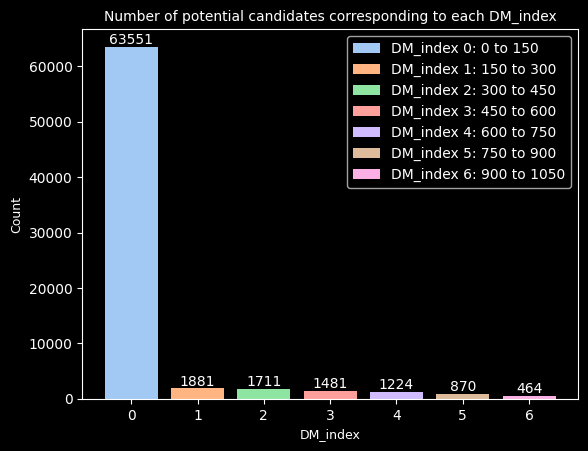

In [302]:
# Example: Bar plot of a categorical column

# Define the color palette
palette = 'pastel'

# Get the colors from the palette
colors = sns.color_palette(palette, len(df['DM_index'].value_counts()))

# Set the style to a custom dark background style
plt.style.use('dark_background')

plt.bar(df['DM_index'].value_counts().index, df['DM_index'].value_counts().values, color = colors)
plt.xlabel('DM_index', fontsize=9, color='white')
plt.ylabel('Count', fontsize=9, color='white')
plt.title('Number of potential candidates corresponding to each DM_index', fontsize=10, color='white')

# Count the occurrences of each DM_index
value_counts = df['DM_index'].value_counts()

# Add text annotations to the bars
for i, count in enumerate(value_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add grid 
# plt.grid(True, linestyle='--')  


# Create custom legend
legend_labels = ['DM_index 0: 0 to 150', 'DM_index 1: 150 to 300', 
                 'DM_index 2: 300 to 450', 'DM_index 3: 450 to 600', 
                 'DM_index 4: 600 to 750', 'DM_index 5: 750 to 900', 
                 'DM_index 6: 900 to 1050']
legend_patches = [Patch(facecolor=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_patches, loc='upper right')

plt.show()

### 2) Keeping only those rows with DM_index > 0 

In [303]:
# Filter rows where DM_index is greater than 0
df_DM_index_gt_0 = df[df['DM_index'] > 0]

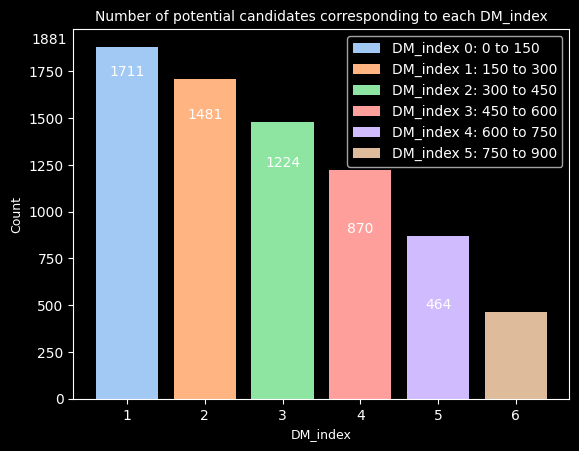

In [304]:
# Example: Bar plot of a categorical column

# Define the color palette
palette = 'pastel'

# Get the colors from the palette
colors = sns.color_palette(palette, len(df_DM_index_gt_0['DM_index'].value_counts()))

# Set the style to a custom dark background style
plt.style.use('dark_background')

plt.bar(df_DM_index_gt_0['DM_index'].value_counts().index, df_DM_index_gt_0['DM_index'].value_counts().values, color = colors)
plt.xlabel('DM_index', fontsize=9, color='white')
plt.ylabel('Count', fontsize=9, color='white')
plt.title('Number of potential candidates corresponding to each DM_index', fontsize=10, color='white')

# Count the occurrences of each DM_index
value_counts = df_DM_index_gt_0['DM_index'].value_counts()

# Add text annotations to the bars
for i, count in enumerate(value_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add grid 
# plt.grid(True, linestyle='--')  


# Create custom legend
legend_labels = ['DM_index 0: 0 to 150', 'DM_index 1: 150 to 300', 
                 'DM_index 2: 300 to 450', 'DM_index 3: 450 to 600', 
                 'DM_index 4: 600 to 750', 'DM_index 5: 750 to 900', 
                 'DM_index 6: 900 to 1050']
legend_patches = [Patch(facecolor=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_patches, loc='upper right')

plt.show()

### 3) Distribution of SNR corresponding to each DM_index:

In [305]:
# Find the maximum SNR value
max_snr_DMgt0 = df_DM_index_gt_0['SNR'].max()

# Find the minimum SNR value
min_snr_DMgt0 = df_DM_index_gt_0['SNR'].min()

print("Maximum SNR:", max_snr_DMgt0)
print("Minimum SNR:", min_snr_DMgt0)

Maximum SNR: 18.56
Minimum SNR: 10.0


/tmp/ipykernel_2687333/968973119.py:47: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[i].set_xlim([df_DM_index_gt_0['SNR'].min()-10, df_DM_index_gt_0['SNR'].max()+10])
/tmp/ipykernel_2687333/968973119.py:47: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[i].set_xlim([df_DM_index_gt_0['SNR'].min()-10, df_DM_index_gt_0['SNR'].max()+10])
/tmp/ipykernel_2687333/968973119.py:47: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[i].set_xlim([df_DM_index_gt_0['SNR'].min()-10, df_DM_index_gt_0['SNR'].max()+10])
/tmp/ipykernel_2687333/968973119.py:47: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[i].set_xlim([df_DM_index_gt_0['SNR'].min()-10, df_DM_index_gt_0['SNR'].max()+10])
/tmp/ipykernel_2687333/968973119.py:47: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[i].set_xlim([df_D

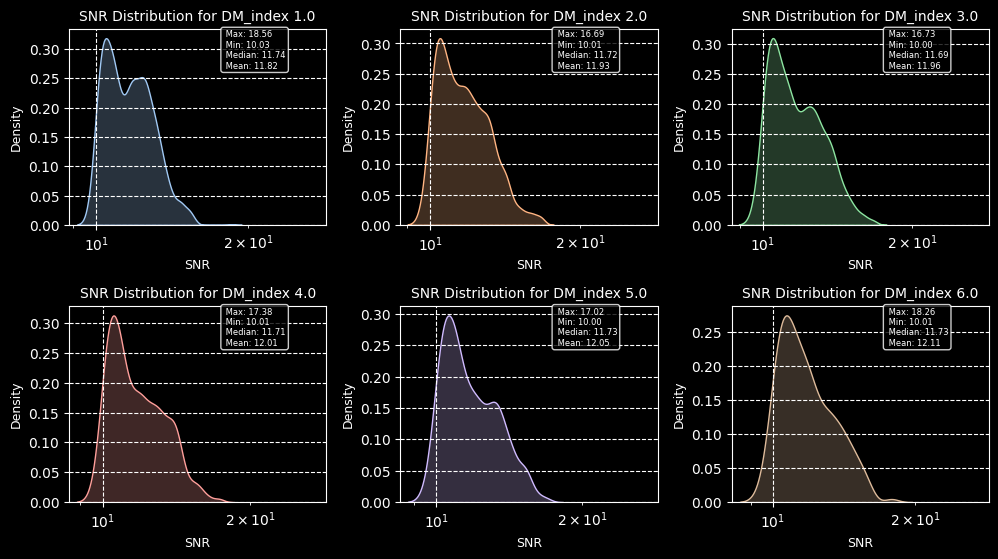

In [306]:
# Define the color palette
palette = 'pastel'

# Get the colors from the palette
colors = sns.color_palette(palette, len(df_DM_index_gt_0['DM_index'].value_counts()))
# Get unique DM_index values
dm_indexes = df_DM_index_gt_0['DM_index'].unique()

# Calculate the number of rows and columns for the grid
num_rows = 3
num_cols = 3

# Calculate the total number of subplots needed
num_subplots = num_rows * num_cols

# Create a new figure and subplots for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Flatten the axes array
axes = axes.flatten()

# Iterate through the DM_index values
for i, dm_index in enumerate(dm_indexes):
    
    # Select the SNR values for the current DM_index
    snr_values = df_DM_index_gt_0[df_DM_index_gt_0['DM_index'] == dm_index]['SNR']

    # Set the style to a custom dark background style
    plt.style.use('dark_background')

    # Create the KDE plot on the corresponding subplot
    sns.kdeplot(snr_values, ax=axes[i], color=colors[i], fill=True)

    # Set the labels and title for the subplot
    axes[i].set_xlabel('SNR', fontsize='9')
    axes[i].set_ylabel('Density', fontsize='9')
    axes[i].set_title(f'SNR Distribution for DM_index {dm_index}', fontsize='10')

    # Add grid to the subplot
    axes[i].grid(True, linestyle ='--')
        
    # Add legend inside the plot
    # axes[i].legend([f'DM_index {dm_index}'], loc='lower right')
    
    # Set the same x-axis range for all subplots
    axes[i].set_xscale('log')
    axes[i].set_xlim([df_DM_index_gt_0['SNR'].min()-10, df_DM_index_gt_0['SNR'].max()+10])
    
    # Calculate the statistics for SNR values
    snr_max = snr_values.max()
    snr_min = snr_values.min()
    snr_median = snr_values.median()
    snr_avg = snr_values.mean()
    
    # Add text annotations for statistics inside a box
    text = f" Max: {snr_max:.2f}\n Min: {snr_min:.2f}\n Median: {snr_median:.2f}\n Mean: {snr_avg:.2f}"
    bbox_props = dict(boxstyle="round", facecolor='black', alpha=0.8)
    axes[i].text(0.6, 0.8, text, transform=axes[i].transAxes, fontsize=6, ha='left', bbox=bbox_props)
    
    # Create a box around the text annotations
    x_pos = axes[i].transAxes.transform((0.55, 0.75))[0]
    y_pos = axes[i].transAxes.transform((0.55, 0.75))[1]
    width = axes[i].transAxes.transform((0.93, 0.68))[0] - x_pos
    height = axes[i].transAxes.transform((0.93, 0.68))[1] - y_pos
    rect = patches.Rectangle((x_pos, y_pos), width, height, linewidth=2, edgecolor='black', facecolor='none')
    axes[i].add_patch(rect)
    
# Hide empty subplots
for j in range(len(dm_indexes), num_subplots):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### 4) Distribution of candidates as a function of arrival times: 

In [307]:
df_DM_index_gt_0

Pixel_X  Pixel_Y  DM_index  Arrival_Time_index    SNR
110       97.0     82.0       1.0                 0.0  14.35
111       97.0     82.0       1.0                 1.0  14.35
112       97.0     82.0       1.0                 2.0  14.35
113       97.0     82.0       1.0                 3.0  14.35
114       97.0     82.0       1.0                 4.0  14.35
...        ...      ...       ...                 ...    ...
71177    102.0     85.0       2.0                 3.0  10.12
71178    102.0     85.0       2.0                 4.0  10.12
71179    102.0     85.0       5.0                 0.0  10.84
71180    102.0     85.0       5.0                 1.0  10.84
71181    102.0     85.0       6.0                 0.0  10.53

[7631 rows x 5 columns]

In [308]:
# Find the maximum time value
max_time = df_DM_index_gt_0['Arrival_Time_index'].max()

# Find the minimum time value
min_time = df_DM_index_gt_0['Arrival_Time_index'].min()

print("Maximum Arrival Time Index:", max_time)
print("Minimum Arrival Time Index:", min_time)

Maximum Arrival Time Index: 558.0
Minimum Arrival Time Index: 0.0


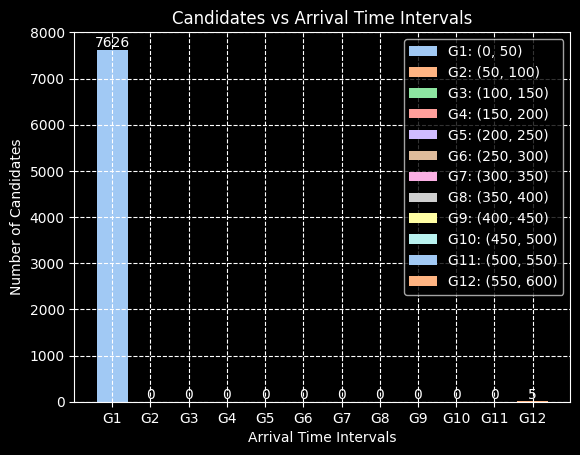

In [309]:
# Define the color palette
palette = 'pastel'

# Get the colors from the palette
colors = sns.color_palette(palette, len(intervals))

# Define the arrival time intervals
intervals = [(0, 50), (50, 100), (100, 150), 
             (150, 200), (200, 250), (250, 300), 
             (300, 350), (350, 400), (400, 450), 
             (450, 500), (500, 550), (550, 600)]

# Group the candidates based on arrival time intervals
grouped_candidates = []
group_indices = []  # List to store the indices of the groups

for i, interval in enumerate(intervals):
    lower_bound, upper_bound = interval
    group_candidates = df_DM_index_gt_0[(df_DM_index_gt_0['Arrival_Time_index'] >= lower_bound) & (df_DM_index_gt_0['Arrival_Time_index'] < upper_bound)]
    grouped_candidates.append(group_candidates)
    group_indices.extend([i+1] * len(group_candidates))  # Add indices for each candidate in the group

# Count the number of candidates in each interval
counts = [len(group) for group in grouped_candidates]

# Plot the histogram
plt.bar(range(len(intervals)), counts, color=colors, tick_label=['G1', 'G2', 'G3',
                                                                 'G4', 'G5', 'G6',
                                                                 'G7', 'G8', 'G9',
                                                                 'G10','G11','G12'])
plt.xlabel('Arrival Time Intervals')
plt.ylabel('Number of Candidates')
plt.title('Candidates vs Arrival Time Intervals')

# Add labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add grid 
plt.grid(True, linestyle='--')  

# Create custom legend
legend_labels = ['G1: (0, 50)', 'G2: (50, 100)', 'G3: (100, 150)', 
             'G4: (150, 200)', 'G5: (200, 250)', 'G6: (250, 300)', 
             'G7: (300, 350)', 'G8: (350, 400)', 'G9: (400, 450)', 
             'G10: (450, 500)', 'G11: (500, 550)', 'G12: (550, 600)']
legend_patches = [Patch(facecolor=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_patches, loc='upper right')

plt.show()

In [310]:
df_arrival_time_gt_550 = df_DM_index_gt_0[df_DM_index_gt_0['Arrival_Time_index'] > 550]

In [311]:
df_arrival_time_gt_550

Pixel_X  Pixel_Y  DM_index  Arrival_Time_index    SNR
2659     134.0    114.0       1.0               558.0  18.56
2660     134.0    114.0       2.0               557.0  14.85
2661     134.0    114.0       3.0               556.0  10.38
12771    134.0    113.0       1.0               558.0  13.42
50531    135.0    114.0       1.0               558.0  13.89

In [313]:
# Define the mapping of DM_index to DM_max values
dm_max_mapping = {0: 150, 1: 300, 2: 450, 3: 600, 4: 750, 5: 900, 6: 1050}

# Add the DM_max column to the DataFrame
df_arrival_time_gt_550['DM_max'] = df_arrival_time_gt_550['DM_index'].apply(lambda x: dm_max_mapping.get(x, None))


/tmp/ipykernel_2687333/3068798365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arrival_time_gt_550['DM_max'] = df_arrival_time_gt_550['DM_index'].apply(lambda x: dm_max_mapping.get(x, None))


In [314]:
sorted_df = df_arrival_time_gt_550.sort_values(['Pixel_X', 'Pixel_Y'], ascending=[True, True])

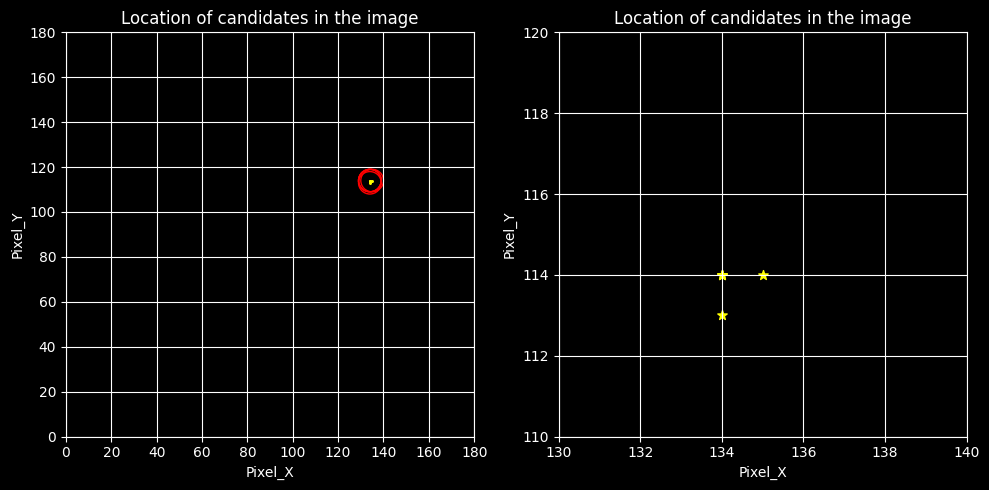

Pixel_X  Pixel_Y  DM_index  Arrival_Time_index    SNR  DM_max
12771    134.0    113.0       1.0               558.0  13.42     300
2659     134.0    114.0       1.0               558.0  18.56     300
2660     134.0    114.0       2.0               557.0  14.85     450
2661     134.0    114.0       3.0               556.0  10.38     600
50531    135.0    114.0       1.0               558.0  13.89     300

In [315]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1: Scatter plot with circles
axs[0].scatter(df_arrival_time_gt_550['Pixel_X'], df_arrival_time_gt_550['Pixel_Y'], s=5, marker='.', c='yellow')
axs[0].set_xlabel('Pixel_X')
axs[0].set_ylabel('Pixel_Y')
axs[0].set_title('Location of candidates in the image')
axs[0].grid(True)
axs[0].set_xlim(0, 180)
axs[0].set_ylim(0, 180)
axs[0].set_xticks(range(0, 181, 20))
axs[0].set_yticks(range(0, 181, 20))

# Draw circles around the marked points
for x, y in zip(df_arrival_time_gt_550['Pixel_X'], df_arrival_time_gt_550['Pixel_Y']):
    circle = Circle((x, y), radius=5, edgecolor='red', facecolor='none')
    axs[0].add_patch(circle)

# Plot 2: Scatter plot with stars
axs[1].scatter(df_arrival_time_gt_550['Pixel_X'], df_arrival_time_gt_550['Pixel_Y'], s=50, marker='*', c='yellow')
axs[1].set_xlabel('Pixel_X')
axs[1].set_ylabel('Pixel_Y')
axs[1].set_title('Location of candidates in the image')
axs[1].grid(True)
axs[1].set_xlim(130, 140)
axs[1].set_ylim(110, 120)
axs[1].set_xticks(range(130, 141, 2))
axs[1].set_yticks(range(110, 121, 2))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


sorted_df

### Extra Code

In [ ]:
# # Plot the graph
# plt.scatter(df_arrival_time_gt_550['Pixel_X'], df_arrival_time_gt_550['Pixel_Y'],s=5, marker='.', c='yellow')
# plt.xlabel('Pixel_X')
# plt.ylabel('Pixel_Y')
# plt.title('Location of candidates in the image')
# plt.grid(True)

# # Set x and y-axis limits
# plt.xlim(0, 180)
# plt.ylim(0, 180)

# # Set x and y-axis tick intervals
# plt.xticks(range(0, 181, 10))
# plt.yticks(range(0, 181, 10))


# # Draw circles around the marked points
# for x, y in zip(df_arrival_time_gt_550['Pixel_X'], df_arrival_time_gt_550['Pixel_Y']):
#     circle = Circle((x, y), radius=5, edgecolor='red', facecolor='none')
#     plt.gca().add_patch(circle)


# # Display the graph
# plt.show()

In [ ]:
# # Plot the graph
# plt.scatter(df_arrival_time_gt_550['Pixel_X'], df_arrival_time_gt_550['Pixel_Y'],s=10, marker='*', c='yellow')
# plt.xlabel('Pixel_X')
# plt.ylabel('Pixel_Y')
# plt.title('Location of candidates in the image')
# plt.grid(True)

# # Set x and y-axis limits
# plt.xlim(130, 140)
# plt.ylim(110, 120)

# # Set x and y-axis tick intervals
# plt.xticks(range(130, 140, 10))
# plt.yticks(range(110, 120, 10))

# # Display the graph
# plt.show()

# sorted_df